# TABLE OF CONTENTS

**2. Introduction**

- 2.1 [Problem Description](#problem-description)  

- 2.2 [Scope of the Project](#scope-of-the-project)  

- 2.3 [Goals](#goals)  

**3. The Data**

- 3.1 [Data Sources](#data-sources)  

- 3.2 [Data Collection](#data-collection)  

- 3.3 [Feature Description Table](#feature-description-table)  

**4. Exploratory Data Analysis (EDA)**

- 4.1 [Data Distribution](#data-distribution)  

- 4.2 [Patient Demographics](#patient-demographics)  

- 4.3 [Cancer Stage, Patient Outcomes, and Treatment Response](#cancer-stage-patient-outcomes-and-treatment-response)  

- 4.4 [Survival Analysis](#survival-analysis)  

**5. Feature Selection (Univariate): Differential Expression Analysis (DEA) of Gene Data**

- 5.1 [Data Preparation](#data-preparation)  

- 5.2 [DEG Detection via DESeq2](#deg-detection-via-deseq2)  

- 5.3 [Variance Stabilizing Transformation (VST)](#variance-stabilizing-transformation-vst)  

- 5.4 [Visualization of DEGs](#visualization-of-degs)  
  
  - 5.4.1 [Volcano Plot](#volcano-plot)  
  
  - 5.4.2 [Pattern Clustering and Boxplots](#pattern-clustering-and-boxplots)  
  
  - 5.4.3 [Heatmaps](#heatmaps)  

**6. Dimensionality Reduction**

- 6.1 [Dimensionality Reduction via PCA (Visualization)](#dimensionality-reduction-via-pca-visualization)  
  
  - 6.1.1 [PCA on Stage_group (Early vs Late)](#pca-on-stage_group-early-vs-late)
  
  - 6.1.2 [PCA on Stage_Compare (Stage IV vs Stage I)](#pca-on-stage_compare-stage-iv-vs-stage-i)

- 6.2 [Dimensionality Reduction via LDA (Visualization)](#dimensionality-reduction-via-lda-visualization)  
  
  - 6.2.1 [LDA on Normal vs Tumor](#lda-on-normal-vs-tumor)  
  
  - 6.2.2 [LDA on Early vs Late](#lda-on-early-vs-late)  
  
  - 6.2.3 [LDA on Stage I vs Stage II vs Stage III vs Stage IV](#lda-on-stage-i-vs-stage-ii-vs-stage-iii-vs-stage-iv)  

**7. Model Building**

- 7.1 [High-Level Overview](#high-level-overview)
  - 7.1.1 [Full Gene Set Pipeline (Baseline)](#full-gene-set-pipeline-baseline)
  - 7.1.2 [DEG-Filtered Gene Set Pipeline](#deg-filtered-gene-set-pipeline)
  - 7.1.3 [Detailed Steps](#detailed-steps)

- 7.2 [Normal vs Tumor Classification](#normal-vs-tumor-classification)  
  
  - 7.2.1 [Model Benchmarking and Performance Comparison](#model-benchmarking-and-performance-comparison)  
  
  - 7.2.2 [Best Performing Model](#best-performing-model)  
  
  - 7.2.3 [Top Predictive Features](#top-predictive-features)  

- 7.3 [Early vs. Late Stage Classification](#early-vs-late-stage-classification)  
  
  - 7.3.1 [Model Benchmarking and Performance Comparison](#model-benchmarking-and-performance-comparison-1)  
  
  - 7.3.2 [Best Performing Model](#best-performing-model-1)  
  
  - 7.3.3 [Top Predictive Features](#top-predictive-features-1)  

- 7.4 [Stage I vs. Stage II vs. Stage III vs. Stage IV Classification](#stage-i-vs-stage-ii-vs-stage-iii-vs-stage-iv-classification)  
  
  - 7.4.1 [Model Benchmarking and Performance Comparison](#model-benchmarking-and-performance-comparison-2)  
  
  - 7.4.2 [Best Performing Model](#best-performing-model-2)  
  
  - 7.4.3 [Top Predictive Features](#top-predictive-features-2)  

- 7.5 [Survival Analysis Using Random Survival Forest](#survival-analysis-using-random-survival-forest)  
  
  - 7.5.1 [Data Preparation for Survival](#data-preparation-for-survival)  
  
  - 7.5.2 [Model Benchmarking](#model-benchmarking)  
  
  - 7.5.3 [Survival Curve Prediction](#survival-curve-prediction)  

**8. Conclusions**

# INTRODUCTION <a id='problem-description'></a>

## Problem Description <a id='problem-description'></a>

Breast cancer remains one of the most prevalent and life-threatening diseases affecting individuals worldwide. This study aims to classify breast cancer stages by examining gene expression variations and predicting patient survival likelihood using transcriptomic data. By leveraging mRNA-seq gene expression profiles from The Cancer Genome Atlas (TCGA), the project will identify key biomarkers for early detection and explore gene-gene interactions influencing cancer progression. A combination of normalization techniques, feature selection methods, and machine learning models will be employed to develop an optimized classification system, with a final goal of integrating survival analysis into a predictive dashboard for clinical insights.

## Scope of the Project <a name="scope-of-the-project"></a>

1. Data Collection: Profile the mRNA-seq gene expression data and clinical information for breast cancer samples from TCGA, integrating them into a single data frame.
2. Data Preprocessing: Explore 3 normalization techniques for gene expression data: RPKM, FPKM, and TPM. After normalization, perform EDA to better understand the data distribution, outliers, and key characteristics, focusing on the behavior of genes across different cancer stages.
3. Feature Selection & Feature Engineering: Apply dimensionality reduction techniques (e.g., PCA, LDA, PCC) for feature selection and investigate transcription factor activities for model input.
4. Model Selection & Training: Train multiple models to predict cancer severity/stage (e.g., Ridge, RF, MLP, XGBoost, and SVM) and compare their performance using cross-validation.
5. Model Evaluation & Optimization: Evaluate models using performance metrics (e.g., accuracy, AUC, F1-score) and optimize the selected model using techniques like hyperparameter tuning or grid search to improve performance.
6. Create a Survival Analysis Dashboard: Develop a survival analysis dashboard leveraging Gradio/Tableau for the interface, PostgreSQL for data storage, and Apache Airflow to schedule and run the ML model for predicting survival probabilities of breast cancer patients.

## Goals <a name="goals"></a>

The goal of this study is to:

- Examine the differences in gene expression across various stages of breast cancer.
- Predict the likelihood of survival for breast cancer patients based on gene expression.
- Identify key biomarkers for the early detection of breast cancer.
- Explore gene-gene interactions and their role in cancer progression.


# THE DATA

## Data Sources<a id='data-sources'></a>

The dataset is sourced from TCGA human tumor data (transcriptomes) and is focused solely on breast cancer (BRCA) samples from cancer patients. We will be using mRNA-seq gene expression profiles of TCGA breast tumors, which are freely available in the TCGA database in TSV format. It consists of 1,231 breast tissue samples from 1,095 unique patients, with each sample containing 60,660 gene expression measurements. These measurements represent mRNA-seq counts, where higher counts indicate greater gene expression levels.

## Data Collection <a name="data-collection"></a>

- Clinical data was sourced from the GenomicDataCommons package, where each of the entities below was queried to obtain the exact match from the GDC Data Portal (https://portal.gdc.cancer.gov/). A more detailed view of the entity relationships between these datasets can be found here: https://dbdiagram.io/d/GDC-Clinical-67ddce3675d75cc8440595a0.
    - **Case**: The collection of all data related to a specific subject in the context of a specific project.
    - **Diagnosis**: Data from the investigation, analysis and recognition of the presence and nature of disease, condition, or injury from expressed signs and symptoms; also, the scientific determination of any kind; the concise results of such an investigation.
    - **Treatment**: Record of the administration and intention of therapeutic agents provided to a patient to alter the course of a cancer-related pathologic process.
    - **Follow Up**: A visit by a patient or study participant to a medical professional. A clinical encounter that encompasses planned and unplanned trial interventions, procedures and assessments that may be performed on a subject. A visit has a start and an end, each described with a rule. The process by which information about the health status of an individual is obtained before and after a study has officially closed; an activity that continues something that has already begun or that repeats something that has already been done.
    - **Demographic**: Data for the characterization of the patient by means of segmenting the population (e.g., characterization by age, sex, or race).
    - **Sample**: Any material sample taken from a biological entity for testing, diagnostic, propagation, treatment or research purposes, including a sample obtained from a living organism or taken from the biological object after halting of all its life functions. Biospecimen can contain one or more components including but not limited to cellular molecules, cells, tissues, organs, body fluids, embryos, and body excretory products.

- The clinical dataset consists of 1,231 observations from 1,098 unique patients, with hundreds of features. The dataset was further trimmed to retain only relevant features using the download_TCGA.rmd script. Each of the 6 clinical data types was then merged to form a denormalized table with 85 columns.
- The tissue samples dataset (TCGA-BRCA_sample_assay_with_gene.tsv) contains 60,660 features and 1,231 observations, representing gene expression values across different samples. It was combined with the gene metadata (TCGA-STAD_RNAseq_gene_metadata.tsv) to retrieve the names of the genes.
- Since the clinical dataset consists of data from 1,098 unique patients while the tissue sample dataset contains 1,095 observations, we ensured consistency by dropping any mismatched samples.
- Further, a preliminary check confirms that no duplicate entries and missing values are present in the dataset.

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load clinical datasets
case_df = pd.read_csv('../data/case.tsv', sep='\t')
demographic_df = pd.read_csv('../data/demographic.tsv', sep='\t')
follow_ups_df = pd.read_csv('../data/follow_ups.tsv', sep='\t')
samples_df = pd.read_csv('../data/samples.tsv', sep='\t')
diagnosis_df = pd.read_csv('../data/diagnosis.tsv', sep='\t')
treatments_df = pd.read_csv('../data/treatments.tsv', sep='\t')

display(case_df.head(1))
display(demographic_df.head(1))
display(follow_ups_df.head(1))
display(samples_df.head(1))
display(diagnosis_df.head(1))
display(treatments_df.head(1))

case_id  submitter_id      consent_type  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e  TCGA-A2-A3KC  Informed Consent   

   days_to_consent                  disease_type index_date lost_to_followup  \
0             18.0  Ductal and Lobular Neoplasms  Diagnosis               No   

  primary_site  
0       Breast

case_id                       race  gender  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e  black or african american  female   

                ethnicity vital_status  age_at_index  \
0  not hispanic or latino        Alive          55.0   

               submitter_id  days_to_birth  \
0  TCGA-A2-A3KC_demographic       -20401.0   

                         demographic_id                  updated_datetime  \
0  f9684ce9-388d-5a4c-a26f-525e4566f818  2025-01-08T12:58:05.350809-06:00   

  age_is_obfuscated     state country_of_residence_at_enrollment  \
0             False  released                      United States   

   days_to_death  
0            NaN

follow_up_id             submitter_id  \
0  115f0b3f-3afb-415c-88af-383c67b6939f  TCGA-A2-A3KC_follow_up4   

                                case_id  days_to_follow_up disease_response  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e             1102.0    TF-Tumor Free   

      state timepoint_category  
0  released          Follow-up

case_id                             sample_id  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e  4f91387a-8561-4a68-a814-be41b4d8e6a2   

       submitter_id pathology_report_uuid  sample_type_id tumor_descriptor  \
0  TCGA-A2-A3KC-10A                   NaN              10   Not Applicable   

            sample_type created_datetime   composition  \
0  Blood Derived Normal              NaN  Not Reported   

                   updated_datetime  days_to_collection     state  \
0  2023-11-08T11:18:59.877319-06:00               299.0  released   

   initial_weight preservation_method oct_embedded  \
0             NaN             Unknown        false   

   days_to_sample_procurement  is_ffpe tissue_type  
0                         NaN    False      Normal

diagnosis_id            submitter_id  \
0  2ac4538c-acd3-5977-b183-cb92b9262962  TCGA-A2-A3KC_diagnosis   

                                case_id  age_at_diagnosis  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e           20401.0   

  diagnosis_is_primary_disease morphology       primary_diagnosis  \
0                         True     8520/3  Lobular carcinoma, NOS   

  site_of_resection_or_biopsy tissue_or_organ_of_origin ajcc_pathologic_m  \
0                 Breast, NOS               Breast, NOS                M0   

   ... classification_of_tumor laterality metastasis_at_diagnosis  \
0  ...                 primary      Right           No Metastasis   

  method_of_diagnosis prior_malignancy prior_treatment synchronous_malignancy  \
0         Core Biopsy               no              No                     No   

  year_of_diagnosis days_to_diagnosis icd_10_code  
0            2011.0               0.0       C50.9  

[1 rows x 24 columns]

case_id                          diagnosis_id  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e  2ac4538c-acd3-5977-b183-cb92b9262962   

                           treatment_id             submitter_id  \
0  0a78f916-e8b4-4b75-8655-d61a23840b1a  TCGA-A2-A3KC_treatment5   

  clinical_trial_indicator  days_to_treatment_end  days_to_treatment_start  \
0                      NaN                  182.0                     77.0   

  initial_disease_status margin_status  number_of_cycles  prescribed_dose  \
0                    NaN           NaN               6.0            159.0   

  prescribed_dose_units therapeutic_agents  treatment_dose  \
0                    mg          Docetaxel           954.0   

  treatment_dose_units treatment_intent_type treatment_or_therapy  \
0                   mg              Adjuvant                  yes   

  treatment_outcome treatment_type  
0               NaN   Chemotherapy

In [10]:
# Merging the DataFrames one by one with prefixes to the submitter_id columns
merged_clinical_df = case_df \
    .merge(demographic_df, on='case_id', how='inner', suffixes=('', '_demographic')) \
    .merge(follow_ups_df, on='case_id', how='inner', suffixes=('', '_follow_ups')) \
    .merge(samples_df, on='case_id', how='inner', suffixes=('', '_samples')) \
    .merge(diagnosis_df, on='case_id', how='inner', suffixes=('', '_diagnosis')) \
    .merge(treatments_df, on='diagnosis_id', how='inner', suffixes=('', '_treatments'))

# Rename 'submitter_id' columns from non-case_df DataFrames with prefixes
merged_clinical_df = merged_clinical_df.rename(columns={
    'submitter_id_demographic': 'demographic_submitter_id',
    'submitter_id_follow_ups': 'follow_ups_submitter_id',
    'submitter_id_samples': 'samples_submitter_id',
    'submitter_id_diagnosis': 'diagnosis_submitter_id',
    'submitter_id_treatments': 'treatments_submitter_id'
})

# Display sample patient
display(merged_clinical_df[merged_clinical_df['submitter_id'] == 'TCGA-AR-A24L'].head())

case_id  submitter_id      consent_type  \
21  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
22  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
23  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
24  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
25  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   

    days_to_consent                  disease_type index_date lost_to_followup  \
21             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
22             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
23             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
24             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
25             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   

   primary_site   race  gender  ... number_of_cycles prescribed_dose  \
21       Breast  white  female  ...              4.0             NaN   
22       Breast  white  female  ...              4.0             NaN   
23       Breast  white  female  ...              4.0             NaN   
24       Breast  white  female  ...              4.0             NaN   
25       Breast  white  female  ...              4.0             NaN   

    prescribed_dose_units therapeutic_agents  treatment_dose  \
21                    NaN         Paclitaxel             NaN   
22                    NaN         Paclitaxel             NaN   
23                    NaN         Paclitaxel             NaN   
24                    NaN         Paclitaxel             NaN   
25                    NaN         Paclitaxel             NaN   

   treatment_dose_units treatment_intent_type treatment_or_therapy  \
21                  NaN              Adjuvant                  yes   
22                  NaN              Adjuvant                  yes   
23                  NaN              Adjuvant                  yes   
24                  NaN              Adjuvant                  yes   
25                  NaN              Adjuvant                  yes   

   treatment_outcome treatment_type  
21               NaN   Chemotherapy  
22               NaN   Chemotherapy  
23               NaN   Chemotherapy  
24               NaN   Chemotherapy  
25               NaN   Chemotherapy  

[5 rows x 85 columns]

In [11]:
# Load datasets
assay_df = pd.read_csv('../data/TCGA-BRCA_sample_assay_with_gene.tsv', sep='\t')
gene_metadata_df = pd.read_csv('../data/TCGA-STAD_RNAseq_gene_metadata.tsv', sep='\t')

# Use gene_name as row labels for assay_df
assay_df.set_index('gene_name', inplace=True)

print("\nAssay Dataset:")
display(assay_df.head())

print("\nGene Metadata:")
display(gene_metadata_df.head())


Assay Dataset:


TCGA-A2-A25D-01A-12R-A16F-07  \
gene_name                                          
ENSG00000000003.15                          4474   
ENSG00000000005.6                              9   
ENSG00000000419.13                          1785   
ENSG00000000457.14                          1362   
ENSG00000000460.17                           433   

                    TCGA-BH-A201-01A-11R-A14M-07  \
gene_name                                          
ENSG00000000003.15                          3555   
ENSG00000000005.6                             30   
ENSG00000000419.13                          2537   
ENSG00000000457.14                          1865   
ENSG00000000460.17                           890   

                    TCGA-AC-A23C-01A-12R-A169-07  \
gene_name                                          
ENSG00000000003.15                           731   
ENSG00000000005.6                            113   
ENSG00000000419.13                          5947   
ENSG00000000457.14                          3118   
ENSG00000000460.17                          1063   

                    TCGA-AR-A5QP-01A-11R-A28M-07  \
gene_name                                          
ENSG00000000003.15                          3960   
ENSG00000000005.6                             50   
ENSG00000000419.13                          2155   
ENSG00000000457.14                          1355   
ENSG00000000460.17                           474   

                    TCGA-C8-A12P-01A-11R-A115-07  \
gene_name                                          
ENSG00000000003.15                          3834   
ENSG00000000005.6                              0   
ENSG00000000419.13                          3161   
ENSG00000000457.14                          1411   
ENSG00000000460.17                           637   

                    TCGA-BH-A0W3-01A-11R-A109-07  \
gene_name                                          
ENSG00000000003.15                           826   
ENSG00000000005.6                              8   
ENSG00000000419.13                          1483   
ENSG00000000457.14                          1594   
ENSG00000000460.17                           645   

                    TCGA-AC-A8OQ-01A-11R-A41B-07  \
gene_name                                          
ENSG00000000003.15                           690   
ENSG00000000005.6                             55   
ENSG00000000419.13                          2456   
ENSG00000000457.14                           646   
ENSG00000000460.17                           764   

                    TCGA-BH-A0H6-01A-21R-A056-07  \
gene_name                                          
ENSG00000000003.15                          5534   
ENSG00000000005.6                             29   
ENSG00000000419.13                          1511   
ENSG00000000457.14                           929   
ENSG00000000460.17                           300   

                    TCGA-D8-A27V-01A-12R-A17B-07  \
gene_name                                          
ENSG00000000003.15                         13509   
ENSG00000000005.6                             15   
ENSG00000000419.13                          3060   
ENSG00000000457.14                          7099   
ENSG00000000460.17                          1449   

                    TCGA-D8-A27M-01A-11R-A16F-07  ...  \
gene_name                                         ...   
ENSG00000000003.15                          2496  ...   
ENSG00000000005.6                             39  ...   
ENSG00000000419.13                          1446  ...   
ENSG00000000457.14                          1702  ...   
ENSG00000000460.17                           655  ...   

                    TCGA-AC-A3TM-01A-11R-A22K-07  \
gene_name                                          
ENSG00000000003.15                          1153   
ENSG00000000005.6                              5   
ENSG00000000419.13                          1118   
ENSG00000000457.14                           573   
ENSG00000000460.17     


Gene Metadata:


source  type  score  phase             gene_id       gene_type gene_name  \
0  HAVANA  gene    NaN    NaN  ENSG00000000003.15  protein_coding    TSPAN6   
1  HAVANA  gene    NaN    NaN   ENSG00000000005.6  protein_coding      TNMD   
2  HAVANA  gene    NaN    NaN  ENSG00000000419.13  protein_coding      DPM1   
3  HAVANA  gene    NaN    NaN  ENSG00000000457.14  protein_coding     SCYL3   
4  HAVANA  gene    NaN    NaN  ENSG00000000460.17  protein_coding  C1orf112   

   level     hgnc_id           havana_gene  
0      2  HGNC:11858  OTTHUMG00000022002.2  
1      2  HGNC:17757  OTTHUMG00000022001.2  
2      2   HGNC:3005  OTTHUMG00000032742.2  
3      2  HGNC:19285  OTTHUMG00000035941.6  
4      2  HGNC:25565  OTTHUMG00000035821.9

In [12]:
# Basic Dataset Information
print("\nDataset Information:")
merged_clinical_df.info()
assay_df.info()
gene_metadata_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 85 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   case_id                             13164 non-null  object 
 1   submitter_id                        13164 non-null  object 
 2   consent_type                        13034 non-null  object 
 3   days_to_consent                     12890 non-null  float64
 4   disease_type                        13164 non-null  object 
 5   index_date                          13164 non-null  object 
 6   lost_to_followup                    8391 non-null   object 
 7   primary_site                        13164 non-null  object 
 8   race                                13164 non-null  object 
 9   gender                              13164 non-null  object 
 10  ethnicity                           13164 non-null  object 
 11  vital_status       

In [13]:
# Summary Statistics
print("\nSummary Statistics:")
display(merged_clinical_df.describe())
display(assay_df.describe())


Summary Statistics:


days_to_consent  age_at_index  days_to_birth  days_to_death  \
count     12890.000000  13164.000000   13009.000000    2708.000000   
mean        120.968658     57.484427  -21220.601968    1595.951625   
std         633.937621     13.356750    4877.287323    1551.141537   
min       -1452.000000     26.000000  -32872.000000       0.000000   
25%           0.000000     48.000000  -24544.000000     614.000000   
50%          15.000000     57.000000  -21228.000000    1004.000000   
75%          33.000000     67.000000  -17588.000000    1920.000000   
max        6029.000000     89.000000   -9706.000000    7455.000000   

       days_to_follow_up  sample_type_id  days_to_collection  initial_weight  \
count       13122.000000    13164.000000         8990.000000     4861.000000   
mean         1131.269090        4.262154         1105.205895      325.282041   
std          1211.844667        4.373804         1503.035403      288.966964   
min           -31.000000        1.000000           16.000000        1.000000   
25%           369.000000        1.000000          140.000000      140.000000   
50%           724.000000        1.000000          484.000000      230.000000   
75%          1532.000000       10.000000         1469.250000      410.000000   
max          8605.000000       11.000000         7858.000000     2190.000000   

       days_to_sample_procurement  age_at_diagnosis  year_of_diagnosis  \
count                      4123.0      12389.000000        10410.00000   
mean                          0.0      21242.318831         2008.05562   
std                           0.0       4831.326309            4.13973   
min                           0.0       8370.000000         1988.00000   
25%                           0.0      17699.000000         2007.00000   
50%                           0.0      21201.000000         2009.00000   
75%                           0.0      24411.000000         2011.00000   
max                           0.0      32872.000000         2013.00000   

       days_to_diagnosis  days_to_treatment_end  days_to_treatment_start  \
count       12526.000000            4417.000000              5653.000000   
mean          131.547900             304.376047               193.087210   
std           879.006873             583.269633               592.746172   
min        -18790.000000           -1306.000000             -3890.000000   
25%             0.000000             120.000000                57.000000   
50%             0.000000             168.000000                95.000000   
75%             0.000000             246.000000               190.000000   
max          6536.000000            6052.000000              6048.000000   

       number_of_cycles  prescribed_dose  treatment_dose  
count       1628.000000      1994.000000     2389.000000  
mean           4.731572       319.395637     3477.226873  
std            2.707146       430.703710     3310.482013  
min            1.000000         1.000000        1.000000  
25%            4.000000        20.000000      460.000000  
50%            4.000000        99.000000     3600.000000  
75%            5.000000       600.000000     6000.000000  
max           24.000000      2000.000000    21160.000000

TCGA-A2-A25D-01A-12R-A16F-07  TCGA-BH-A201-01A-11R-A14M-07  \
count                  6.066000e+04                  60660.000000   
mean                   1.034877e+03                   1110.244313   
std                    1.105579e+04                   9046.044855   
min                    0.000000e+00                      0.000000   
25%                    0.000000e+00                      0.000000   
50%                    1.000000e+00                      1.000000   
75%                    5.600000e+01                     82.000000   
max                    1.188852e+06                 838143.000000   

       TCGA-AC-A23C-01A-12R-A169-07  TCGA-AR-A5QP-01A-11R-A28M-07  \
count                  60660.000000                  60660.000000   
mean                    1202.395219                    783.117441   
std                     9528.579238                   5482.329634   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        2.000000                      1.000000   
75%                      103.000000                     71.000000   
max                   885193.000000                 494952.000000   

       TCGA-C8-A12P-01A-11R-A115-07  TCGA-BH-A0W3-01A-11R-A109-07  \
count                  60660.000000                  60660.000000   
mean                     916.485295                    661.606116   
std                     8646.343421                   3895.447378   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                       44.000000                     37.000000   
max                   742211.000000                 422219.000000   

       TCGA-AC-A8OQ-01A-11R-A41B-07  TCGA-BH-A0H6-01A-21R-A056-07  \
count                  6.066000e+04                  60660.000000   
mean                   7.279932e+02                    818.576805   
std                    1.274565e+04                   7125.083981   
min                    0.000000e+00                      0.000000   
25%                    0.000000e+00                      0.000000   
50%                    1.000000e+00                      1.000000   
75%                    7.000000e+01                     52.000000   
max                    2.406507e+06                 722441.000000   

       TCGA-D8-A27V-01A-12R-A17B-07  TCGA-D8-A27M-01A-11R-A16F-07  ...  \
count                  60660.000000                  60660.000000  ...   
mean                    1603.021348                   1159.860320  ...   
std                    11491.685458                   8436.901089  ...   
min                        0.000000                      0.000000  ...   
25%                        0.000000                      0.000000  ...   
50%                        1.000000                      2.000000  ...   
75%                       96.000000                     90.000000  ...   
max                   969281.000000                 739509.000000  ...   

       TCGA-AC-A3TM-01A-11R-A22K-07  TCGA-A7-A26J-01A-11R-A277-07  \
count                  60660.000000                  6.066000e+04   
mean                     802.418299                  7.182427e+02   
std                     5758.350828                  1.312690e+04   
min                        0.000000                  0.000000e+00   
25%                        0.000000                  0.000000e+00   
50%                        1.000000                  1.000000e+00   
75%                       62.000000                  5.000000e+01   
max                   365523.000000                  3.005554e+06   

       TCGA-LL-A441-01A-11R-A24H-07  TCGA-A7-A13G-01A-11R-A13Q-07  \
count                  60660.000000                  6.066000e+04   
mean                    1039.272107                  1.128893e+03   
std                    

In [14]:
# Update Ensemble IDs to actual Gene Names
gene_name_mapping = gene_metadata_df.set_index('gene_id')['gene_name'].to_dict()

# Map the Ensemble IDs in assay_df index (gene_name) to the actual gene names
assay_df.index = assay_df.index.map(gene_name_mapping)
display(assay_df.head(10))

TCGA-A2-A25D-01A-12R-A16F-07  TCGA-BH-A201-01A-11R-A14M-07  \
gene_name                                                               
TSPAN6                             4474                          3555   
TNMD                                  9                            30   
DPM1                               1785                          2537   
SCYL3                              1362                          1865   
C1orf112                            433                           890   
FGR                                 928                           711   
CFH                                2445                          4352   
FUCA2                              4487                          2175   
GCLC                               2278                          2472   
NFYA                               2511                          3796   

           TCGA-AC-A23C-01A-12R-A169-07  TCGA-AR-A5QP-01A-11R-A28M-07  \
gene_name                                                               
TSPAN6                              731                          3960   
TNMD                                113                            50   
DPM1                               5947                          2155   
SCYL3                              3118                          1355   
C1orf112                           1063                           474   
FGR                                 460                           237   
CFH                                4609                          2440   
FUCA2                              4547                          2270   
GCLC                               2265                          2637   
NFYA                               4388                          1914   

           TCGA-C8-A12P-01A-11R-A115-07  TCGA-BH-A0W3-01A-11R-A109-07  \
gene_name                                                               
TSPAN6                             3834                           826   
TNMD                                  0                             8   
DPM1                               3161                          1483   
SCYL3                              1411                          1594   
C1orf112                            637                           645   
FGR                                 468                           251   
CFH                                4472                           419   
FUCA2                              2588                          1318   
GCLC                               1601                          3506   
NFYA                               1585                          2118   

           TCGA-AC-A8OQ-01A-11R-A41B-07  TCGA-BH-A0H6-01A-21R-A056-07  \
gene_name                                                               
TSPAN6                              690                          5534   
TNMD                                 55                            29   
DPM1                               2456                          1511   
SCYL3                               646                           929   
C1orf112                            764                           300   
FGR                                 562                           252   
CFH                                2113                          1567   
FUCA2                              2065                          2396   
GCLC                               1981                          2964   
NFYA                               4660                          2478   

           TCGA-D8-A27V-01A-12R-A17B-07  TCGA-D8-A27M-01A-11R-A16F-07  ...  \
gene_name                                                              ...   
TSPAN6                            13509                          2496  ...   
TNMD                                 15                            39  ...   
DPM1                               3060                          1446  ...   
SCYL3                              7099                          1702  ...   
C1orf112                           

Delete clinical rows without tissue samples (gene). 

In [15]:
# Shorten column names to match samples_submitter_id
assay_df.columns = [col[:16] for col in assay_df.columns]

# Transpose the assay
assay_df_transposed = assay_df.T.reset_index().rename(columns={'index': 'samples_submitter_id'})

# Extract the 'samples_submitter_id' columns from both DataFrames
clinical_submitter_ids = merged_clinical_df['samples_submitter_id']
assay_submitter_ids = assay_df_transposed['samples_submitter_id']

# Find the submitter_ids in merged_clinical_df that are not in assay_df_transposed
clinical_not_in_assay = clinical_submitter_ids[~clinical_submitter_ids.isin(assay_submitter_ids)]

# Remove these 'samples_submitter_id' rows from merged_clinical_df
merged_clinical_df_cleaned = merged_clinical_df[~merged_clinical_df['samples_submitter_id'].isin(clinical_not_in_assay)]

In [16]:
# Display sample patient
display(merged_clinical_df_cleaned[merged_clinical_df_cleaned['submitter_id'] == 'TCGA-AR-A24L'])

case_id  submitter_id      consent_type  \
23  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
26  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
29  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
32  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   
35  de646f6a-6d50-4be2-b3cd-f17554b234df  TCGA-AR-A24L  Informed Consent   

    days_to_consent                  disease_type index_date lost_to_followup  \
23             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
26             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
29             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
32             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   
35             20.0  Ductal and Lobular Neoplasms  Diagnosis               No   

   primary_site   race  gender  ... number_of_cycles prescribed_dose  \
23       Breast  white  female  ...              4.0             NaN   
26       Breast  white  female  ...              4.0             NaN   
29       Breast  white  female  ...              4.0             NaN   
32       Breast  white  female  ...              4.0             NaN   
35       Breast  white  female  ...              4.0             NaN   

    prescribed_dose_units therapeutic_agents  treatment_dose  \
23                    NaN         Paclitaxel             NaN   
26                    NaN         Paclitaxel             NaN   
29                    NaN         Paclitaxel             NaN   
32                    NaN         Paclitaxel             NaN   
35                    NaN         Paclitaxel             NaN   

   treatment_dose_units treatment_intent_type treatment_or_therapy  \
23                  NaN              Adjuvant                  yes   
26                  NaN              Adjuvant                  yes   
29                  NaN              Adjuvant                  yes   
32                  NaN              Adjuvant                  yes   
35                  NaN              Adjuvant                  yes   

   treatment_outcome treatment_type  
23               NaN   Chemotherapy  
26               NaN   Chemotherapy  
29               NaN   Chemotherapy  
32               NaN   Chemotherapy  
35               NaN   Chemotherapy  

[5 rows x 85 columns]

Check for missing values.
- Clinical DF: 2 columns with over 90% missing (dropped)
- Gene DF: None

In [17]:
# Set pandas option to display all rows (no truncation)
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing values per column
missing_values = merged_clinical_df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(merged_clinical_df_cleaned)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Count'] > 0]
display(missing_data_summary)

Missing Count  Missing Percentage
consent_type                                   46            0.979557
days_to_consent                               166            3.534923
lost_to_followup                             1729           36.818569
days_to_birth                                  55            1.171210
country_of_residence_at_enrollment           1735           36.946337
days_to_death                                3662           77.981261
days_to_follow_up                              14            0.298126
disease_response                              666           14.182283
pathology_report_uuid                         378            8.049404
created_datetime                             4696          100.000000
days_to_collection                             30            0.638842
initial_weight                                 83            1.767462
days_to_sample_procurement                   4687           99.808348
age_at_diagnosis                              285            6.068995
ajcc_pathologic_m                             871           18.547700
ajcc_pathologic_n                             871           18.547700
ajcc_pathologic_stage                         908           19.335605
ajcc_pathologic_t                             865           18.419932
ajcc_staging_system_edition                  1328           28.279387
laterality                                    775           16.503407
metastasis_at_diagnosis                      3103           66.077513
method_of_diagnosis                          1207           25.702726
prior_malignancy                              968           20.613288
prior_treatment                               280            5.962521
synchronous_malignancy                        968           20.613288
year_of_diagnosis                             977           20.804940
days_to_diagnosis                             236            5.025554
icd_10_code                                   968           20.613288
clinical_trial_indicator                     3988           84.923339
days_to_treatment_end                        3122           66.482112
days_to_treatment_start                      2680           57.069847
initial_disease_status                       2957           62.968484
margin_status                                3684           78.449744
number_of_cycles                             4112           87.563884
prescribed_dose                              3983           84.816865
prescribed_dose_units                        3983           84.816865
therapeutic_agents                           3072           65.417376
treatment_dose                               3847           81.920784
treatment_dose_units                         3847           81.920784
treatment_intent_type                        1889           40.225724
treatment_outcome                            3568           75.979557

In [18]:
# Check for missing values (gene)
#print(assay_df_transposed.isnull().sum().head())

null_counts = assay_df_transposed.isnull().sum()
display(null_counts[null_counts > 0])

Series([], dtype: int64)

In [19]:
# Identify columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index.tolist()
merged_clinical_df_cleaned = merged_clinical_df_cleaned.drop(columns=columns_to_drop)

Check for duplicate rows
- Clinical DF: None
- Gene DF: None

In [20]:
# Check for duplicate rows (clinical)
duplicate_rows_clinical = merged_clinical_df_cleaned[merged_clinical_df_cleaned.duplicated(keep=False)]
print(f"Number of duplicate rows (clinical): {duplicate_rows_clinical.shape[0]}")

# Check for duplicate rows (gene)
duplicate_rows_gene = assay_df_transposed[assay_df_transposed.duplicated(keep=False)]
print(f"Number of duplicate rows (gene): {duplicate_rows_gene.shape[0]}")

Number of duplicate rows (clinical): 0
Number of duplicate rows (gene): 0


Delete duplicate samples_submitter_id.

In [21]:
# Show duplicates
assay_df_transposed[assay_df_transposed['samples_submitter_id'].duplicated(keep=False)]

gene_name samples_submitter_id  TSPAN6  TNMD  DPM1  SCYL3  C1orf112   FGR  \
49            TCGA-A7-A13D-01A    1850     1  1957    731      1019   156   
172           TCGA-A7-A26E-01A    3608    20  1805   3048       859   114   
209           TCGA-A7-A0DB-01A    4962    68  1851   1662       749  1814   
210           TCGA-A7-A0DB-01A    2199    47  1130   1743       678   847   
223           TCGA-A7-A13D-01A    3018     0  2817    591      1083   231   
243           TCGA-A7-A26E-01A    5461    12  2384   4063      1240   360   
333           TCGA-A7-A13E-01A    2146     6  2561   1362       920   201   
654           TCGA-A7-A13E-01A    1763    28  2207   1851      1060   172   
906           TCGA-A7-A26J-01A    1043     4  3880   3336      1307   516   
1222          TCGA-A7-A26J-01A     599     0  2843   2677       930   101   

gene_name   CFH  FUCA2  GCLC  ...  AL451106.1  AC092910.4  AC073611.1  \
49         1574   1425   770  ...           0          12           4   
172        5017    908  5010  ...           0           2          10   
209        2276   2682  3002  ...           0           0          14   
210        2946   1157  2401  ...           0           3           7   
223        1495   2554   918  ...           0           0          26   
243        5020   1546  8433  ...           0           0          63   
333         969   1443  2113  ...           0           0          16   
654        1465   1190  2123  ...           0           5          14   
906        3871   1743  3169  ...           0           0          44   
1222       3358   1011  2180  ...           0           0           8   

gene_name  AC136977.1  AC078856.1  AC008763.4  AL592295.6  AC006486.3  \
49                  0           8           0         356           0   
172                 0           0           0         209           0   
209                 0           1           0         470           0   
210                 0          13           0         240           0   
223                 0           0           0         436           0   
243                 0           0           0         522           0   
333                 0           0           0         407           0   
654                 0           6           0         335           0   
906                 0           0           0         858           0   
1222                0          10           0         328           0   

gene_name  AL391628.1  AP006621.6  
49                  5           0  
172                 8           3  
209                 6          17  
210                 6           8  
223                 8           4  
243                16          15  
333                14          20  
654                21           7  
906                17          17  
1222                9           5  

[10 rows x 60661 columns]

In [22]:
# Keep only the first occurrence of each duplicated 'samples_submitter_id'
assay_df_transposed = assay_df_transposed[~assay_df_transposed['samples_submitter_id'].duplicated(keep='first')]

In [23]:
# Show duplicates
assay_df_transposed[assay_df_transposed['samples_submitter_id'].duplicated(keep=False)]

Empty DataFrame
Columns: [samples_submitter_id, TSPAN6, TNMD, DPM1, SCYL3, C1orf112, FGR, CFH, FUCA2, GCLC, NFYA, STPG1, NIPAL3, LAS1L, ENPP4, SEMA3F, CFTR, ANKIB1, CYP51A1, KRIT1, RAD52, MYH16, BAD, LAP3, CD99, CD99, HS3ST1, AOC1, WNT16, HECW1, MAD1L1, LASP1, SNX11, TMEM176A, M6PR, KLHL13, CYP26B1, ICA1, DBNDD1, ALS2, CASP10, CFLAR, TFPI, NDUFAF7, RBM5, MTMR7, SLC7A2, ARF5, SARM1, POLDIP2, PLXND1, AK2, CD38, FKBP4, KDM1A, RBM6, CAMKK1, RECQL, VPS50, HSPB6, ARHGAP33, NDUFAB1, PDK4, SLC22A16, ZMYND10, ABCB5, ARX, SLC25A13, ST7, CDC27, SLC4A1, CALCR, HCCS, DVL2, PRSS22, UPF1, SKAP2, SLC25A5, MCUB, HOXA11, POLR2J, DHX33, MEOX1, THSD7A, LIG3, RPAP3, ACSM3, REXO5, CIAPIN1, SPPL2B, FAM214B, COPZ2, PRKAR2B, MSL3, CREBBP, TSPOAP1, MPO, PON1, GCFC2, WDR54, ...]
Index: []

[0 rows x 60661 columns]

Drop housekeeping columns.

In [24]:
# Drop the housekeeping columns from merged_clinical_df_cleaned
merged_clinical_df_cleaned = merged_clinical_df_cleaned.drop(columns=['updated_datetime', 'updated_datetime_samples'])

Filter underrepresented samples.

In [25]:
# Remove rows based on conditions
filtered_clinical_df = merged_clinical_df_cleaned[
    ~merged_clinical_df_cleaned['ajcc_pathologic_stage'].isin(['Stage 0', 'Stage 0is', 'Stage X']) &
    (merged_clinical_df_cleaned['sample_type'] != 'Metastatic') &
    merged_clinical_df_cleaned['ajcc_pathologic_stage'].notna()  # This ensures NaN values are excluded
]
#display(filtered_clinical_df.head(1))

Delete corresponding tissue samples in assay dfs.

In [26]:
# Get the unique samples_submitter_id from filtered_clinical_df
samples_to_keep = filtered_clinical_df['samples_submitter_id'].unique()

# Filter rows in assay_df_transposed where samples_submitter_id matches
assay_df_transposed = assay_df_transposed[assay_df_transposed['samples_submitter_id'].isin(samples_to_keep)]
display(assay_df_transposed.head(1))

gene_name samples_submitter_id  TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  \
0             TCGA-A2-A25D-01A    4474     9  1785   1362       433  928   

gene_name   CFH  FUCA2  GCLC  ...  AL451106.1  AC092910.4  AC073611.1  \
0          2445   4487  2278  ...           0           0          27   

gene_name  AC136977.1  AC078856.1  AC008763.4  AL592295.6  AC006486.3  \
0                   0           0           0         150           0   

gene_name  AL391628.1  AP006621.6  
0                   6          21  

[1 rows x 60661 columns]

In [27]:
# Filter columns in assay_df where column names match samples_submitter_id
assay_df = assay_df[samples_to_keep]
display(assay_df.head(1))

TCGA-A2-A3KC-01A  TCGA-D8-A1XG-01A  TCGA-AR-A24L-01A  \
gene_name                                                         
TSPAN6                 3197              1539              2231   

           TCGA-AN-A0FY-01A  TCGA-A2-A3XY-01A  TCGA-E2-A15J-01A  \
gene_name                                                         
TSPAN6                 2294              3153              1220   

           TCGA-EW-A1P3-01A  TCGA-BH-A0H7-01A  TCGA-BH-A0H7-11A  \
gene_name                                                         
TSPAN6                 1368              1108              3791   

           TCGA-BH-A0E0-01A  ...  TCGA-E2-A1LL-01A  TCGA-D8-A1X9-01A  \
gene_name                    ...                                       
TSPAN6                 2836  ...              2435              1870   

           TCGA-B6-A0IG-01A  TCGA-OL-A66I-01A  TCGA-D8-A1XZ-01A  \
gene_name                                                         
TSPAN6                 3646              2355              2177   

           TCGA-BH-A0AU-11A  TCGA-BH-A0AU-01A  TCGA-A7-A13F-01A  \
gene_name                                                         
TSPAN6                 3878              1383              2889   

           TCGA-A7-A13F-11A  TCGA-A2-A0T5-01A  
gene_name                                      
TSPAN6                 3265              4975  

[1 rows x 1196 columns]

Check counts of filtered patients & samples.

In [28]:
# Count of unique patients (after filtering)
filtered_clinical_df['demographic_id'].nunique()

1070

In [29]:
# Count of unique tissue samples (after filtering)
filtered_clinical_df['samples_submitter_id'].nunique()

1191

## Feature Description Table <a name="feature-description-table"></a>

| No | Feature Name                       | Description                                                                                                                                                         | Data Type | Data Classification |
|----|------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|---------------------|
| 1  | case_id                            | Unique identifier assigned to each patient's case                                                                                                                   | String    | Categorical         |
| 2  | submitter_id                       | Identifier assigned to a case ID                                                                                                                                    | String    | Categorical         |
| 3  | consent_type                       | Used to describe the type of consent obtain from the subject for participation in the study                                                                         | String    | Categorical         |
| 4  | days_to_consent                    | Number of days between the date used for index and the date the subject consent was obtained for participation in the study.                                        | Integer   | Numerical           |
| 5  | disease_type                       | Describe the type of malignant disease                                                                                                                              | String    | Categorical         |
| 6  | index_date                         | Describe the reference or anchor date used when for date obfuscation, where a single date is obscurred by creating one or more date ranges in relation to this date | String    | Categorical         |
| 7  | lost_to_followup                   | The yes/no/unknown indicator used to describe whether a patient was unable to be contacted or seen for follow-up information                                        | String    | Categorical         |
| 8  | primary_site                       | Describe the primary site of disease                                                                                                                                | String    | Categorical         |
| 9  | race                               | A subgroup of a species, often defined by genetics, traits, or geography—based on U.S. Census classification standards.                                             | String    | Categorical         |
| 10 | gender                             | Gender is described as the assemblage of properties that distinguish people on the basis of their societal roles.                                                   | String    | Categorical         |
| 11 | ethnicity                          | An individual's self-identified ethnicity, specifically whether they identify as Hispanic or Latino, based on U.S. Census categories.                               | String    | Categorical         |
| 12 | vital_status                       | The survival state of the person registered on the protocol.                                                                                                        | String    | Categorical         |
| 13 | age_at_index                       | The patient's age (in years) on the reference or anchor date used during date obfuscation.                                                                          | Integer   | Numerical           |
| 14 | demographic_submitter_id           | Identifier assigned to a demographic ID                                                                                                                             | String    | Categorical         |
| 15 | days_to_birth                      | Number of days between the date used for index and the date from a person's date of birth represented as a calculated negative number of days.                      | Integer   | Numerical           |
| 16 | demographic_id                     | Unique identifier assigned to each patient's demographic information in the database                                                                                | String    | Categorical         |
| 17 | age_is_obfuscated                  | The age or other properties related to the patient's age have been modified for compliance reasons.                                                                 | Boolean   | Categorical         |
| 18 | state                              | indicates the current status of a data entity within the GDC system                                                                                                 | String    | Categorical         |
| 19 | country_of_residence_at_enrollment | Describe the patient's country of residence at the time they were enrolled in the study                                                                             | String    | Categorical         |
| 20 | days_to_death                      | Number of days between the date used for index and the date from a person's date of death represented as a calculated number of days.                               | Integer   | Numerical           |
| 21 | follow_up_id                       | Unique identifier assigned to each patient's follow up                                                                                                              | String    | Categorical         |
| 22 | follow_ups_submitter_id            | Identifier assigned to a follow up id                                                                                                                               | String    | Categorical         |
| 23 | days_to_follow_up                  | Number of days between the date used for index and the date of the patient's last follow-up appointment or contact.                                                 | Integer   | Numerical           |
| 24 | disease_response                   | Code assigned to describe the patient's response or outcome to the disease.                                                                                         | String    | Categorical         |
| 25 | state_follow_ups                   | status of a follow-up record for a patient case, indicating whether that particular follow-up entry is active, released, or outdated in the GDC system              | String    | Categorical         |
| 26 | timepoint_category                 | Category describing a specific point in the time continuum, including those established relative to an event.                                                       | String    | Categorical         |
| 27 | sample_id                          | Unique identifier assigned to each patient's sample                                                                                                                 | String    | Categorical         |
| 28 | samples_submitter_id               | Identifier assigned to a follow up sample ID                                                                                                                        | String    | Categorical         |
| 29 | pathology_report_uuid              | UUID of the related pathology report.                                                                                                                               | String    | Categorical         |
| 30 | sample_type_id                     | Numeric sample type identifier                                                                                                                                      | Integer   | Categorical         |
| 31 | tumor_descriptor                   | Text that describes the kind of disease present in the tumor specimen as related to a specific timepoint.                                                           | String    | Categorical         |
| 32 | sample_type                        | Sample classification (Tumor/Normal)                                                                                                                                | String    | Categorical         |
| 33 | composition                        | Composition of collected sample                                                                                                                                     | String    | Categorical         |
| 34 | days_to_collection                 | The number of days from the index date to the date a sample was received by the Biospecimen Core Resource (BCR) or other center for processing.                     | Integer   | Numerical           |
| 35 | state_samples                      | NA                                                                                                                                                                  | String    | Categorical         |
| 36 | initial_weight                     | Numeric value that represents the initial weight of the sample, measured in milligrams.                                                                             | Integer   | Numerical           |
| 37 | preservation_method                | Text term that represents the method used to preserve the sample                                                                                                    | String    | Categorical         |
| 38 | oct_embedded                       | If sample was OCT embedded                                                                                                                                          | Boolean   | Categorical         |
| 39 | is_ffpe                            | Formalin-Fixed Paraffin-Embedded status                                                                                                                             | Boolean   | Categorical         |
| 40 | tissue_type                        | Text term that represents a description of the kind of tissue collected with respect to disease status or proximity to tumor tissue.                                | String    | Categorical         |
| 41 | diagnosis_id                       | Unique identifier assigned to each patient's diagnosis                                                                                                              | String    | Categorical         |
| 42 | diagnosis_submitter_id             | Identifier assigned to a diagnosis ID                                                                                                                               | String    | Categorical         |
| 43 | age_at_diagnosis                   | Age at the time of diagnosis expressed in number of days since birth.                                                                                               | Integer   | Numerical           |
| 44 | diagnosis_is_primary_disease       | Indicates whether this specific diagnosis represents the disease that was the primary focus of the study                                                            | Boolean   | Categorical         |
| 45 | morphology                         | A coding system (ICD-O-3) used in cancer registries to classify tumor site and cell morphology based on microscopic tissue structure.                               | String    | Categorical         |
| 46 | primary_diagnosis                  | Describe the patient's histologic diagnosis                                                                                                                         | String    | Categorical         |
| 47 | site_of_resection_or_biopsy        | Describe the anatomic site of origin, of the patient's malignant disease                                                                                            | String    | Categorical         |
| 48 | tissue_or_organ_of_origin          | Describe the anatomic site of origin, of the patient's malignant disease                                                                                            | String    | Categorical         |
| 49 | ajcc_pathologic_m                  | Codes indicating the presence or absence of distant metastasis (M), based on AJCC cancer staging criteria                                                           | String    | Categorical         |
| 50 | ajcc_pathologic_n                  | Codes representing cancer stage based on lymph node involvement (N stage), following AJCC staging guidelines.                                                       | String    | Categorical         |
| 51 | ajcc_pathologic_stage              | The extent of cancer spread from the original site, defined using AJCC staging criteria                                                                             | String    | Categorical         |
| 52 | ajcc_pathologic_t                  | Code indicating the size or extent of the primary tumor (T), based on AJCC pathological staging criteria.                                                           | String    | Categorical         |
| 53 | ajcc_staging_system_edition        | Text indicating the edition of the AJCC Cancer Staging Manual used for tumor classification                                                                         | String    | Categorical         |
| 54 | classification_of_tumor            | Text that describes the kind of disease present in the tumor specimen as related to a specific timepoint.                                                           | String    | Categorical         |
| 55 | laterality                         | For tumors in paired organs, designates the side on which the cancer originates                                                                                     | String    | Categorical         |
| 56 | metastasis_at_diagnosis            | The text term used to describe the extent of metastatic disease present at diagnosis.                                                                               | String    | Categorical         |
| 57 | method_of_diagnosis                | Text term used to describe the method used to confirm the patients malignant diagnosis.                                                                             | String    | Categorical         |
| 58 | prior_malignancy                   | The yes/no/unknown indicator used to describe the patient's history of prior cancer diagnosis.                                                                      | String    | Categorical         |
| 59 | prior_treatment                    | A yes/no/unknown/not applicable indicator related to the administration of therapeutic agents received before the body specimen was collected.                      | String    | Categorical         |
| 60 | synchronous_malignancy             | A yes/no/unknown indicator used to describe whether the patient had an additional malignant diagnosis at the same time the tumor used for sequencing was diagnosed  | String    | Categorical         |
| 61 | year_of_diagnosis                  | Numeric value to represent the year of an individual's initial pathologic diagnosis of cancer.                                                                      | Integer   | Numerical           |
| 62 | days_to_diagnosis                  | Number of days between the date used for index and the date the patient was diagnosed with the malignant disease                                                    | Integer   | Numerical           |
| 63 | icd_10_code                        | Alphanumeric value used to describe the disease code from ICD-10                                                                                                    | String    | Categorical         |
| 64 | case_id_treatments                 | N/A                                                                                                                                                                 | String    | Categorical         |
| 65 | treatment_id                       | Unique identifier assigned to each patient's treatment                                                                                                              | String    | Categorical         |
| 66 | treatments_submitter_id            | Identifier assigned to a treatment ID                                                                                                                               | String    | Categorical         |
| 67 | clinical_trial_indicator           | Indicator used to describe whether the treatment was part of a clinical trial                                                                                       | String    | Categorical         |
| 68 | days_to_treatment_end              | Number of days between the date used for index and the date the treatment ended                                                                                     | Integer   | Numerical           |
| 69 | days_to_treatment_start            | Number of days between the date used for index and the date the treatment started                                                                                   | Integer   | Numerical           |
| 70 | initial_disease_status             | The text term used to describe the status of the patient's malignancy when the treatment began                                                                      | String    | Categorical         |
| 71 | margin_status                      | The determination of the presence of actual or potential neoplastic tissue which has been left outside the boundary of a resected specimen within the patient       | String    | Categorical         |
| 72 | number_of_cycles                   | The numeric value used to describe the number of cycles of a specific treatment or regimen the patient received                                                     | Integer   | Numerical           |
| 73 | prescribed_dose                    | A quantity of an agent prescribed to the study participant                                                                                                          | Integer   | Numerical           |
| 74 | prescribed_dose_units              | The units of the amount of agent or medication formally prescribed to an individual                                                                                 | String    | Categorical         |
| 75 | therapeutic_agents                 | Text identification of the individual agent(s) used as part of a treatment regimen                                                                                  | String    | Categorical         |
| 76 | treatment_dose                     | The numeric value used to describe the total dose of an agent the patient received                                                                                  | Integer   | Numerical           |
| 77 | treatment_dose_units               | The text term used to describe the dose units of an agent the patient received                                                                                      | String    | Categorical         |
| 78 | treatment_intent_type              | Text term to identify the reason for the administration of a treatment regimen [Manually-curated]                                                                   | String    | Categorical         |
| 79 | treatment_or_therapy               | A yes/no/unknown/not applicable indicator related to the administration of therapeutic agents received                                                              | String    | Categorical         |
| 80 | treatment_outcome                  | Text term that describes the patient's final outcome after the treatment was administered                                                                           | String    | Categorical         |
| 81 | treatment_type                     | Text term that describes the kind of treatment administered                                                                                                         | String    | Categorical         |


# EXPLORATORY DATA ANALYSIS (EDA)

This is a summary after the clinical information has been cleaned, where 'Stage 0,' 'Stage 0is,' and 'Stage X' were removed, along with Metastatic sample types, and those with missing cancer stages were also removed.

## Data Distribution <a id='data-distribution'></a>

- **Clinical data**
    - The columns age_at_index, days_to_birth, and age_at_diagnosis exhibit an almost normal distribution, indicating their close relationship.
    - Many other numerical variables, such as days_to_consent, days_to_death, days_to_follow_up, and days_to_collection, show a right-skewed distribution. Several of the right-skewed variables have many missing values, reflecting the variability in patient diagnosis, treatment, and follow-up processes.

- **Gene data**
    - The gene expression data from the TCGA BRCA dataset are raw counts, and these counts are typically right-skewed. In both tumor and normal tissue samples, most genes exhibit low expression levels, while only a small subset of genes are highly expressed. However, the expression of certain genes will differ between tumor and normal tissues, which is crucial for distinguishing between these two states.
        - In tumor tissue, specific genes involved in cell growth, metabolism, and tumor progression (such as oncogenes) are often upregulated and exhibit higher expression levels compared to normal tissue. On the other hand, normal tissue will generally show lower expression levels for genes associated with tumorigenesis and may exhibit a more balanced gene expression profile.
        - In early-stage cancer (Stage I and II), the differences in gene expression between tumor and normal tissues may be more subtle, with fewer genes showing significant upregulation. In late-stage cancer (Stage III and IV), we typically see more pronounced changes in gene expression, with a higher number of genes showing strong upregulation related to tumor progression, metastasis, and evasion of immune responses.
    - The ultimate goal of this analysis is to predict cancer stage and survival, with the aid of differentially expressed genes (DEGs). By identifying the significant genes that vary between tumor and normal tissues, as well as across cancer stages, we aim to improve the accuracy of our prediction model. These DEGs will be key in training the model, enhancing its ability to classify cancer stages and predict patient survival outcomes more accurately.

In [30]:
# Delete rows in original df if not in filtered_clinical_df
case_df = case_df[case_df['case_id'].isin(filtered_clinical_df['case_id'])]
demographic_df = demographic_df[demographic_df['demographic_id'].isin(filtered_clinical_df['demographic_id'])]
follow_ups_df = follow_ups_df[follow_ups_df['follow_up_id'].isin(filtered_clinical_df['follow_up_id'])]
samples_df = samples_df[samples_df['sample_id'].isin(filtered_clinical_df['sample_id'])]
diagnosis_df = diagnosis_df[diagnosis_df['diagnosis_id'].isin(filtered_clinical_df['diagnosis_id'])]
treatments_df = treatments_df[treatments_df['treatment_id'].isin(filtered_clinical_df['treatment_id'])]

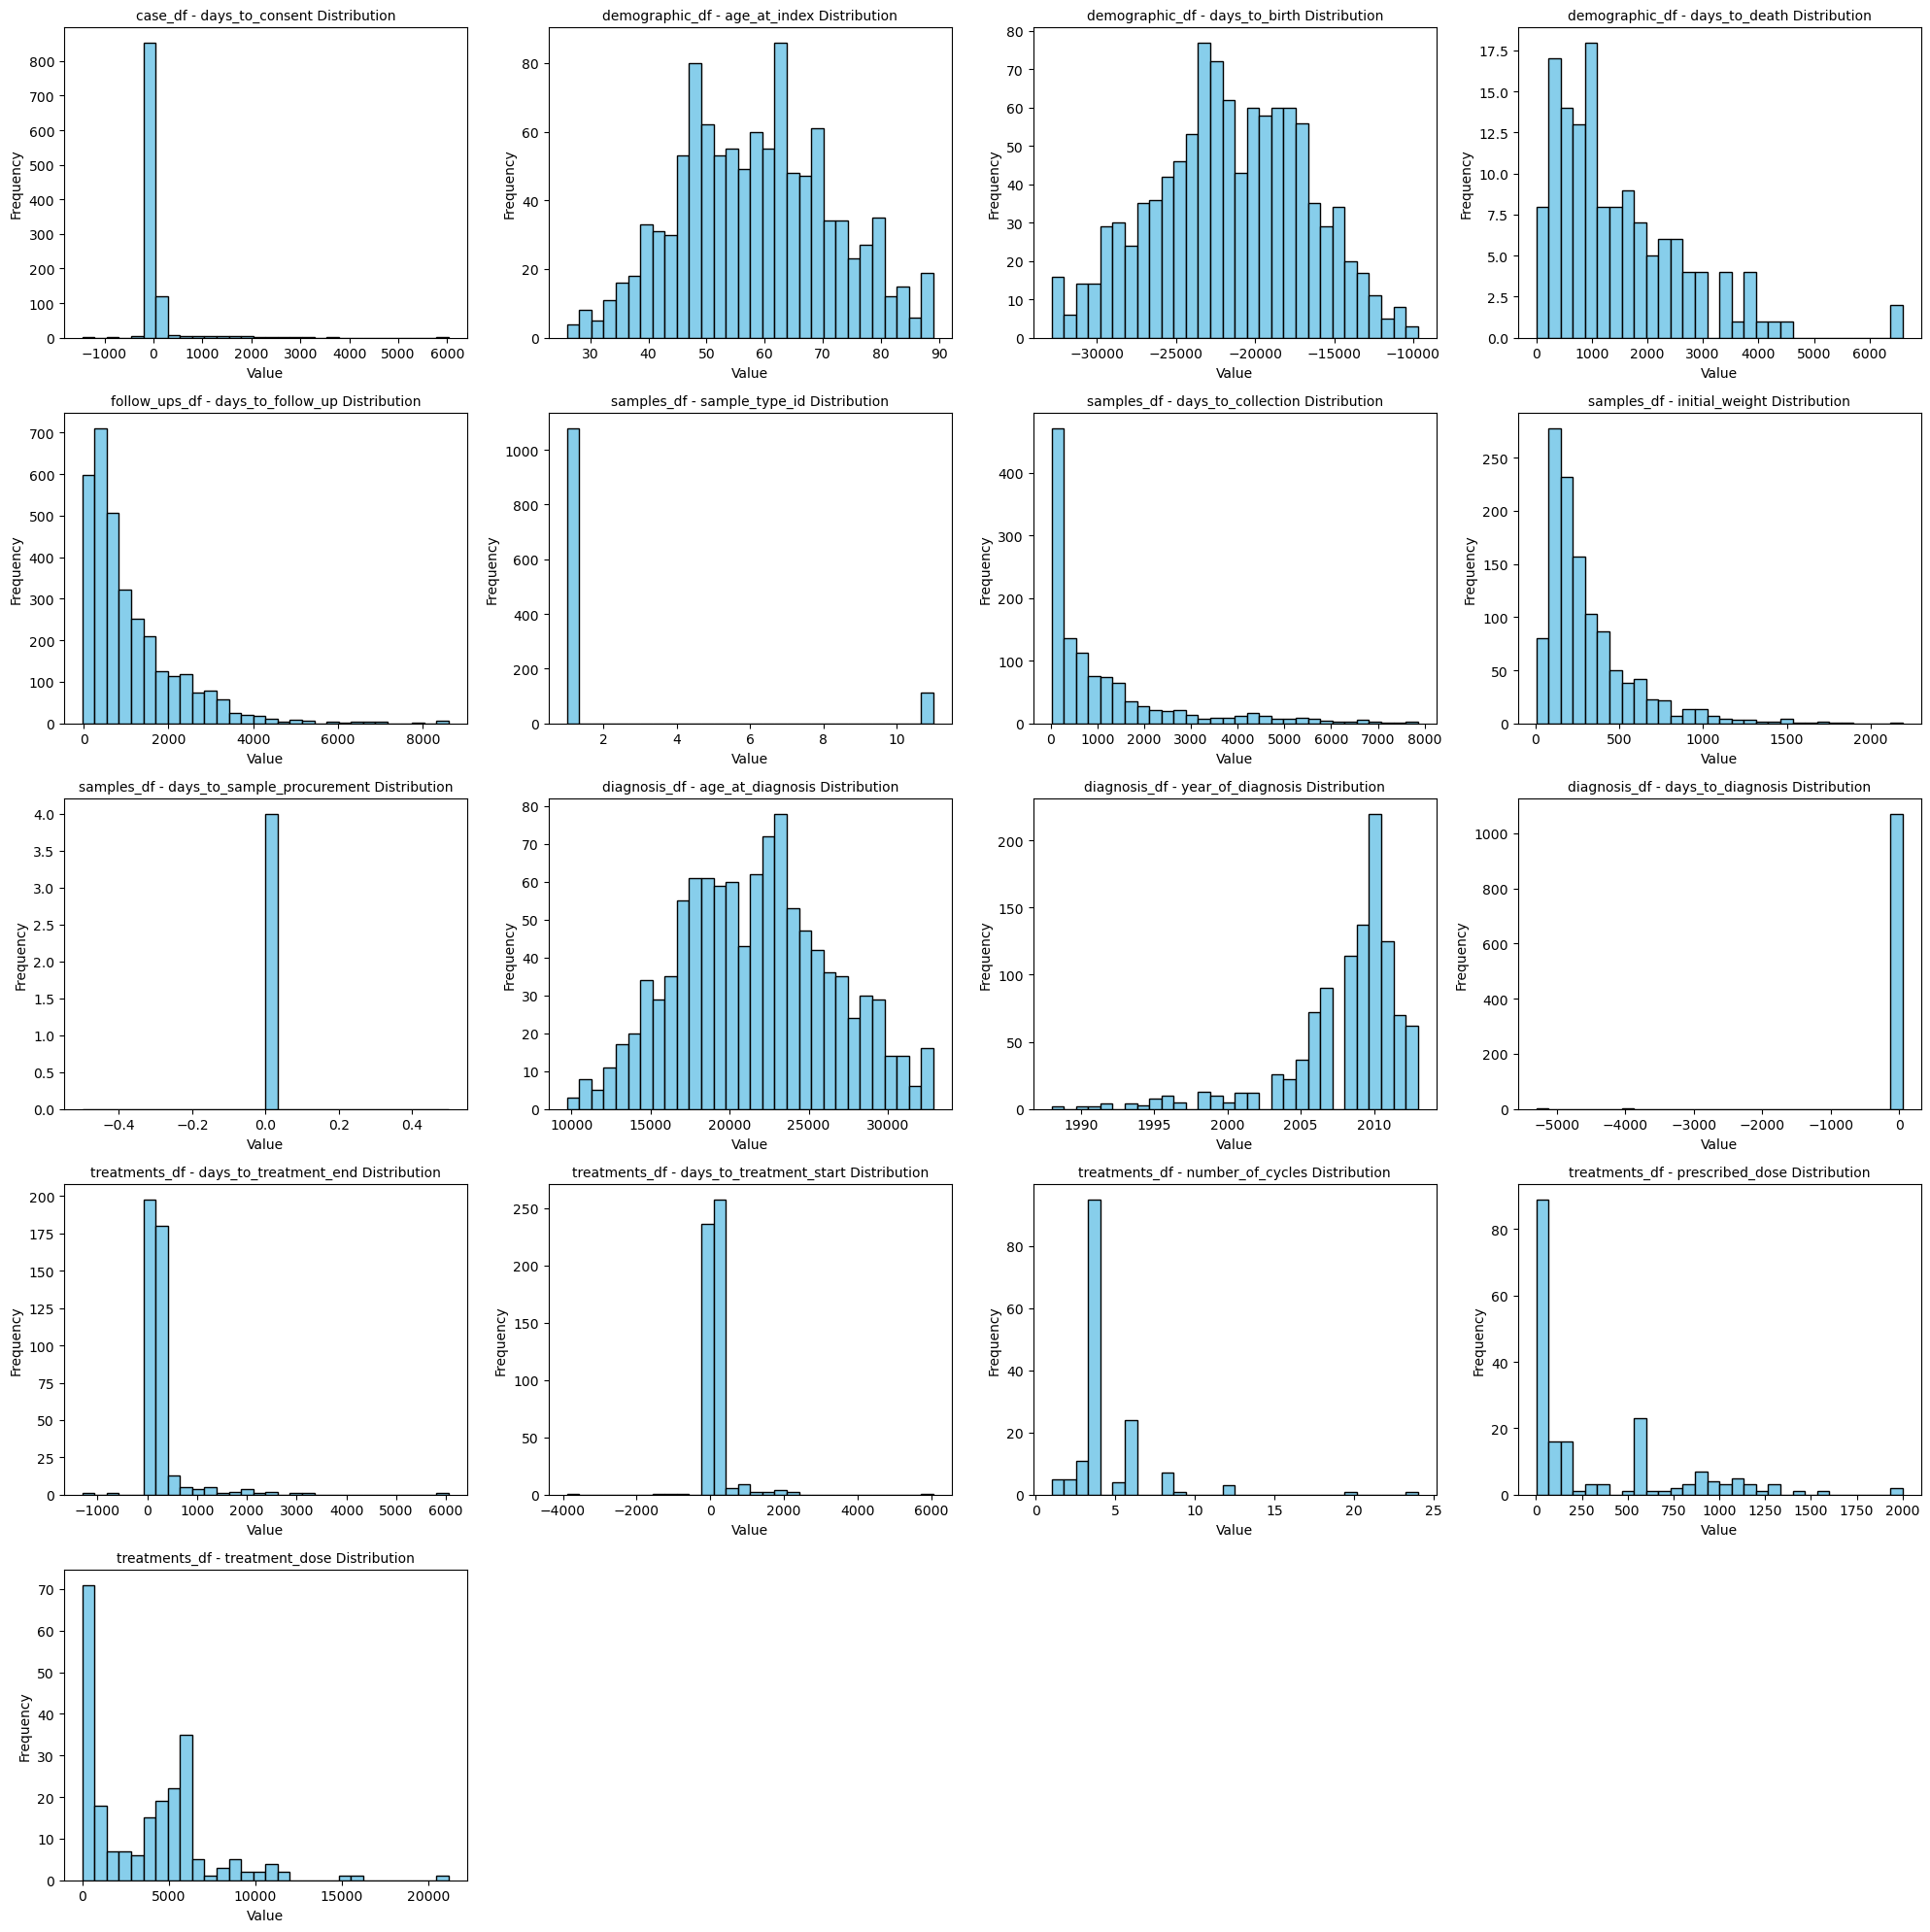

In [31]:
# List of DataFrames to loop through
dfs = [case_df, demographic_df, follow_ups_df, samples_df, diagnosis_df, treatments_df]
df_names = ['case_df', 'demographic_df', 'follow_ups_df', 'samples_df', 'diagnosis_df', 'treatments_df']

# Count the total number of numeric columns across all DataFrames
total_columns = sum([len(df.select_dtypes(include=['number']).columns) for df in dfs])

# Set number of columns per row
num_cols = 4

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(total_columns / num_cols)

# Create subplots (adjust rows and columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows))

# Flatten axes array to make indexing easier
axes = axes.flatten()

# Plot histograms for each numeric column in each DataFrame
axis_idx = 0
for df, name in zip(dfs, df_names):
    for column in df.select_dtypes(include=['number']).columns:  # Only plot numeric columns
        # Plot histogram for each column
        axes[axis_idx].hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')  # Drop NaN values
        axes[axis_idx].set_title(f'{name} - {column} Distribution', fontsize=10)
        axes[axis_idx].set_xlabel('Value')
        axes[axis_idx].set_ylabel('Frequency')
        axis_idx += 1

# Hide any empty subplots (in case there are more subplots than columns)
for i in range(axis_idx, len(axes)):
    axes[i].axis('off')

# Adjust the layout to make it tight and remove the extra space
plt.tight_layout()

# Show the plot
plt.show()

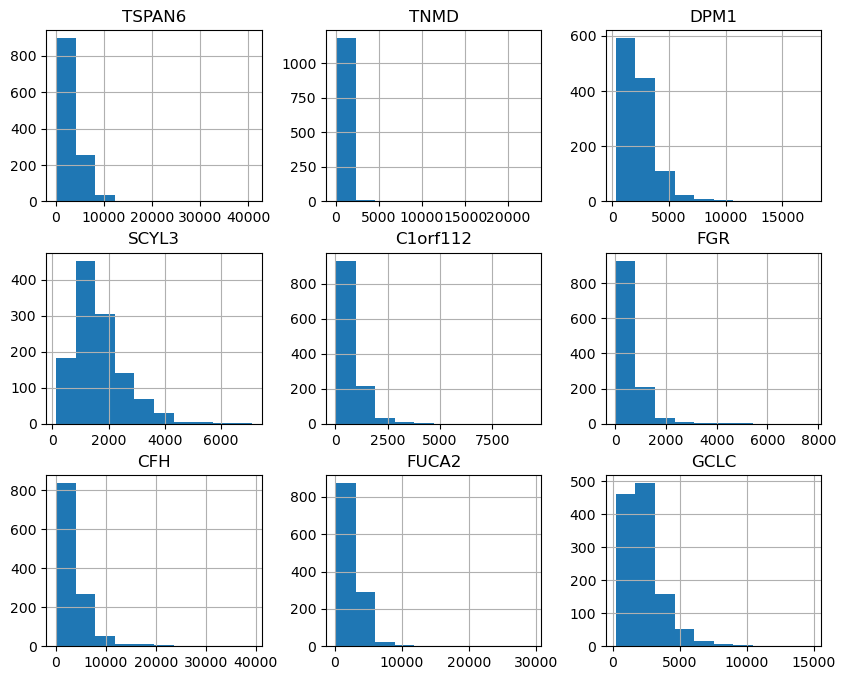

In [32]:
# Create histograms showing the distributions (original gene counts)
assay_df_transposed.iloc[:, :10].hist(figsize=(10, 8))
plt.show()

In [33]:
# # Create histograms showing the distributions (TPM-transformed/normalized gene counts)
# gene_norm_df.iloc[:, :13].hist(figsize=(12, 10))
# plt.show()

## Patient Demographics <a id='patient-demographics'></a>

- **Vital Status:**
86.7% of patients are alive, and 13.3% are deceased.

- **Gender Distribution:**
The majority of tissue samples (98.9%) were taken from females, with males making up 1.1%.

- **Race, Ethnicity, and Country of Origin:**
The majority of tissue samples were taken from White individuals (69.3%), followed by Black or African American (16.6%), with the remaining samples coming from Asian and other races. Additionally, 60% of the samples came from patients in the United States.

- **Prior Medical History:**
Most patients had no prior therapeutic agents before specimen collection, nor any history of a prior cancer diagnosis or malignant condition.

- **Age Distribution:**
The majority of patients were between 50 and 70 years old at the time of cancer diagnosis, with fewer patients in the 40-50 and 70-80 age groups.

- **Tissue Sample Composition:**
The tissue samples consist of 90.7% tumor tissue, with the remaining 9.3% being normal tissue from the same patients.

Display race, gender, and other status info of each patient diagnosed with breast cancer.

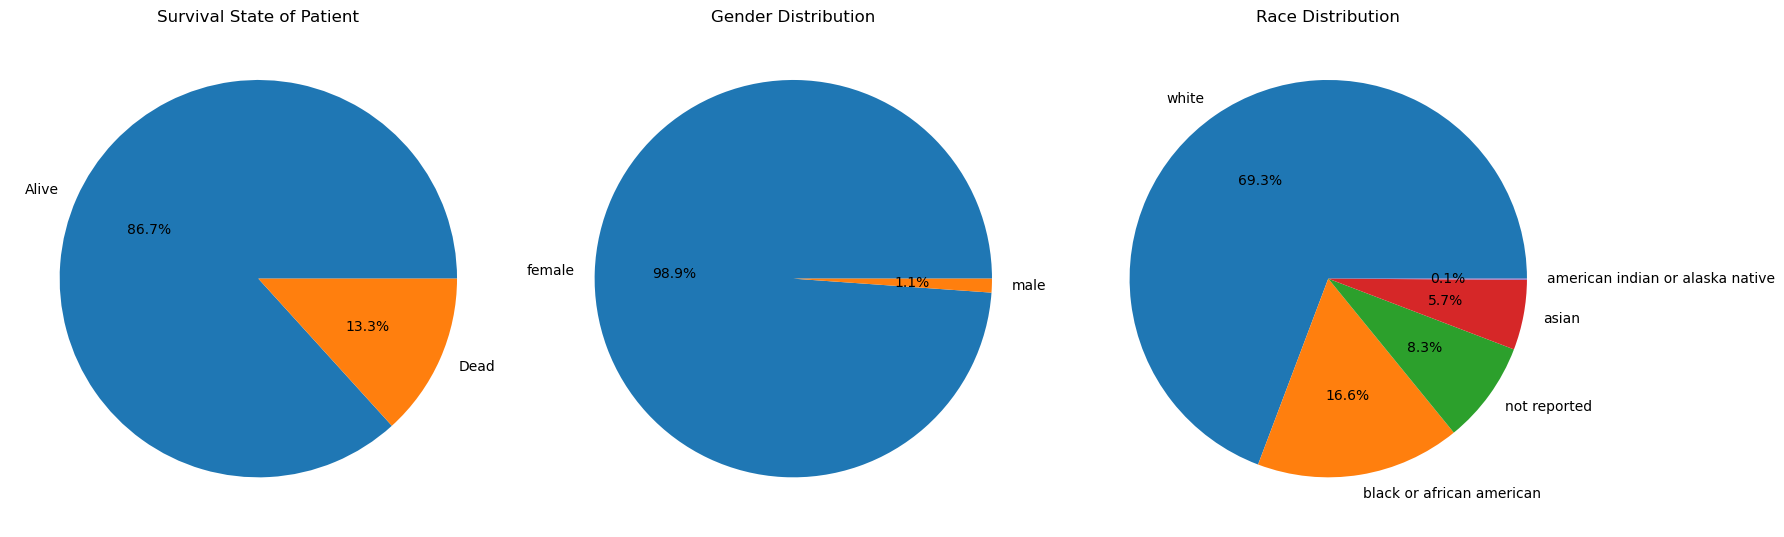

In [34]:
columns_to_plot = ['vital_status', 'gender', 'race']
titles = ['Survival State of Patient', 'Gender Distribution', 'Race Distribution']

# Step 1: Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Step 2: Loop through each column and plot in the respective subplot
for ax, col, title in zip(axes, columns_to_plot, titles):
    demographic_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_ylabel('')  # Remove the y-label

# Step 3: Adjust layout and show the plot
plt.tight_layout()
plt.show()

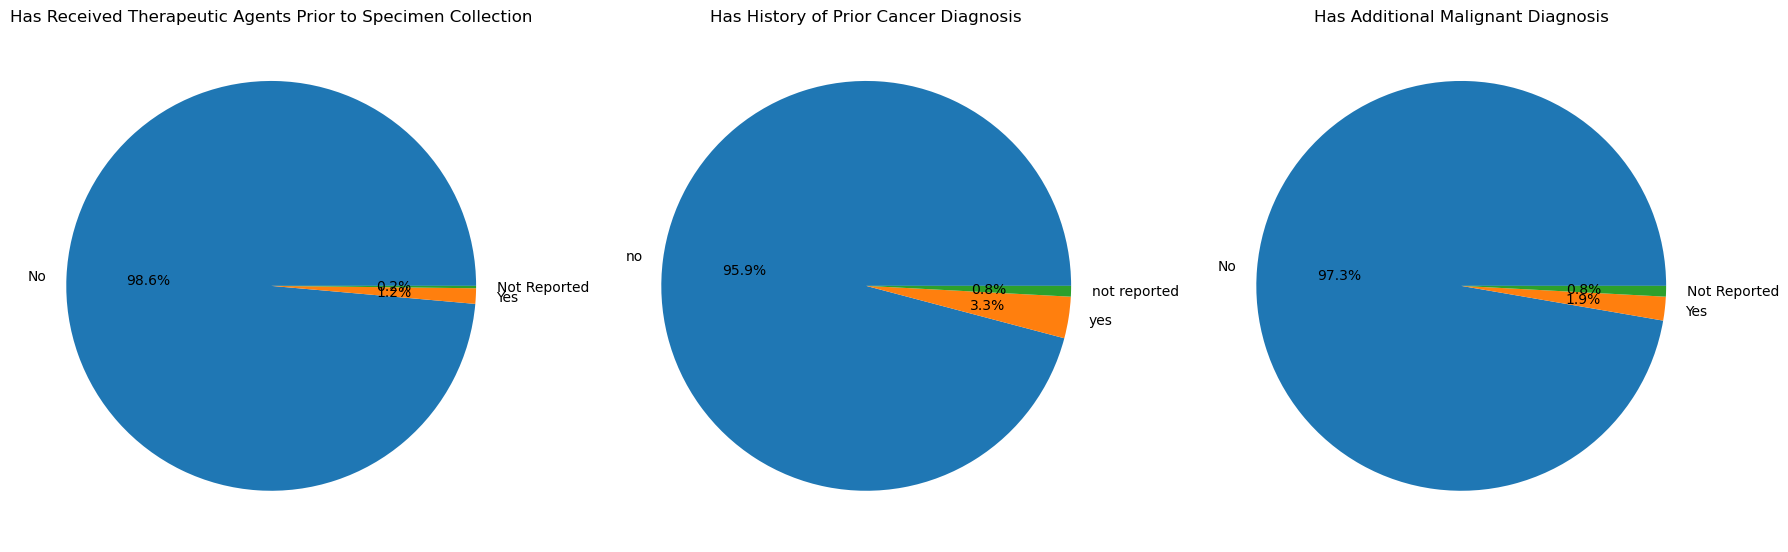

In [35]:
columns_to_plot = ['prior_treatment', 'prior_malignancy', 'synchronous_malignancy']
titles = ['Has Received Therapeutic Agents Prior to Specimen Collection', 
          'Has History of Prior Cancer Diagnosis', 
          'Has Additional Malignant Diagnosis']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each column and plot in the respective subplot
for ax, col, title in zip(axes, columns_to_plot, titles):
    diagnosis_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_ylabel('')  # Remove the y-label

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

country_of_residence_at_enrollment
United States    405
Germany           78
Poland            74
Vietnam           46
Ukraine           30
Russia            30
Nigeria            4
Canada             2
Brazil             2
Pakistan           2
Afghanistan        1
Name: count, dtype: int64

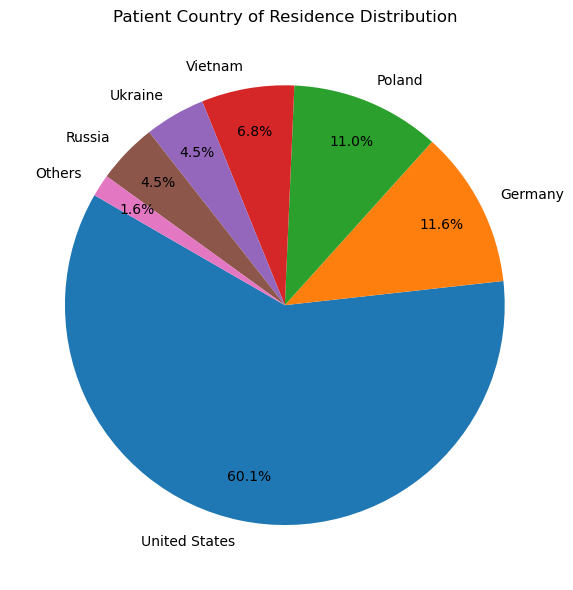

In [36]:
display(demographic_df['country_of_residence_at_enrollment'].value_counts())

# Step 1: Count occurrences of each country
country_counts = demographic_df['country_of_residence_at_enrollment'].value_counts()

# Step 2: Group the last 5 into "Others"
N = len(country_counts) - 5
top_countries = country_counts[:N]
others_sum = country_counts[N:].sum()

# Step 3: Combine into final series
final_country_counts = pd.concat([top_countries, pd.Series({'Others': others_sum})])

# Step 4: Plot pie chart
plt.figure(figsize=(8, 6))
final_country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=150, labeldistance=1.1, pctdistance=0.8)
plt.title('Patient Country of Residence Distribution')
plt.ylabel('')  # Optional: remove y-label
plt.tight_layout()
plt.show()

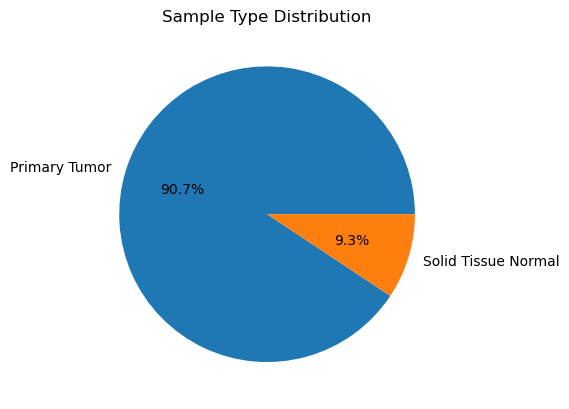

In [37]:
# Plot as a pie chart
samples_df['sample_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sample Type Distribution')
plt.ylabel('') 
plt.show()

In [38]:
# Create a dictionary for mapping the stages
stage_mapping = {
    'Stage I': 'Stage I', 'Stage IA': 'Stage I', 'Stage IB': 'Stage I', 
    'Stage II': 'Stage II', 'Stage IIA': 'Stage II', 'Stage IIB': 'Stage II',
    'Stage III': 'Stage III', 'Stage IIIA': 'Stage III', 'Stage IIIB': 'Stage III', 'Stage IIIC': 'Stage III',
    'Stage IV': 'Stage IV'
}

# Map the values to the simplified stages using the dictionary
filtered_clinical_df['cancer_stage'] = filtered_clinical_df['ajcc_pathologic_stage'].map(stage_mapping)

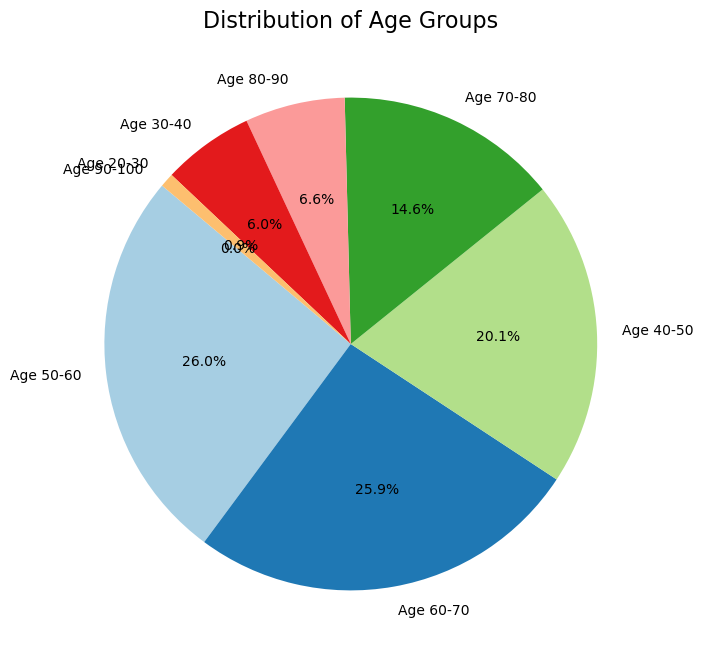

In [39]:
# Remove duplicates based on 'case_id', 'cancer_stage', and 'age_at_index'
unique_response_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'cancer_stage', 'age_at_index'])

# Create age bins (e.g., 20-30, 30-40, etc.)
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'age_group' in the unique_response_df
unique_response_df['age_group'] = pd.cut(unique_response_df['age_at_index'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age group
age_group_counts = unique_response_df['age_group'].value_counts()

# Create labels with 'Age' as a prefix
labels_with_prefix = ['Age ' + label for label in age_group_counts.index]

# Plotting the pie chart with 'Age' as a prefix on the labels
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=labels_with_prefix, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Age Groups', fontsize=16)
plt.show()

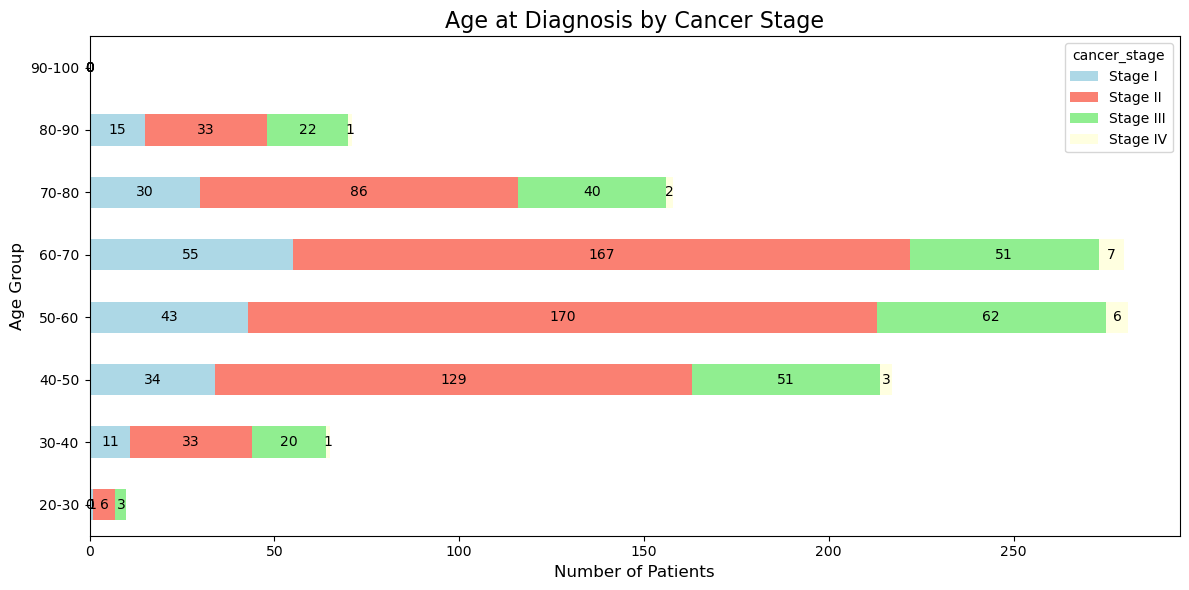

In [40]:
# Create a pivot table to show the counts of each 'disease_response' for each 'age_group' and 'cancer_stage'
pivot_table = pd.pivot_table(
    unique_response_df, 
    values='case_id', 
    index='age_group', 
    columns='cancer_stage', 
    aggfunc='count', 
    fill_value=0
)

# Plotting the stacked horizontal bar chart (normal counts)
ax = pivot_table.plot(kind='barh', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon', 'lightgreen', 'lightyellow'])

# Adding labels and title
plt.title('Age at Diagnosis by Cancer Stage', fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

# Adding the counts at the center of each segment of the bars
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()  # Get the x and y position of the bar
    ax.annotate(f'{int(width)}', (x + width / 2, y + p.get_height() / 2), ha='center', va='center', fontsize=10)
plt.tight_layout()
plt.show()

## Cancer Stage, Patient Outcomes, and Treatment Response <a id='cancer-stage-patient-outcomes-and-treatment-response'></a>

- **Cancer Stages in Tissue Samples:**
A detailed examination of the cancer stages in our tissue samples reveals that the majority of our samples come from patients with Stage 2 and Stage 3 cancer, comprising 57% and 23%, respectively. Stage 1 samples account for 17%, and Stage 4 samples make up only 1.8%. Notably, cancer progression from one stage to another was observed in fewer than 20 patients, suggesting that the diagnosis table may not be up-to-date.

- **Vital Status and Patient Outcomes:**
When analyzing patient outcomes by vital status (alive or deceased), the results follow an expected pattern: 91% of Stage 1 patients are alive, with survival rates decreasing as cancer progresses to later stages. Stage 4 patients show a significantly lower survival rate, with only 25% alive and 75% deceased.

- **Disease Response by Cancer Stage:**
In the follow-up table, we observe that 90.3% of patients are tumor-free, 7.8% still have tumors, and 1.9% have unknown records. The disease response follows a predictable pattern: 93% of Stage 1 patients are tumor-free, but this decreases as cancer progresses. Stage 4 shows only 9% tumor-free patients, with 85% still having a tumor.

- **Treatment Types:**
Surgery is the first line of treatment for most cancers, accounting for 28.3% of treatments, followed by chemotherapy at 25.9%. Other treatment types, such as radiation, hormone, and pharmaceutical therapies, make up the remainder.

- **Outcome by Treatment Type:**
Analyzing treatment outcomes by cancer stage, we find that Stage 1 patients typically become tumor-free after treatment. However, Stage 4 patients show the opposite trend, with the majority still having tumors despite undergoing therapies.

- **Top Therapeutic Agents:**
Anastrozole is the most commonly administered therapeutic agent, followed by Tamoxifen and Paclitaxel. The remaining treatments are combinations of various drugs, but further investigation is not possible due to the lack of supporting details in the data.

- **Primary Diagnosis Distribution:**
Among the primary diagnoses, 17.7% of patients are diagnosed with infiltrating duct carcinoma, followed by lobular carcinoma. The remaining diagnoses are rare types of carcinoma.

Display cancer stage count per diagnosis record of each patient.

In [41]:
## Remove duplicates with the same 'case_id', 'classification_of_tumor', and 'vital_status'
#unique_sample_types_df = filtered_clinical_df.drop_duplicates(subset=['sample_type', 'samples_submitter_id'])
#sample_type_counts = unique_sample_types_df['sample_type'].value_counts(normalize=True)

In [42]:
# Remove duplicates with the same 'case_id' and 'ajcc_pathologic_stage'
unique_diagnosis_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'cancer_stage'])

# Count the occurrences of each unique 'ajcc_pathologic_stage'
stage_counts = unique_diagnosis_df['cancer_stage'].value_counts()

# Calculate the percentage of each stage
stage_percentage = (stage_counts / stage_counts.sum()) * 100

# Combine counts and percentages into a DataFrame
stage_summary = pd.DataFrame({'Count': stage_counts, 'Percentage': stage_percentage})
stage_summary

# Note: counts below includes duplicate entries of patients who may have progressed from one stage to another

Count  Percentage
cancer_stage                   
Stage II        624   57.670980
Stage III       249   23.012939
Stage I         189   17.467652
Stage IV         20    1.848429

Display patients having records of cancer stage progressing. 

In [43]:
# Group by 'case_id' and 'ajcc_pathologic_stage' and count the occurrences
diagnosis_counts = unique_diagnosis_df.groupby(['case_id', 'ajcc_pathologic_stage']).size()

# Create a pivot table where each cell represents the count of a specific stage for each patient
pivot_table = diagnosis_counts.unstack(fill_value=0)

# Filter the pivot table to only show case_ids with more than one unique stage
pivot_table.loc[pivot_table.gt(0).sum(axis=1) > 1]

ajcc_pathologic_stage                 Stage I  Stage IA  Stage IB  Stage II  \
case_id                                                                       
011b9b2d-ebe5-42bf-9662-d922faccc7a1        0         1         0         0   
16fc3677-0393-4ed1-ad3f-c8355f056369        0         0         0         0   
1f601832-eee3-48fb-acf5-80c4a454f26e        1         0         0         0   
1ff85ada-3cdd-4afb-b311-2c7befb52702        1         0         0         0   
2bcacfd1-6a45-4b96-9b80-2ad569b1ab45        0         0         0         1   
a6edb6ca-ae9f-4da7-8ebe-92d83d2987fb        1         0         0         0   
b8a44fdf-9cb9-4123-9ab0-4bc198921fee        0         1         0         0   
ba80db4e-d899-4da4-ae49-5263d98e1530        0         1         0         0   
d3d4d709-ab34-4617-aa8c-51a3d0a3efe6        1         0         0         0   
d48e9f25-f083-4f88-a92d-c12d9f765ba6        1         0         0         0   
e17c565c-9857-4df3-a352-903b53093c85        0         1         0         0   
eafa45a4-2fd1-4fa3-860c-9d52ed382b7d        1         0         0         0   

ajcc_pathologic_stage                 Stage IIA  Stage IIB  Stage III  \
case_id                                                                 
011b9b2d-ebe5-42bf-9662-d922faccc7a1          0          0          0   
16fc3677-0393-4ed1-ad3f-c8355f056369          1          0          0   
1f601832-eee3-48fb-acf5-80c4a454f26e          1          0          0   
1ff85ada-3cdd-4afb-b311-2c7befb52702          1          0          0   
2bcacfd1-6a45-4b96-9b80-2ad569b1ab45          0          0          0   
a6edb6ca-ae9f-4da7-8ebe-92d83d2987fb          1          0          0   
b8a44fdf-9cb9-4123-9ab0-4bc198921fee          1          0          0   
ba80db4e-d899-4da4-ae49-5263d98e1530          0          0          0   
d3d4d709-ab34-4617-aa8c-51a3d0a3efe6          1          0          0   
d48e9f25-f083-4f88-a92d-c12d9f765ba6          0          0          0   
e17c565c-9857-4df3-a352-903b53093c85          1          0          0   
eafa45a4-2fd1-4fa3-860c-9d52ed382b7d          1          0          0   

ajcc_pathologic_stage                 Stage IIIA  Stage IIIB  Stage IIIC  \
case_id                                                                    
011b9b2d-ebe5-42bf-9662-d922faccc7a1           1           0           0   
16fc3677-0393-4ed1-ad3f-c8355f056369           0           0           0   
1f601832-eee3-48fb-acf5-80c4a454f26e           0           0           0   
1ff85ada-3cdd-4afb-b311-2c7befb52702           0           0           0   
2bcacfd1-6a45-4b96-9b80-2ad569b1ab45           1           0           0   
a6edb6ca-ae9f-4da7-8ebe-92d83d2987fb           0           0           0   
b8a44fdf-9cb9-4123-9ab0-4bc198921fee           0           0           0   
ba80db4e-d899-4da4-ae49-5263d98e1530           0           0           1   
d3d4d709-ab34-4617-aa8c-51a3d0a3efe6           0           0           0   
d48e9f25-f083-4f88-a92d-c12d9f765ba6           0           0           1   
e17c565c-9857-4df3-a352-903b53093c85           0           0           0   
eafa45a4-2fd1-4fa3-860c-9d52ed382b7d           0           0           0   

ajcc_pathologic_stage                 Stage IV  
case_id                                         
011b9b2d-ebe5-42bf-9662-d922faccc7a1         0  
16fc3677-0393-4ed1-ad3f-c8355f056369         1  
1f601832-eee3-48fb-acf5-80c4a454f26e         0  
1ff85ada-3cdd-4afb-b311-2c7befb52702         0  
2bcacfd1-6a45-4b96-9b80-2ad569b1ab45         0  
a6edb6ca-ae9f-4da7-8ebe-92d83d2987fb         0  
b8a44fdf-9cb9-4123-9ab0-4bc198921fee         0  
ba80db4e-d899-4da4-ae49-5263d98e1530         0  
d3d4d709-ab34-4617-aa8c-51a3d0a3efe6         0  
d48e9f25-f083-4f88-a92d-c12d9f765ba6         0  
e17c565c-9857-4df3-a352-903b53093c85         0  
eafa45a4-2fd1-4fa3-860c-9d52ed382b7d         0

Display patient's outcome (vital status) by cancer stage.

In [44]:
# Remove duplicates based on 'case_id', 'ajcc_pathologic_stage', and 'vital_status'
unique_diagnosis_outcome_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'cancer_stage', 'vital_status'])

# Create a pivot table to show the counts of each 'vital_status' (Alive/Dead) for each 'ajcc_pathologic_stage'
pivot_table = pd.pivot_table(
    unique_diagnosis_outcome_df, 
    values='case_id', 
    index='cancer_stage', 
    columns='vital_status', 
    aggfunc='count', 
    fill_value=0
)

pivot_table.T

cancer_stage  Stage I  Stage II  Stage III  Stage IV
vital_status                                        
Alive             172       557        205         5
Dead               17        67         44        15

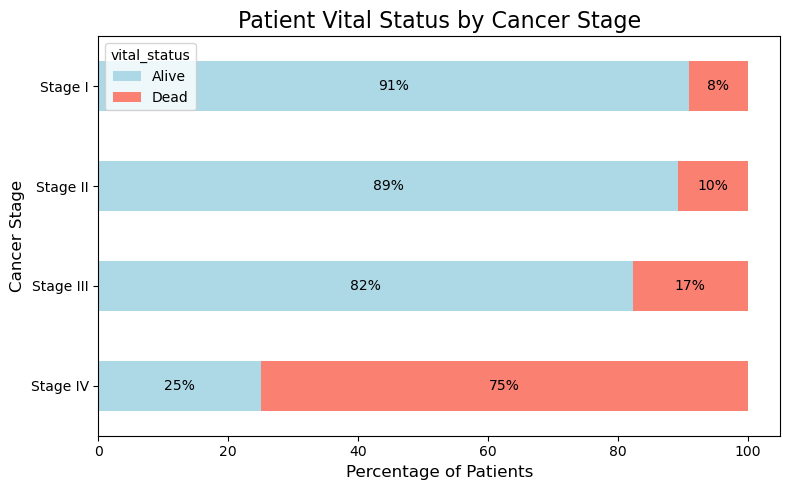

In [45]:
# Ensure that the y-axis is ordered from 'Stage I' to 'Stage IV'
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Define the correct order for the y-axis
stage_order = ['Stage IV', 'Stage III', 'Stage II', 'Stage I']

# Reindex pivot_table to match the correct order
pivot_table_percentage = pivot_table_percentage.reindex(stage_order)

# Plotting the 100% stacked horizontal bar chart
ax = pivot_table_percentage.plot(kind='barh', stacked=True, figsize=(8, 5), color=['lightblue', 'salmon'])

# Adding labels and title
plt.title('Patient Vital Status by Cancer Stage', fontsize=16)
plt.xlabel('Percentage of Patients', fontsize=12)
plt.ylabel('Cancer Stage', fontsize=12)

# Adding the counts at the top of each segment of the bars
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()  # Get the x and y position of the bar
    ax.annotate(f'{int(width)}%', (x + width / 2, y + p.get_height() / 2), ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Display treatment outcome for every cancer stage.

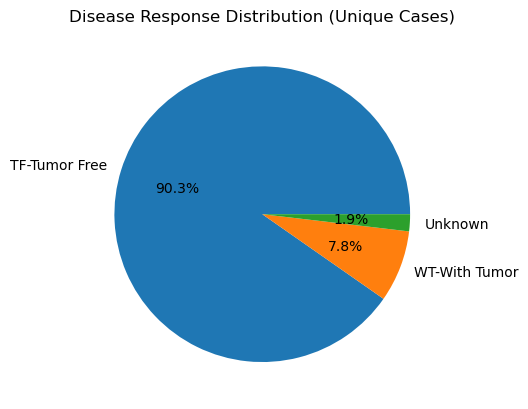

In [46]:
# Pie chart directly from the filtered data
follow_ups_df.drop_duplicates(subset='case_id')['disease_response'] \
    .value_counts() \
    .plot.pie(autopct='%1.1f%%', title='Disease Response Distribution (Unique Cases)')

plt.ylabel("")  # remove y-label for cleaner look
plt.show()

In [47]:
# Remove duplicates based on 'case_id', 'ajcc_pathologic_stage', and 'vital_status'
unique_response_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'cancer_stage', 'disease_response'])

# Create a pivot table to show the counts of each 'vital_status' (Alive/Dead) for each 'ajcc_pathologic_stage'
pivot_table = pd.pivot_table(
    unique_response_df, 
    values='case_id', 
    index='cancer_stage', 
    columns='disease_response', 
    aggfunc='count', 
    fill_value=0
)

pivot_table.T

cancer_stage      Stage I  Stage II  Stage III  Stage IV
disease_response                                        
TF-Tumor Free         177       570        209         2
Unknown                 3        21          9         1
WT-With Tumor          10        56         45        18

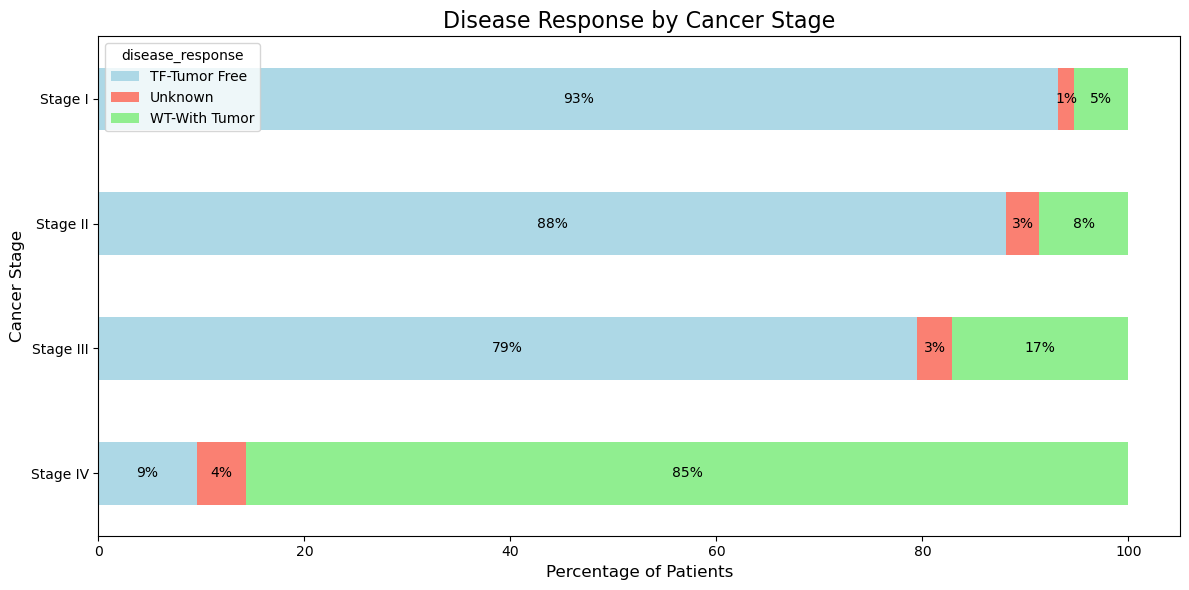

In [48]:
# Define the correct order for the y-axis (stage order)
stage_order = ['Stage IV', 'Stage III', 'Stage II', 'Stage I']

# Normalize the data to percentages (so each bar sums to 100%)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Reorder the rows of the dataframe based on the defined stage order
pivot_table_percentage = pivot_table_percentage.reindex(stage_order)

# Plotting the 100% stacked horizontal bar chart
ax = pivot_table_percentage.plot(kind='barh', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon', 'lightgreen'])

# Adding labels and title
plt.title('Disease Response by Cancer Stage', fontsize=16)
plt.xlabel('Percentage of Patients', fontsize=12)
plt.ylabel('Cancer Stage', fontsize=12)

# Adding the percentage at the center of each segment of the bars
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()  # Get the x and y position of the bar
    ax.annotate(f'{int(width)}%', (x + width / 2, y + p.get_height() / 2), ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

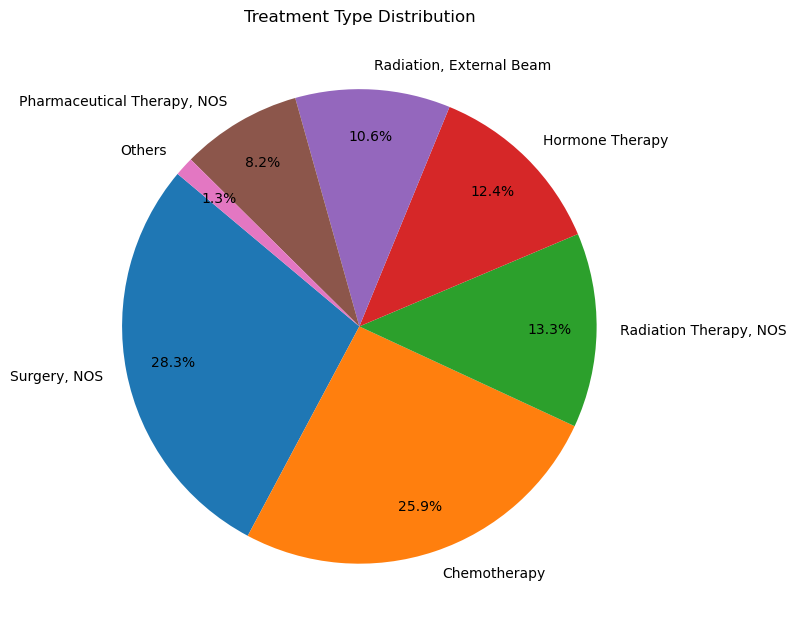

In [49]:
#display(treatments_df['treatment_type'].value_counts())

# Step 1: Get value counts
treatment_counts = treatments_df.drop_duplicates(subset='case_id')['treatment_type'].value_counts()

# Step 2: Keep top N (e.g., all but last 5), group the rest into "Others"
N = len(treatment_counts) - 5  
top_treatments = treatment_counts[:N]
other_sum = treatment_counts[N:].sum()

# Step 3: Append "Other"
final_counts = pd.concat([top_treatments, pd.Series({'Others': other_sum})])


plt.figure(figsize=(8, 8))
final_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.1,
    pctdistance=0.8
)

plt.title('Treatment Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [50]:
# Remove duplicates based on 'case_id', 'disease_response', and 'treatment_type'
unique_response_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'disease_response', 'treatment_type'])

# Create a pivot table to show the counts of each 'disease_response' for each 'combination of 'ajcc_pathologic_stage' and ''treatment_type'
pivot_table = pd.pivot_table(
    unique_response_df, 
    values='case_id', 
    index='treatment_type', 
    columns='disease_response', 
    aggfunc='count', 
    fill_value=0
)

pivot_table

disease_response                    TF-Tumor Free  Unknown  WT-With Tumor
treatment_type                                                           
Ancillary Treatment                             2        0              1
Bisphosphonate Therapy                          3        1              1
Chemotherapy                                  251        9             32
Hormone Therapy                               125        3             14
Immunotherapy (Including Vaccines)              2        0              0
Pharmaceutical Therapy, NOS                    86        3             11
Radiation Therapy, NOS                        129        5             19
Radiation, External Beam                      105        3             13
Radiation, Radioisotope                         1        0              0
Surgery, NOS                                  256       10             39
Targeted Molecular Therapy                      4        0              0

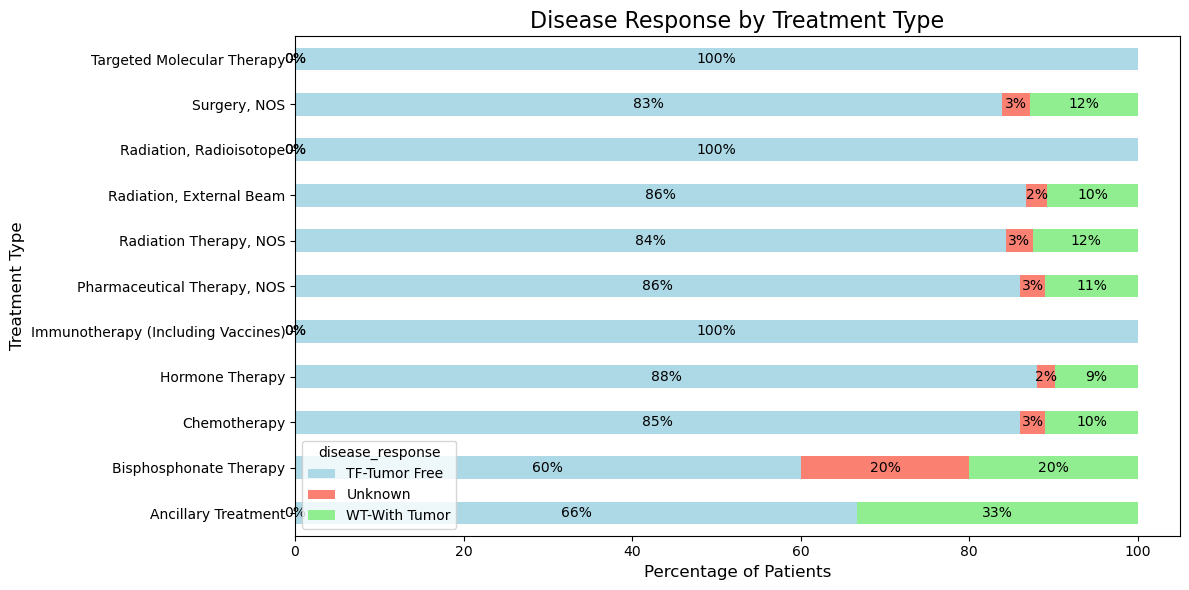

In [51]:
# Normalize the pivot table to percentages (so each bar sums to 100%)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the 100% stacked horizontal bar chart
ax = pivot_table_percentage.plot(kind='barh', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon', 'lightgreen'])

# Adding labels and title
plt.title('Disease Response by Treatment Type', fontsize=16)
plt.xlabel('Percentage of Patients', fontsize=12)
plt.ylabel('Treatment Type', fontsize=12)

# Adding the percentage at the center of each segment of the bars
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()  # Get the x and y position of the bar
    ax.annotate(f'{int(width)}%', (x + width / 2, y + p.get_height() / 2), ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

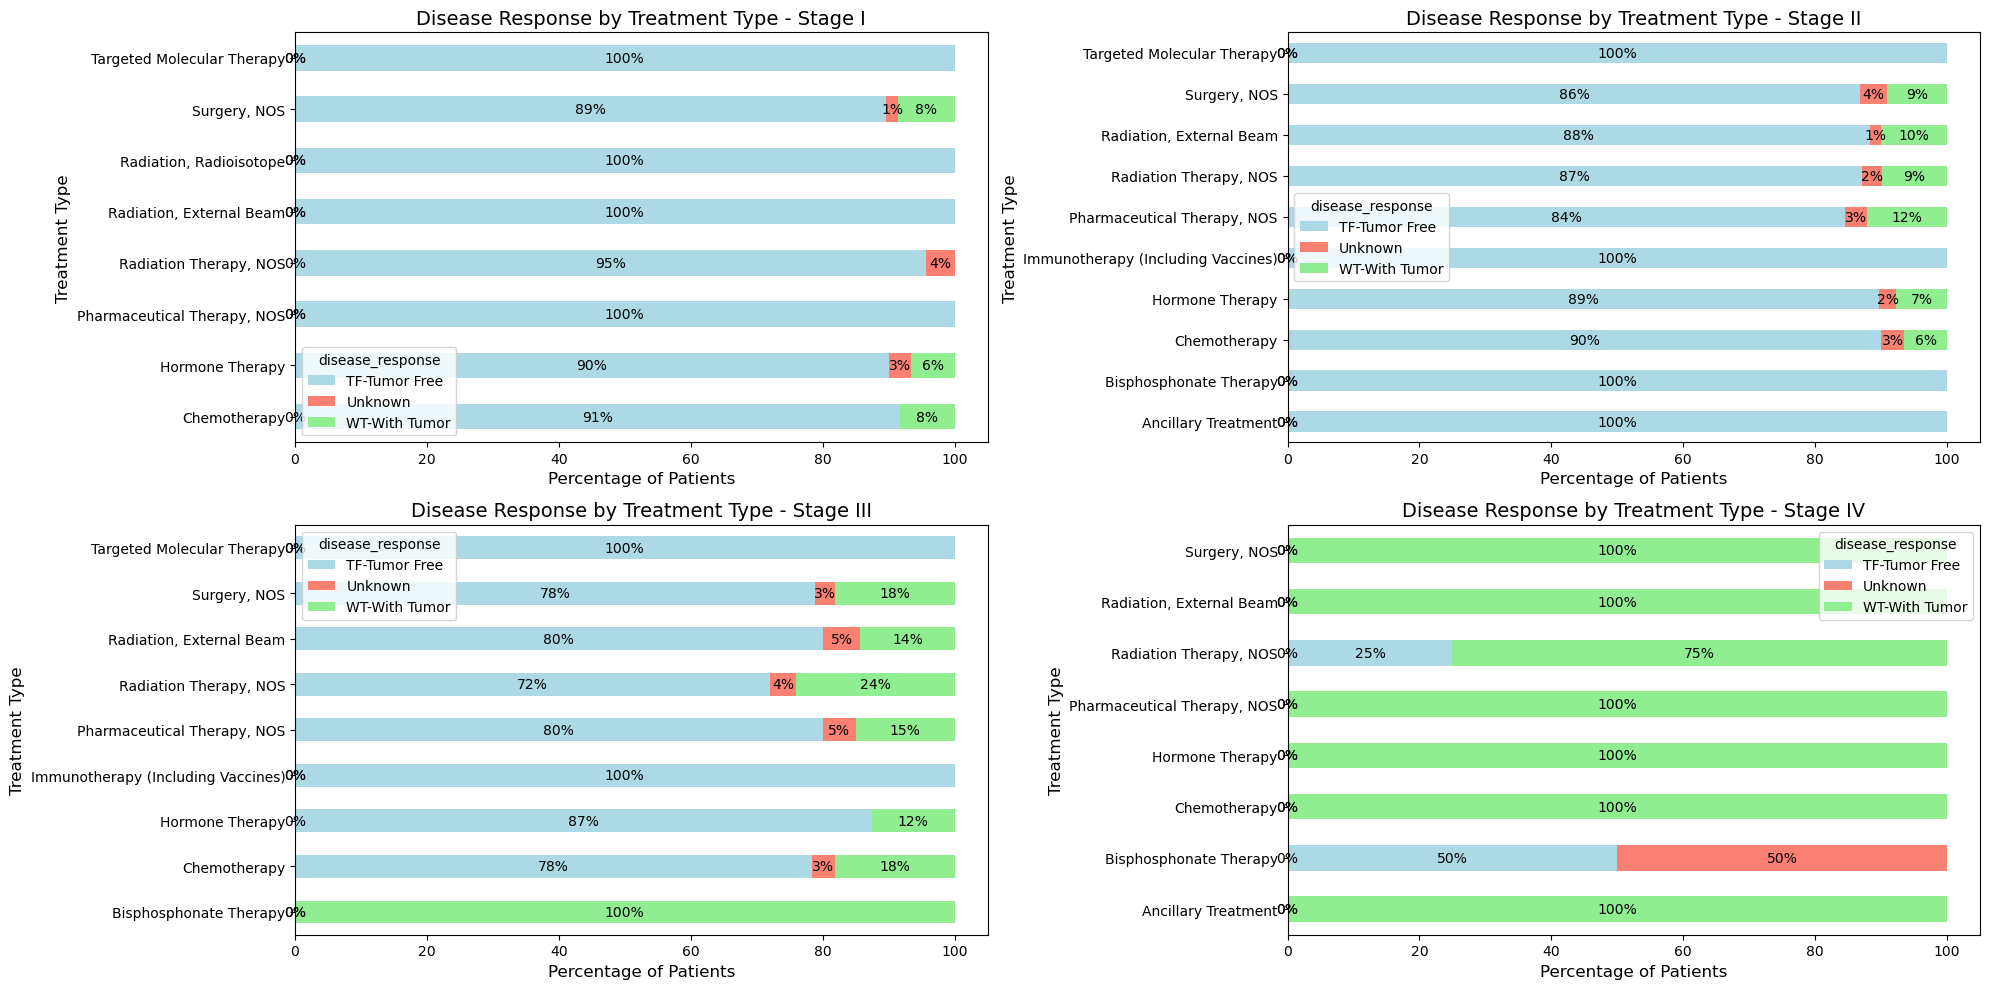

In [52]:
# Step 1: Remove duplicates based on 'case_id', 'disease_response', and 'treatment_type'
unique_response_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'disease_response', 'treatment_type'])

# Step 2: Set up the figure with 4 subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # 2x2 grid layout, adjust size if needed

# Define the stages for the plot
stages = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']

# Step 3: Flatten axes for easier iteration
axes = axes.flatten()

# Step 4: Iterate over the stages to create a separate plot for each
for i, stage in enumerate(stages):
    # Step 5: Filter the data for the current stage
    stage_df = unique_response_df[unique_response_df['cancer_stage'] == stage]
    
    # Step 6: Create a pivot table for the current stage
    stage_pivot = pd.pivot_table(
        stage_df, 
        values='case_id', 
        index='treatment_type', 
        columns='disease_response', 
        aggfunc='count', 
        fill_value=0
    )
    
    # Step 7: Normalize the pivot table to percentages for the current stage
    stage_pivot_percentage = stage_pivot.div(stage_pivot.sum(axis=1), axis=0) * 100
    
    # Step 8: Plot the 100% stacked horizontal bar chart for the current stage
    ax = axes[i]  # Access the corresponding subplot
    stage_pivot_percentage.plot(kind='barh', stacked=True, ax=ax, color=['lightblue', 'salmon', 'lightgreen'])
    
    # Step 9: Set the title and labels for each subplot
    ax.set_title(f'Disease Response by Treatment Type - {stage}', fontsize=14)
    ax.set_xlabel('Percentage of Patients', fontsize=12)
    ax.set_ylabel('Treatment Type', fontsize=12)
    
    # Adding the percentage at the center of each segment of the bars
    for p in ax.patches:
        width = p.get_width()
        x, y = p.get_xy()  # Get the x and y position of the bar
        ax.annotate(f'{int(width)}%', (x + width / 2, y + p.get_height() / 2), ha='center', va='center', fontsize=10)

# Adjust the layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()


Display top therapeutic agents.

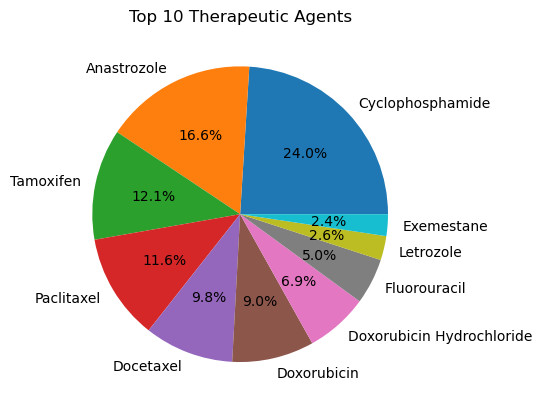

In [53]:
treatments_df.drop_duplicates(subset='case_id')['therapeutic_agents'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Therapeutic Agents')
plt.ylabel('')  
plt.show()

Display primary diagnosis per cancer stage.

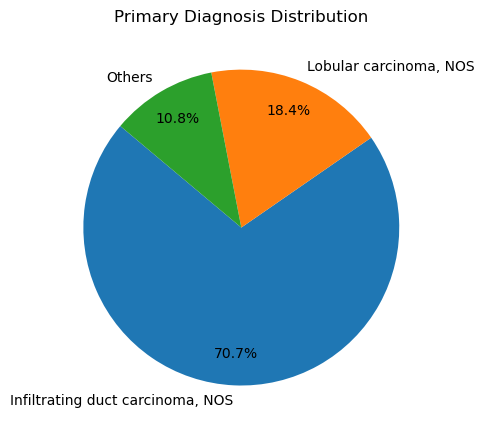

In [54]:
#display(diagnosis_df['primary_diagnosis'].value_counts())

# Step 1: Get value counts
diagnosis_counts = diagnosis_df.drop_duplicates(subset='case_id')['primary_diagnosis'].value_counts()

# Step 2: Keep top N (e.g., all but last 23), group the rest into "Others"
N = len(diagnosis_counts) - 23  
top_diagnosis = diagnosis_counts[:N]
other_sum = diagnosis_counts[N:].sum()

# Step 3: Append "Other"
final_counts = pd.concat([top_diagnosis, pd.Series({'Others': other_sum})])


plt.figure(figsize=(5, 5))
final_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.1,
    pctdistance=0.8
)

plt.title('Primary Diagnosis Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

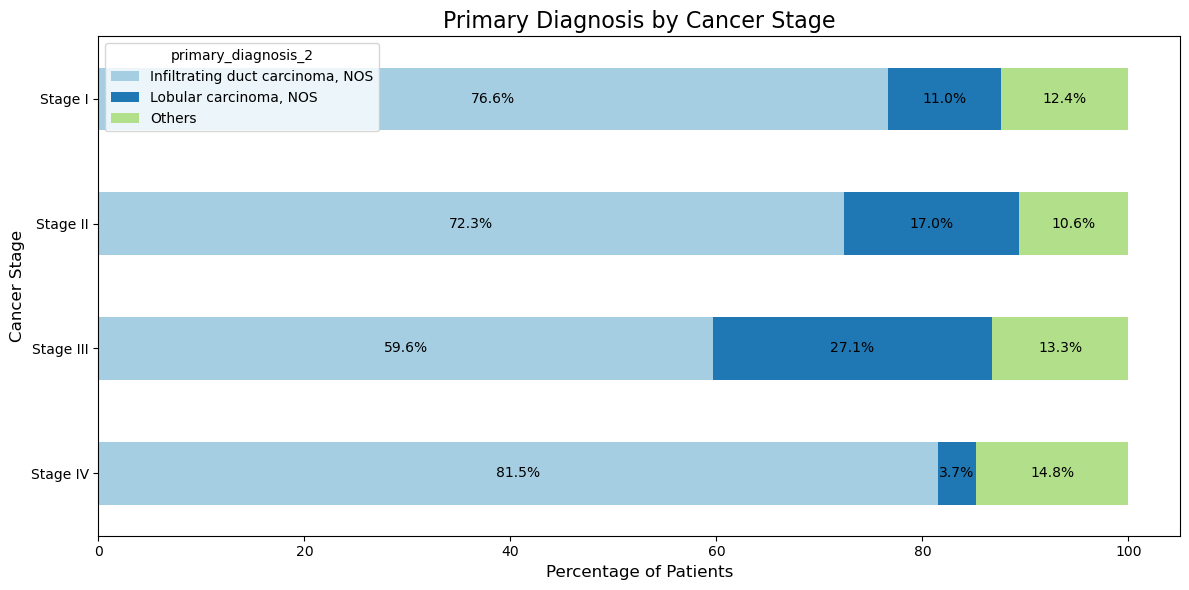

In [55]:
# Step 1: Calculate the diagnosis counts and prepare the final counts
unique_response_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'disease_response', 'treatment_type'])

diagnosis_counts = unique_response_df.drop_duplicates(subset='case_id')['primary_diagnosis'].value_counts()

# Step 2: Get the top 2 primary diagnoses
top_2_diagnoses = diagnosis_counts.head(2).index

# Step 3: Create a new column 'primary_diagnosis_2' to assign "Others" for all non-top 2 diagnoses
unique_response_df.loc[:, 'primary_diagnosis_2'] = unique_response_df['primary_diagnosis'].apply(
    lambda x: x if x in top_2_diagnoses else 'Others'
)

# Step 4: Create a pivot table using the new 'primary_diagnosis_2' column
pivot_table = pd.pivot_table(
    unique_response_df,
    values='case_id',  # Count the occurrences of case_id for each diagnosis and stage
    index='cancer_stage',  # Set cancer_stage as the y-axis
    columns='primary_diagnosis_2',  # Use the new 'primary_diagnosis_2' column
    aggfunc='count',
    fill_value=0  # Fill missing values with 0
)

# Step 5: Normalize the pivot table to get percentages of patients per cancer stage
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Step 6: Reorder the rows by the custom stage order
stage_order = ['Stage IV', 'Stage III', 'Stage II', 'Stage I']
pivot_table_percentage = pivot_table_percentage.loc[stage_order]

# Step 7: Plot the 100% stacked horizontal bar chart
plt.figure(figsize=(12, 6))
ax = pivot_table_percentage.plot(kind='barh', stacked=True, figsize=(12, 6), color=plt.cm.Paired.colors[:len(pivot_table_percentage.columns)])

# Step 8: Add percentages on the bars
for p in ax.patches:
    width = p.get_width()  # Get the width (percentage)
    x, y = p.get_xy()  # Get the x and y position of the bar
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

# Step 9: Adding labels and title
plt.title('Primary Diagnosis by Cancer Stage', fontsize=16)
plt.xlabel('Percentage of Patients', fontsize=12)
plt.ylabel('Cancer Stage', fontsize=12)

# Step 10: Show the plot
plt.tight_layout()
plt.show()

Display Age at Last Follow-Up

                                case_id  days_to_follow_up disease_response  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e             1102.0    TF-Tumor Free   
1  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e              363.0    TF-Tumor Free   
2  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e             1102.0    TF-Tumor Free   
3  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e              635.0    TF-Tumor Free   
4  de531604-bd1a-49df-96c2-6de3ae703f1d              448.0    TF-Tumor Free   

  timepoint_category  days_to_birth  age_last_followup  
0          Follow-up        20401.0          58.912329  
1          Follow-up        20401.0          56.887671  
2       Last Contact        20401.0          58.912329  
3          Follow-up        20401.0          57.632877  
4       Last Contact        31748.0          88.208219  


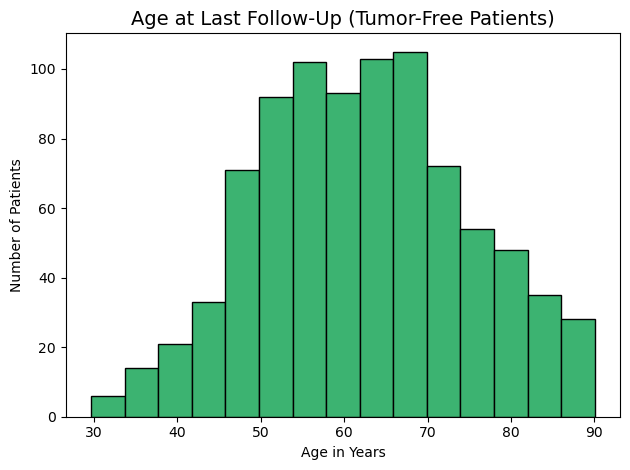

In [56]:
# Age at Last Follow-Up

# Step 1: Create a filtered copy with selected columns and transformed value
demographic_df_filtered = demographic_df[['case_id', 'days_to_birth']].copy()
demographic_df_filtered['days_to_birth'] = demographic_df_filtered['days_to_birth'].abs()

# Select relevant columns from follow_ups_df
follow_ups_df_filtered = follow_ups_df[['case_id', 'days_to_follow_up', 'disease_response', 'timepoint_category']]

# Merge both filtered DataFrames
merged_followup_demo = pd.merge(
    follow_ups_df_filtered,
    demographic_df_filtered,
    on='case_id',
    how='inner'
)

merged_followup_demo['age_last_followup'] = merged_followup_demo['days_to_birth'] + merged_followup_demo['days_to_follow_up']
merged_followup_demo['age_last_followup'] = merged_followup_demo['age_last_followup'] / 365

merged_followup_demo
# View result
print(merged_followup_demo.head())

plt.hist(
    merged_followup_demo.loc[
        (merged_followup_demo['timepoint_category'] == 'Last Contact') &
        (merged_followup_demo['disease_response'] == 'TF-Tumor Free'),
        'age_last_followup' 
    ],
    bins=15,
    color='mediumseagreen',
    edgecolor='black'
)
plt.title('Age at Last Follow-Up (Tumor-Free Patients)', fontsize=14)
plt.xlabel('Age in Years')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

Display Follow up duration based on AJCC Pathologic Stage

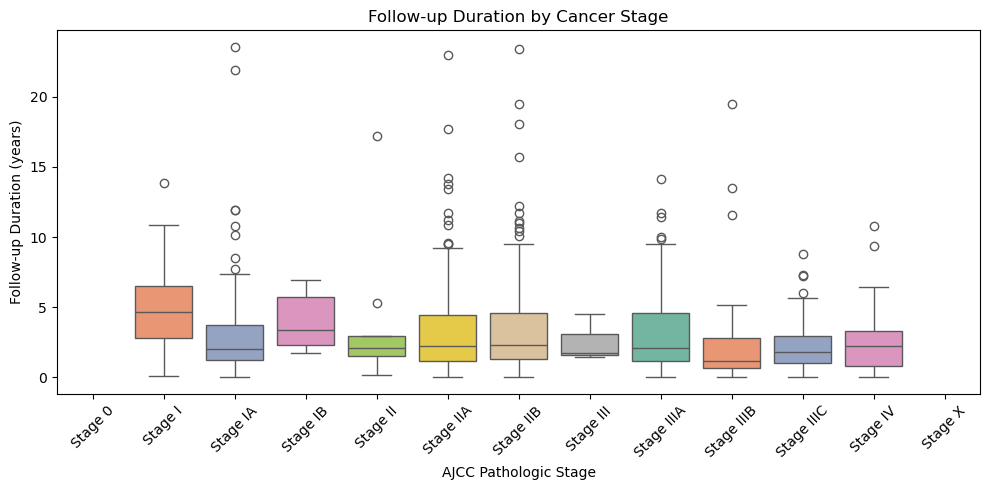

In [57]:
# Follow up duration based on AJCC Pathologic Stage

# 1. Sort follow-ups by days_to_follow_up
follow_ups_sorted = follow_ups_df.sort_values(by='days_to_follow_up')

# 2. Keep the last follow-up per patient
last_followup = follow_ups_sorted.drop_duplicates(subset='case_id', keep='last')

# 3. Prepare demographic data
demographic_filtered = demographic_df[['case_id', 'days_to_birth']].copy()

# 4. Prepare diagnosis stage data (update column name if needed)
diagnosis_filtered = diagnosis_df[['case_id', 'ajcc_pathologic_stage']].copy()

# 5. Merge all together
merged = last_followup \
    .merge(demographic_filtered, on='case_id', how='inner') \
    .merge(diagnosis_filtered, on='case_id', how='left')  # left join keeps patients even if stage is missing

# 6. Calculate ages and duration
merged['age_at_diagnosis'] = merged['days_to_birth'] / -365
merged['age_at_last_followup'] = (merged['days_to_birth'].abs() + merged['days_to_follow_up']) / 365
merged['followup_duration'] = merged['age_at_last_followup'] - merged['age_at_diagnosis']

# Define custom stage order
stage_order = [
    'Stage 0', 'Stage I', 'Stage IA', 'Stage IB',
    'Stage II', 'Stage IIA', 'Stage IIB',
    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC',
    'Stage IV', 'Stage X'
]

# Convert stage to categorical with ordered stages
merged['ajcc_pathologic_stage'] = pd.Categorical(
    merged['ajcc_pathologic_stage'],
    categories=stage_order,
    ordered=True
)

plt.figure(figsize=(10, 5))
sns.boxplot(data=merged, x='ajcc_pathologic_stage', y='followup_duration', palette='Set2')

plt.title('Follow-up Duration by Cancer Stage')
plt.xlabel('AJCC Pathologic Stage')
plt.ylabel('Follow-up Duration (years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Survival Analysis <a id='survival-analysis'></a>

- **Stage-wise Survival Trends:** Survival probability decreases as cancer stage progresses, with Stage I showing the highest survival and Stage IV the lowest, emphasizing the impact of early detection and treatment on survival outcomes.
  
- **Faster Decline in Later Stages:** The survival probability for Stage III and Stage IV cancers declines rapidly over time, while Stage I and II cancers show a more gradual decrease, indicating poorer prognosis at advanced stages.

- **Confidence Intervals:** The shaded areas around each survival curve represent the confidence intervals, showing greater uncertainty in survival estimates as time progresses, especially for later stages.

- **Importance of Early Diagnosis:** The plot underscores the importance of diagnosing cancer at earlier stages (I and II) for better survival chances, as advanced stages (III and IV) are associated with significantly lower survival probabilities.

In [58]:
# Step 1: Create the survival_df by dropping duplicates
survival_df = filtered_clinical_df.drop_duplicates(subset=['case_id', 'vital_status', 'days_to_death', 'days_to_follow_up', 'cancer_stage'])

# Step 2: Calculate the max 'days_to_follow_up' for each patient and create a new column 'days_to_last_follow_up'
days_to_last_follow_up = filtered_clinical_df.groupby('case_id')['days_to_follow_up'].max().reset_index()
days_to_last_follow_up = days_to_last_follow_up.rename(columns={'days_to_follow_up': 'days_to_last_follow_up'})

# Step 3: Merge the 'days_to_last_follow_up' back into the survival_df
survival_df = survival_df.merge(days_to_last_follow_up, on='case_id', how='left')

# Step 4: Create the 'overall_survival' column using the provided logic
survival_df['overall_survival'] = survival_df.apply(
    lambda row: row['days_to_last_follow_up'] if row['vital_status'] == 'Alive' else row['days_to_death'],
    axis=1
)

# Step 5: Drop duplicates based on relevant columns
survival_df = survival_df.drop_duplicates(subset=['case_id', 'vital_status', 'days_to_death', 'days_to_last_follow_up', 'overall_survival', 'cancer_stage'])

# Step 5: Select only the specified columns
survival_df_selected = survival_df[['case_id', 'vital_status', 'days_to_death', 'days_to_last_follow_up', 'overall_survival', 'cancer_stage']]
display(survival_df_selected.head(5))

case_id vital_status  days_to_death  \
0  2d29a4ac-98e7-4663-9dd6-5681bc32ac2e        Alive            NaN   
3  de531604-bd1a-49df-96c2-6de3ae703f1d        Alive            NaN   
5  de646f6a-6d50-4be2-b3cd-f17554b234df         Dead         2866.0   
8  de75d0b9-0f47-4732-8df5-05c350cfcd32        Alive            NaN   
9  deba32e4-0e68-4711-941b-3b63bd965afb         Dead         1093.0   

   days_to_last_follow_up  overall_survival cancer_stage  
0                  1102.0            1102.0     Stage II  
3                   448.0             448.0    Stage III  
5                  2866.0            2866.0     Stage II  
8                    10.0              10.0      Stage I  
9                  1093.0            1093.0     Stage II

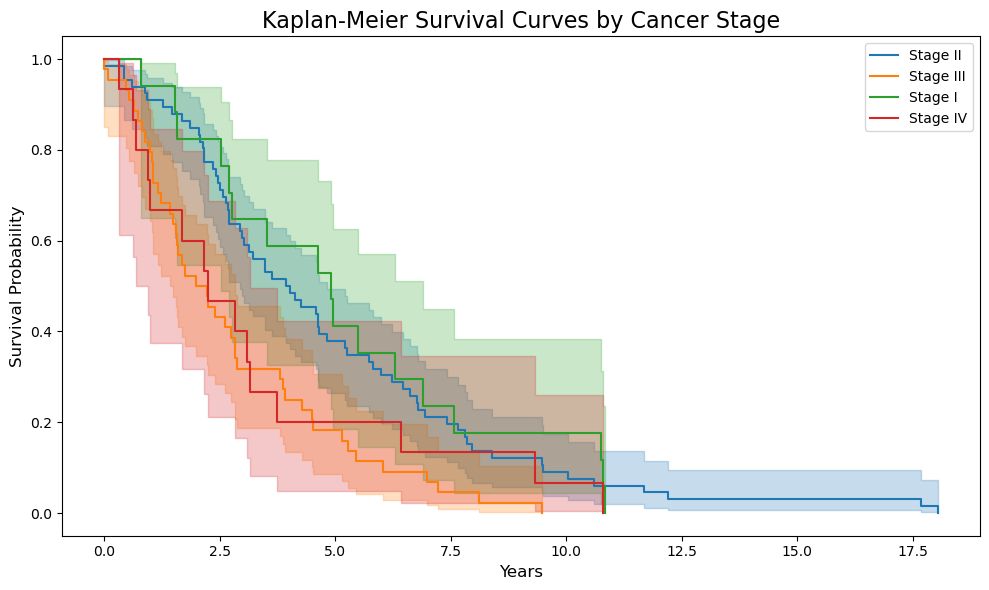

In [59]:
from lifelines import KaplanMeierFitter

# Step 1: Filter the data for non-Alive patients, and exclude rows with NA in 'overall_survival'
survival_data = survival_df_selected[
    (survival_df_selected['vital_status'] != 'Alive') & 
    (survival_df_selected['overall_survival'].notna())
]

# Step 2: Convert overall_survival from days to years
survival_data['overall_survival_years'] = survival_data['overall_survival'] / 365.25

# Step 3: Set the event observed indicator and duration (Kaplan-Meier requires these two)
# 1. If the patient is alive, we mark them as censored (vital_status = 'Alive')
# 2. If the patient is dead, we mark them as observed (vital_status = 'Dead')
survival_data['event_observed'] = survival_data['vital_status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Step 4: Create the Kaplan-Meier plot for each cancer stage
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

# Step 5: Plot the Kaplan-Meier curve for each cancer stage
for stage in survival_data['cancer_stage'].unique():
    stage_data = survival_data[survival_data['cancer_stage'] == stage]
    kmf.fit(durations=stage_data['overall_survival_years'], event_observed=stage_data['event_observed'], label=stage)
    kmf.plot(ci_show=True)  # Plot the Kaplan-Meier curve with confidence intervals

# Step 6: Adding labels and title
plt.title('Kaplan-Meier Survival Curves by Cancer Stage', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.tight_layout()
plt.show()

# DIFFERENTIAL EXPRESSION ANALYSIS (DEA)

In this section, we will perform Differential Expression Analysis (DEA) on our gene expression data, which consists of over 60,660 genes. To facilitate this analysis, we will utilize the rpy2 package in Python to interface with the DESeq2 tool in R. DESeq2 is specifically designed for RNA-seq data and employs statistical methods (like the Wald test) that are more appropriate for count-based data compared to ANOVA, post-hoc tests, and Tukey's HSD, which assume normally distributed data. Using DESeq2 ensures that we account for the overdispersed nature of RNA-seq data, perform appropriate normalization, and apply robust methods for identifying differentially expressed genes (DEGs).

Our approach will involve the following steps:

- **Volcano Plots:** We will use volcano plots to visualize the relationship between log2 fold change and significance (P-value), identifying genes that are upregulated or downregulated across our samples. The log2 fold change helps quantify the magnitude of gene expression differences, with positive values indicating upregulation and negative values indicating downregulation, while the P-value assesses the statistical significance of these differences. Genes with large log2 fold changes and low P-values will be prioritized as potentially biologically relevant, as they represent the most significantly differentially expressed genes. This visualization will allow us to quickly identify genes that are strong candidates for further investigation, including potential biomarkers or therapeutic targets.

- **Differentially Expressed Genes (DEGs):** After identifying the differentially expressed genes, we will focus on gathering the top DEGs and assessing whether their means are statistically significant. These top DEGs will later be used for feature reduction techniques such as Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) to reduce the original set of genes and create a hybrid approach for further analysis.

- **Heatmaps:** We will generate heatmaps to explore gene expression patterns and identify clusters. These clusters could correspond to different sample categories, such as normal versus tumor samples, early-stage versus late-stage cancer, or alive versus deceased patients. The heatmaps will provide detailed insights into the differential expression patterns between these groups.

For this analysis, we used BRCA tissue samples from the TCGA database. Before proceeding with visualization techniques, we manually normalized the data using a log2 transformation due to memory constraints, as the Variance Stabilizing Transformation (VST) function could not be applied. VST is a widely used transformation in RNA-seq analysis, often to stabilize variance and make the data more normally distributed. However, its use was limited in this case due to the size and complexity of the dataset.

## Data Preparation <a id='data-preparation'></a>

We started with two main datasets:<br>
- Raw count matrix representing RNA-Seq expression data, indexed by gene and sample identifiers. <br>
- Sample metadata containing clinical annotations such as Sample (Tumor/Normal), Stage, Stage_group (Early/Late), and Stage_Compare (Stage_I/Stage_IV).<br>
All data were harmonized to ensure consistency in sample identifiers across matrices.<br>

Prepare metadata and map to the RNA-Seq expression data by gene and samples

In [60]:
# Keep only the first occurrence of each duplicated 'samples_submitter_id'
assay_df_transposed_first_occurrence = assay_df_transposed[~assay_df_transposed['samples_submitter_id'].duplicated(keep='first')]

# Display the result
display(assay_df_transposed_first_occurrence.head())
assay_df_transposed_first_occurrence.shape

# 1. Set the sample IDs as index
assay_df_reformatted = assay_df_transposed_first_occurrence.set_index('samples_submitter_id')

# 2. Transpose the DataFrame (flip rows & columns)
assay_df_final = assay_df_reformatted.T

# 3. Check the shape and preview
print(assay_df_final.shape)
display(assay_df_final.head())

gene_name samples_submitter_id  TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  \
0             TCGA-A2-A25D-01A    4474     9  1785   1362       433  928   
1             TCGA-BH-A201-01A    3555    30  2537   1865       890  711   
2             TCGA-AC-A23C-01A     731   113  5947   3118      1063  460   
3             TCGA-AR-A5QP-01A    3960    50  2155   1355       474  237   
4             TCGA-C8-A12P-01A    3834     0  3161   1411       637  468   

gene_name   CFH  FUCA2  GCLC  ...  AL451106.1  AC092910.4  AC073611.1  \
0          2445   4487  2278  ...           0           0          27   
1          4352   2175  2472  ...           0           0          38   
2          4609   4547  2265  ...           0           3          60   
3          2440   2270  2637  ...           0           0          18   
4          4472   2588  1601  ...           0           0           8   

gene_name  AC136977.1  AC078856.1  AC008763.4  AL592295.6  AC006486.3  \
0                   0           0           0         150           0   
1                   0           0           0         590           0   
2                   0           0           0         754           0   
3                   0           0           0         332           0   
4                   0           0           0         354           0   

gene_name  AL391628.1  AP006621.6  
0                   6          21  
1                  11          28  
2                  14          31  
3                   9          31  
4                   0          13  

[5 rows x 60661 columns]

(60660, 1191)


samples_submitter_id  TCGA-A2-A25D-01A  TCGA-BH-A201-01A  TCGA-AC-A23C-01A  \
gene_name                                                                    
TSPAN6                            4474              3555               731   
TNMD                                 9                30               113   
DPM1                              1785              2537              5947   
SCYL3                             1362              1865              3118   
C1orf112                           433               890              1063   

samples_submitter_id  TCGA-AR-A5QP-01A  TCGA-C8-A12P-01A  TCGA-BH-A0W3-01A  \
gene_name                                                                    
TSPAN6                            3960              3834               826   
TNMD                                50                 0                 8   
DPM1                              2155              3161              1483   
SCYL3                             1355              1411              1594   
C1orf112                           474               637               645   

samples_submitter_id  TCGA-AC-A8OQ-01A  TCGA-BH-A0H6-01A  TCGA-D8-A27V-01A  \
gene_name                                                                    
TSPAN6                             690              5534             13509   
TNMD                                55                29                15   
DPM1                              2456              1511              3060   
SCYL3                              646               929              7099   
C1orf112                           764               300              1449   

samples_submitter_id  TCGA-D8-A27M-01A  ...  TCGA-GM-A2DI-01A  \
gene_name                               ...                     
TSPAN6                            2496  ...               427   
TNMD                                39  ...                 5   
DPM1                              1446  ...               894   
SCYL3                             1702  ...               537   
C1orf112                           655  ...               208   

samples_submitter_id  TCGA-AC-A3TM-01A  TCGA-LL-A441-01A  TCGA-A7-A13G-01A  \
gene_name                                                                    
TSPAN6                            1153              5172              3299   
TNMD                                 5                68                24   
DPM1                              1118              4333              1465   
SCYL3                              573              2584              5199   
C1orf112                           281               971              1257   

samples_submitter_id  TCGA-BH-A0E6-01A  TCGA-LL-A5YP-01A  TCGA-AO-A03L-01A  \
gene_name                                                                    
TSPAN6                            7389              2300               955   
TNMD                                20                 7                 3   
DPM1                              1366              2524              3231   
SCYL3                              650               720              1763   
C1orf112                          1414               632               899   

samples_submitter_id  TCGA-BH-A42T-01A  TCGA-A2-A04W-01A  TCGA-AR-A24O-01A  
gene_name                                                                   
TSPAN6                            2641              2718              1856  
TNMD                                40                 1                58  
DPM1                              2311              1914              2184  
SCYL3                             1263               677              1206  
C1orf112                           904               291               574  

[5 rows x 1191 columns]

In [61]:
# Define stage grouping
early_stages = ['Stage I', 'Stage IA', 'Stage IB', 'Stage II', 'Stage IIA', 'Stage IIB']
late_stages = ['Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC', 'Stage IV']

# Filter metadata to samples that are in your count matrix
matched_meta = filtered_clinical_df[filtered_clinical_df['samples_submitter_id'].isin(assay_df_final.columns)].copy()

# Keep only needed columns
metadata_df = matched_meta[['samples_submitter_id', 'sample_type', 'ajcc_pathologic_stage']].copy()

# Rename for R/DESeq2
metadata_df = metadata_df.rename(columns={
    'samples_submitter_id': 'Sample_ID',
    'sample_type': 'Sample',
    'ajcc_pathologic_stage': 'Stage'
})

# Normalize labels
metadata_df['Sample'] = metadata_df['Sample'].replace({
    'Primary Tumor': 'Tumor',
    'Solid Tissue Normal': 'Normal',
})

# Map early/late stage
metadata_df['Stage_group'] = metadata_df['Stage'].map(
    lambda s: 'Early' if s in early_stages else ('Late' if s in late_stages else 'unknown')
)

# Optional: drop 'unknown' if you want to keep only clear labels
metadata_df = metadata_df[metadata_df['Stage_group'] != 'unknown']

# Set index to match assay_df columns
metadata_df.set_index('Sample_ID', inplace=True)

In [62]:
# Create a dictionary for mapping the stages
stage_mapping = {
    'Stage I': 'Stage I', 'Stage IA': 'Stage I', 'Stage IB': 'Stage I', 
    'Stage II': 'Stage II', 'Stage IIA': 'Stage II', 'Stage IIB': 'Stage II',
    'Stage III': 'Stage III', 'Stage IIIA': 'Stage III', 'Stage IIIB': 'Stage III', 'Stage IIIC': 'Stage III',
    'Stage IV': 'Stage IV'
}

# Map the values to the simplified stages using the dictionary
metadata_df['Cancer_stage'] = metadata_df['Stage'].map(stage_mapping)

# Final check
display(metadata_df.head())

Sample       Stage Stage_group Cancer_stage
Sample_ID                                                   
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-D8-A1XG-01A  Tumor  Stage IIIB        Late    Stage III

In [63]:
display(assay_df_final.head())
display(metadata_df.head())

samples_submitter_id  TCGA-A2-A25D-01A  TCGA-BH-A201-01A  TCGA-AC-A23C-01A  \
gene_name                                                                    
TSPAN6                            4474              3555               731   
TNMD                                 9                30               113   
DPM1                              1785              2537              5947   
SCYL3                             1362              1865              3118   
C1orf112                           433               890              1063   

samples_submitter_id  TCGA-AR-A5QP-01A  TCGA-C8-A12P-01A  TCGA-BH-A0W3-01A  \
gene_name                                                                    
TSPAN6                            3960              3834               826   
TNMD                                50                 0                 8   
DPM1                              2155              3161              1483   
SCYL3                             1355              1411              1594   
C1orf112                           474               637               645   

samples_submitter_id  TCGA-AC-A8OQ-01A  TCGA-BH-A0H6-01A  TCGA-D8-A27V-01A  \
gene_name                                                                    
TSPAN6                             690              5534             13509   
TNMD                                55                29                15   
DPM1                              2456              1511              3060   
SCYL3                              646               929              7099   
C1orf112                           764               300              1449   

samples_submitter_id  TCGA-D8-A27M-01A  ...  TCGA-GM-A2DI-01A  \
gene_name                               ...                     
TSPAN6                            2496  ...               427   
TNMD                                39  ...                 5   
DPM1                              1446  ...               894   
SCYL3                             1702  ...               537   
C1orf112                           655  ...               208   

samples_submitter_id  TCGA-AC-A3TM-01A  TCGA-LL-A441-01A  TCGA-A7-A13G-01A  \
gene_name                                                                    
TSPAN6                            1153              5172              3299   
TNMD                                 5                68                24   
DPM1                              1118              4333              1465   
SCYL3                              573              2584              5199   
C1orf112                           281               971              1257   

samples_submitter_id  TCGA-BH-A0E6-01A  TCGA-LL-A5YP-01A  TCGA-AO-A03L-01A  \
gene_name                                                                    
TSPAN6                            7389              2300               955   
TNMD                                20                 7                 3   
DPM1                              1366              2524              3231   
SCYL3                              650               720              1763   
C1orf112                          1414               632               899   

samples_submitter_id  TCGA-BH-A42T-01A  TCGA-A2-A04W-01A  TCGA-AR-A24O-01A  
gene_name                                                                   
TSPAN6                            2641              2718              1856  
TNMD                                40                 1                58  
DPM1                              2311              1914              2184  
SCYL3                             1263               677              1206  
C1orf112                           904               291               574  

[5 rows x 1191 columns]

Sample       Stage Stage_group Cancer_stage
Sample_ID                                                   
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-A2-A3KC-01A  Tumor   Stage IIB       Early     Stage II
TCGA-D8-A1XG-01A  Tumor  Stage IIIB        Late    Stage III

In [64]:
# Ensure only unique samples are kept
assay_df_final = assay_df_final[~assay_df_final.index.duplicated(keep='first')]
metadata_df = metadata_df[~metadata_df.index.duplicated(keep='first')]

In [65]:
# Match the assay data with the metadata
metadata_df = metadata_df.loc[assay_df_final.columns]
assert list(assay_df_final.columns) == list(metadata_df.index)

display(metadata_df.head())
display(assay_df_final.head())

Sample       Stage Stage_group Cancer_stage
samples_submitter_id                                            
TCGA-A2-A25D-01A      Tumor  Stage IIIC        Late    Stage III
TCGA-BH-A201-01A      Tumor    Stage IA       Early      Stage I
TCGA-AC-A23C-01A      Tumor   Stage IIB       Early     Stage II
TCGA-AR-A5QP-01A      Tumor   Stage IIB       Early     Stage II
TCGA-C8-A12P-01A      Tumor   Stage IIB       Early     Stage II

samples_submitter_id  TCGA-A2-A25D-01A  TCGA-BH-A201-01A  TCGA-AC-A23C-01A  \
gene_name                                                                    
TSPAN6                            4474              3555               731   
TNMD                                 9                30               113   
DPM1                              1785              2537              5947   
SCYL3                             1362              1865              3118   
C1orf112                           433               890              1063   

samples_submitter_id  TCGA-AR-A5QP-01A  TCGA-C8-A12P-01A  TCGA-BH-A0W3-01A  \
gene_name                                                                    
TSPAN6                            3960              3834               826   
TNMD                                50                 0                 8   
DPM1                              2155              3161              1483   
SCYL3                             1355              1411              1594   
C1orf112                           474               637               645   

samples_submitter_id  TCGA-AC-A8OQ-01A  TCGA-BH-A0H6-01A  TCGA-D8-A27V-01A  \
gene_name                                                                    
TSPAN6                             690              5534             13509   
TNMD                                55                29                15   
DPM1                              2456              1511              3060   
SCYL3                              646               929              7099   
C1orf112                           764               300              1449   

samples_submitter_id  TCGA-D8-A27M-01A  ...  TCGA-GM-A2DI-01A  \
gene_name                               ...                     
TSPAN6                            2496  ...               427   
TNMD                                39  ...                 5   
DPM1                              1446  ...               894   
SCYL3                             1702  ...               537   
C1orf112                           655  ...               208   

samples_submitter_id  TCGA-AC-A3TM-01A  TCGA-LL-A441-01A  TCGA-A7-A13G-01A  \
gene_name                                                                    
TSPAN6                            1153              5172              3299   
TNMD                                 5                68                24   
DPM1                              1118              4333              1465   
SCYL3                              573              2584              5199   
C1orf112                           281               971              1257   

samples_submitter_id  TCGA-BH-A0E6-01A  TCGA-LL-A5YP-01A  TCGA-AO-A03L-01A  \
gene_name                                                                    
TSPAN6                            7389              2300               955   
TNMD                                20                 7                 3   
DPM1                              1366              2524              3231   
SCYL3                              650               720              1763   
C1orf112                          1414               632               899   

samples_submitter_id  TCGA-BH-A42T-01A  TCGA-A2-A04W-01A  TCGA-AR-A24O-01A  
gene_name                                                                   
TSPAN6                            2641              2718              1856  
TNMD                                40                 1                58  
DPM1                              2311              1914              2184  
SCYL3                             1263               677              1206  
C1orf112                           904               291               574  

[5 rows x 1191 columns]

## DEG Detection via DESeq2 <a id='deg-detection-via-deseq2'></a>

For each clinical contrast, we created a DESeq2 dataset (dds_sample, dds_stage, dds_stage_comp) and using rpy2 to applied the DESeq2 statistical model and estimate differentially expressed genes (DEGs). <br>

- The DESeq2 outputs included log2FoldChange, p-values, and Benjamini-Hochberg adjusted p-values (padj).

- DEGs were ranked by significance (padj), and the top 50 or 300 DEGs were selected for downstream visualization and clustering.

- DEG tables were stored as deg_df_sample, deg_df_stage, and deg_stage_comp_df.

Activate rpy2 and run DESeq2 on each target groups

In [69]:
# import rpy2.robjects as robjects
# from rpy2.robjects import pandas2ri
# from rpy2.robjects.packages import importr
# from rpy2.robjects import globalenv
# from rpy2.robjects import r

# # Activate pandas ↔ R conversion
# pandas2ri.activate()

# # Import R's DESeq2
# deseq2 = importr('DESeq2')
# base = importr('base')

import rpy2.robjects as ro
from rpy2.robjects import r, default_converter, conversion
from rpy2.robjects import globalenv
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

# Set pandas <-> R conversion globally (replaces pandas2ri.activate())
conversion.set_conversion(default_converter + pandas2ri.converter)

# Import R packages
deseq2 = importr("DESeq2")
base = importr("base")

In [67]:
# # Send to R
# globalenv['count_data'] = pandas2ri.py2rpy(assay_df_final.astype(int).T)
# globalenv['col_data'] = pandas2ri.py2rpy(metadata_df)

In [70]:
# Send to R
globalenv['count_data'] = pandas2ri.py2rpy(assay_df_final.astype(int))
globalenv['col_data'] = pandas2ri.py2rpy(metadata_df)

In [71]:
r('rownames(col_data)') 

<rpy2.robjects.vectors.StrVector object at 0x332797d80> [RTYPES.STRSXP]
R classes: ('character',)
['TCGA-A2-..., 'TCGA-BH-..., 'TCGA-AC-..., 'TCGA-AR-..., ..., 'TCGA-AO-..., 'TCGA-BH-..., 'TCGA-A2-..., 'TCGA-AR-...]

In [72]:
r('rownames(count_data)')

<rpy2.robjects.vectors.StrVector object at 0x338269140> [RTYPES.STRSXP]
R classes: ('character',)
['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', ..., 'AL592295..., 'AC006486..., 'AL391628..., 'AP006621...]

In [73]:
# Design 1: Tumor vs Normal
r('dds_sample <- DESeqDataSetFromMatrix(countData = count_data, colData = col_data, design = ~ Sample)')
r('dds_sample <- DESeq(dds_sample)')

R callback write-console: Además:   
R callback write-console: Aviso:
  
R callback write-console: In DESeqDataSet(se, design = design, ignoreRank) :  
R callback write-console: 
   
R callback write-console:  some variables in design formula are characters, converting to factors
  
R callback write-console: estimating size factors
  
R callback write-console: estimating dispersions
  
R callback write-console: gene-wise dispersion estimates
  
R callback write-console: mean-dispersion relationship
  
R callback write-console: final dispersion estimates
  
R callback write-console: fitting model and testing
  
R callback write-console: -- replacing outliers and refitting for 10124 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
  
R callback write-console: estimating dispersions
  
R callback write-console: fitting model and testing
  


In [74]:
# Design 2: Early vs Late Stage
r('dds_stage <- DESeqDataSetFromMatrix(countData = count_data, colData = col_data, design = ~ Stage_group)')
r('dds_stage <- DESeq(dds_stage)')

R callback write-console: Además:   
R callback write-console: Aviso:
  
R callback write-console: In DESeqDataSet(se, design = design, ignoreRank) :  
R callback write-console: 
   
R callback write-console:  some variables in design formula are characters, converting to factors
  
R callback write-console: estimating size factors
  
R callback write-console: estimating dispersions
  
R callback write-console: gene-wise dispersion estimates
  
R callback write-console: mean-dispersion relationship
  
R callback write-console: final dispersion estimates
  
R callback write-console: fitting model and testing
  
R callback write-console: -- replacing outliers and refitting for 12419 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
  
R callback write-console: estimating dispersions
  
R callback write-console: fitting model and testing
  


In [75]:
# Design 3: Stage I vs Stage II vs Stage III vs Stage IV
r('dds_stage_2 <- DESeqDataSetFromMatrix(countData = count_data, colData = col_data, design = ~ Cancer_stage)')
r('dds_stage_2 <- DESeq(dds_stage_2)')

R callback write-console:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]
  
R callback write-console: Además:   
R callback write-console: Aviso:
  
R callback write-console: In DESeqDataSet(se, design = design, ignoreRank) :  
R callback write-console: 
   
R callback write-console:  some variables in design formula are characters, converting to factors
  
R callback write-console: estimating size factors
  
R callback write-console:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]
  
R cal

In [77]:
# Organize result and convert to pandas dataframe
r('res_sample <- results(dds_sample)')
r('res_stage <- results(dds_stage)')

# Reorder
r('resOrdered1 <- res_sample[order(res_sample$padj), ]')
r('resOrdered2 <- res_stage[order(res_stage$padj), ]')

# Convert to pandas DataFrame
#res_df_sample = pandas2ri.rpy2py(r('as.data.frame(resOrdered1)')) #Tumor vs Normal
#res_df_stage = pandas2ri.rpy2py(r('as.data.frame(resOrdered2)')) # Early vs Late Stage

res_df_sample = r('as.data.frame(resOrdered1)')
res_df_stage  = r('as.data.frame(resOrdered2)')

# Display the first few rows of the results DataFrame
display(res_df_sample.head())
display(res_df_stage.head())

baseMean  log2FoldChange     lfcSE       stat  pvalue  padj
MMP11    24229.459192        6.277602  0.144596  43.414719     0.0   0.0
MYOM1      560.166773       -4.848706  0.117586 -41.235561     0.0   0.0
NEK2      1473.609580        4.251823  0.112961  37.639700     0.0   0.0
GPAM      4813.563139       -4.419438  0.107695 -41.036556     0.0   0.0
COL10A1   8483.005443        7.116426  0.156665  45.424519     0.0   0.0

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
RNU4-2     345.810063       -4.115220  0.211065 -19.497406  1.154939e-84   
SNORA73B   189.044599       -3.139120  0.166790 -18.820741  5.106539e-79   
RNU4-1      88.514220       -4.141458  0.221743 -18.676846  7.640282e-78   
CHGA       393.547818       -4.197245  0.237163 -17.697732  4.365331e-70   
AFAP1-AS1  203.890765       -2.922460  0.167325 -17.465747  2.612571e-68   

                   padj  
RNU4-2     4.922236e-80  
SNORA73B   1.088178e-74  
RNU4-1     1.085404e-73  
CHGA       4.651151e-66  
AFAP1-AS1  2.226903e-64

In [79]:
# Organize result and convert to pandas dataframe
r('res_stage_2 <- results(dds_stage_2)')

# Reorder
r('resOrdered3 <- res_stage_2[order(res_stage_2$padj), ]')

# Convert to pandas DataFrame
#res_df_stage_2 = pandas2ri.rpy2py(r('as.data.frame(resOrdered3)')) # Stage I vs Stage II vs Stage III vs Stage IV
res_df_stage_2 = r('as.data.frame(resOrdered3)')

# Display the first few rows of the results DataFrame
display(res_df_stage_2.head())

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
CT83      68.994052      -23.972906  1.658159 -14.457544  2.246734e-47   
FAM9C      5.568655        5.863192  0.589503   9.945986  2.625620e-23   
CARTPT   538.901116      -10.825191  1.455971  -7.435029  1.045447e-13   
PAGE5      5.030474        5.084556  0.749165   6.786965  1.145172e-11   
NOC2LP1  161.437430       -3.594056  0.556693  -6.456086  1.074453e-10   

                 padj  
CT83     7.348394e-43  
FAM9C    4.293807e-19  
CARTPT   1.139781e-09  
PAGE5    9.363785e-08  
NOC2LP1  6.661652e-07

In [80]:
# Filtering significant differentially expressed genes (DEGs) 

deg_df_sample = res_df_sample[(res_df_sample['padj'] < 0.05) & (abs(res_df_sample['log2FoldChange']) > 1)]
display(deg_df_sample.head(10))

deg_df_stage = res_df_stage[(res_df_stage['padj'] < 0.05) & (abs(res_df_stage['log2FoldChange']) > 1)]
display(deg_df_stage.head(10))

# Save the results to CSV files
deg_df_sample.to_csv('DEG_Tumor_vs_Normal.csv')
deg_df_stage.to_csv('DEG_Early_vs_Late_Stage.csv')

baseMean  log2FoldChange     lfcSE       stat         pvalue  \
MMP11      24229.459192        6.277602  0.144596  43.414719   0.000000e+00   
MYOM1        560.166773       -4.848706  0.117586 -41.235561   0.000000e+00   
NEK2        1473.609580        4.251823  0.112961  37.639700   0.000000e+00   
GPAM        4813.563139       -4.419438  0.107695 -41.036556   0.000000e+00   
COL10A1     8483.005443        7.116426  0.156665  45.424519   0.000000e+00   
FHL1        9096.328269       -5.050475  0.139221 -36.276574  3.788170e-288   
LINC01614    303.193323        5.577019  0.154205  36.166281  2.064163e-286   
TNS1       15062.227598       -3.104378  0.088531 -35.065275  2.281436e-269   
COL11A1    11919.899933        6.182398  0.177643  34.802313  2.244028e-265   
KIF4A       1539.695404        3.846192  0.113175  33.984406  3.786853e-253   

                    padj  
MMP11       0.000000e+00  
MYOM1       0.000000e+00  
NEK2        0.000000e+00  
GPAM        0.000000e+00  
COL10A1     0.000000e+00  
FHL1       2.899402e-284  
LINC01614  1.354179e-282  
TNS1       1.309630e-265  
COL11A1    1.145028e-261  
KIF4A      1.739036e-249

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
RNU4-2      345.810063       -4.115220  0.211065 -19.497406  1.154939e-84   
SNORA73B    189.044599       -3.139120  0.166790 -18.820741  5.106539e-79   
RNU4-1       88.514220       -4.141458  0.221743 -18.676846  7.640282e-78   
CHGA        393.547818       -4.197245  0.237163 -17.697732  4.365331e-70   
AFAP1-AS1   203.890765       -2.922460  0.167325 -17.465747  2.612571e-68   
SNORA23      23.438153       -3.592877  0.217356 -16.529936  2.233801e-61   
SCARNA5      40.943897       -3.084581  0.195625 -15.767830  5.179891e-56   
AL031668.2   75.111120       -2.303215  0.147402 -15.625372  4.890604e-55   
SNORA74B     18.774155       -3.616103  0.237182 -15.246133  1.746757e-52   
SNORA74A     21.205155       -4.118988  0.278309 -14.800049  1.463764e-49   

                    padj  
RNU4-2      4.922236e-80  
SNORA73B    1.088178e-74  
RNU4-1      1.085404e-73  
CHGA        4.651151e-66  
AFAP1-AS1   2.226903e-64  
SNORA23     1.586706e-57  
SCARNA5     3.153740e-52  
AL031668.2  2.605408e-51  
SNORA74B    8.271669e-49  
SNORA74A    6.238415e-46

Create Additional group comparison (Stage I vs Stage IV)

In [81]:
# Filter metadata for only relevant samples
stage_i_variants = ["Stage I", "Stage IA", "Stage IB"]
stage_iv = ["Stage IV"]

# Select only those samples
metadata_stage_compare = metadata_df[metadata_df["Stage"].isin(stage_i_variants + stage_iv)].copy()

# Create new grouping column
metadata_stage_compare["Stage_Compare"] = metadata_stage_compare["Stage"].apply(
    lambda s: "Stage_I" if s in stage_i_variants else "Stage_IV"
)

# Ensure you're using raw counts for DESeq2
assay_stage_counts = assay_df_final[metadata_stage_compare.index]

In [83]:
# import rpy2.robjects as ro

# # Activate conversion
# pandas2ri.activate()

# # Send to R
# ro.globalenv["countData"] = pandas2ri.py2rpy(assay_stage_counts.astype(int))
# ro.globalenv["colData"] = pandas2ri.py2rpy(metadata_stage_compare)

# # Create DESeq2DataSet
# ro.r('dds_stage_comp <- DESeqDataSetFromMatrix(countData = countData, colData = colData, design = ~ Stage_Compare)')

# # Run DESeq2
# ro.r('dds_stage_comp <- DESeq(dds_stage_comp)')

# # Extract results: contrast Stage_IV vs Stage_I
# ro.r('res_stage_comp <- results(dds_stage_comp, contrast=c("Stage_Compare", "Stage_IV", "Stage_I"))')
import rpy2.robjects as ro
from rpy2.robjects import r, conversion, default_converter
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# 1) enable pandas<->R conversion (replaces pandas2ri.activate())
conversion.set_conversion(default_converter + pandas2ri.converter)

# 2) make sure DESeq2 is loaded
deseq2 = importr("DESeq2")

# --- your Python dataframes: assay_stage_counts (genes x samples), metadata_stage_compare (samples x covariates)

# 3) send data to R
r_count = ro.conversion.py2rpy(assay_stage_counts.astype(int))
r_col   = ro.conversion.py2rpy(metadata_stage_compare)
ro.globalenv["countData"] = r_count
ro.globalenv["colData"]   = r_col

# 4) ensure Stage_Compare is a factor with desired baseline (Stage_I)
r('''
colData$Stage_Compare <- as.factor(colData$Stage_Compare)
# optional: set baseline explicitly
colData$Stage_Compare <- relevel(colData$Stage_Compare, ref = "Stage_I")
''')

# 5) build DESeq2 dataset and run
r('dds_stage_comp <- DESeqDataSetFromMatrix(countData = countData, colData = colData, design = ~ Stage_Compare)')
r('dds_stage_comp <- DESeq(dds_stage_comp)')

# 6) extract contrast: Stage_IV vs Stage_I (explicit contrast, independent of baseline)
r('res_stage_comp <- results(dds_stage_comp, contrast = c("Stage_Compare","Stage_IV","Stage_I"))')

# 7) get an ordered pandas DataFrame
res_df = r('as.data.frame(res_stage_comp[order(res_stage_comp$padj), ])')  # auto-converts to pandas


R callback write-console: estimating size factors
  
R callback write-console: estimating dispersions
  
R callback write-console: gene-wise dispersion estimates
  
R callback write-console: mean-dispersion relationship
  
R callback write-console: final dispersion estimates
  
R callback write-console: fitting model and testing
  
R callback write-console: -- replacing outliers and refitting for 10673 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
  
R callback write-console: estimating dispersions
  
R callback write-console: fitting model and testing
  


In [85]:
# # Extract result as R dataframe
# res_stage_r = r('as.data.frame(res_stage_comp)')

# # Convert to pandas dataframe
# res_df_stage_comp = pandas2ri.rpy2py(res_stage_r)

# # Set gene names as index
# res_df_stage_comp.index.name = 'gene_name'

# # Filter DEGs with adjusted p-value < 0.05 and log2FoldChange > 1
# deg_stage_comp_df = res_df_stage_comp[
#     (res_df_stage_comp['padj'] < 0.05) &
#     (res_df_stage_comp['log2FoldChange'].abs() > 1)
# ]

# # View the top results
# display(deg_stage_comp_df.head())

# # Save to CSV
# deg_stage_comp_df.to_csv("DEG Stage_I vs Stage_IV.csv.csv")

# Extract result directly as a pandas DataFrame
res_df_stage_comp = r('as.data.frame(res_stage_comp)')
res_df_stage_comp.index.name = 'gene_name'

# Filter DEGs: adjusted p-value < 0.05 and |log2FC| > 1
deg_stage_comp_df = res_df_stage_comp[
    (res_df_stage_comp['padj'] < 0.05) &
    (res_df_stage_comp['log2FoldChange'].abs() > 1)
]

# View the top results
display(deg_stage_comp_df.head())

# Save to CSV (fixed double .csv extension)
deg_stage_comp_df.to_csv("DEG_Stage_I_vs_Stage_IV.csv")

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene_name                                                                     
SOX8        161.919154       -1.417016  0.436518 -3.246182  0.001170  0.037400
YBX2        485.384544        1.101030  0.336996  3.267185  0.001086  0.036534
SCIN        872.993784       -1.484202  0.389259 -3.812889  0.000137  0.010254
MAPK8IP2   1752.453735        1.234151  0.347414  3.552397  0.000382  0.019466
GABRA3       40.669776        3.304367  0.771034  4.285631  0.000018  0.002956

## Variance Stabilizing Transformation (VST) <a id='variance-stabilizing-transformation-vst'></a>

To prepare expression data for visualization, we applied the varianceStabilizingTransformation (VST) on the count data using DESeq2.

This step transformed raw counts into a form that accounts for differences in sequencing depth and mean-variance relationship, generating the assay_df_vst matrix.

In [86]:
display(assay_df_final.shape)
display(assay_df_final.head(3))

(59427, 1191)

samples_submitter_id  TCGA-A2-A25D-01A  TCGA-BH-A201-01A  TCGA-AC-A23C-01A  \
gene_name                                                                    
TSPAN6                            4474              3555               731   
TNMD                                 9                30               113   
DPM1                              1785              2537              5947   

samples_submitter_id  TCGA-AR-A5QP-01A  TCGA-C8-A12P-01A  TCGA-BH-A0W3-01A  \
gene_name                                                                    
TSPAN6                            3960              3834               826   
TNMD                                50                 0                 8   
DPM1                              2155              3161              1483   

samples_submitter_id  TCGA-AC-A8OQ-01A  TCGA-BH-A0H6-01A  TCGA-D8-A27V-01A  \
gene_name                                                                    
TSPAN6                             690              5534             13509   
TNMD                                55                29                15   
DPM1                              2456              1511              3060   

samples_submitter_id  TCGA-D8-A27M-01A  ...  TCGA-GM-A2DI-01A  \
gene_name                               ...                     
TSPAN6                            2496  ...               427   
TNMD                                39  ...                 5   
DPM1                              1446  ...               894   

samples_submitter_id  TCGA-AC-A3TM-01A  TCGA-LL-A441-01A  TCGA-A7-A13G-01A  \
gene_name                                                                    
TSPAN6                            1153              5172              3299   
TNMD                                 5                68                24   
DPM1                              1118              4333              1465   

samples_submitter_id  TCGA-BH-A0E6-01A  TCGA-LL-A5YP-01A  TCGA-AO-A03L-01A  \
gene_name                                                                    
TSPAN6                            7389              2300               955   
TNMD                                20                 7                 3   
DPM1                              1366              2524              3231   

samples_submitter_id  TCGA-BH-A42T-01A  TCGA-A2-A04W-01A  TCGA-AR-A24O-01A  
gene_name                                                                   
TSPAN6                            2641              2718              1856  
TNMD                                40                 1                58  
DPM1                              2311              1914              2184  

[3 rows x 1191 columns]

In [87]:
from scipy.stats import zscore

# Apply pseudo-log2 transformation
assay_df_vst = assay_df_final.copy()
assay_df_vst = assay_df_vst.apply(lambda x: np.log2(x + 1), axis=0)

## Visualization of DEGs <a id='visualization-of-degs'></a>

We explored gene expression patterns using several visualization methods:<br>
- Volcano Plot : We plotted a volcano chart to highlight significant DEGs by plotting -log10(padj) against log2FoldChange, clearly displaying upregulated and downregulated genes across the genome.<br>
- Pattern Clustering & Boxplots : To mimic the functionality of the degPatterns() function from the DEGreport R package. <br>
- Heatmaps : These visualizations revealed distinct expression clusters in Tumor vs Normal samples, while Stage_group in Late vs Early and Stage_Comp (Stage I vs Stage IV) comparisons showed more subtle distinctions.<br>


### Volcano Plot <a id='volcano-plot'></a>

In [88]:
def plot_volcano(res_df, title="Volcano Plot", fc_thresh=1, padj_thresh=0.05, top_n=10):
    df = res_df.copy()

    # Drop rows with NaN in padj or log2FoldChange
    df = df.dropna(subset=['padj', 'log2FoldChange'])

    # Replace 0s in padj to avoid -log10(0)
    df['padj'] = df['padj'].replace(0, 1e-300)

    # Calculate -log10 adjusted p-values
    df['-log10(padj)'] = -np.log10(df['padj'])

    # Determine significance
    df['Significant'] = (df['padj'] < padj_thresh) & (abs(df['log2FoldChange']) > fc_thresh)

    # Select top N genes for labeling
    up_genes = df[df['Significant']].sort_values('log2FoldChange', ascending=False).head(top_n)
    down_genes = df[df['Significant']].sort_values('log2FoldChange').head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x='log2FoldChange',
        y='-log10(padj)',
        hue='Significant',
        palette={True: 'firebrick', False: 'lightgray'},
        alpha=0.7,
        edgecolor=None
    )

    # Add cutoff lines
    plt.axhline(-np.log10(padj_thresh), linestyle='--', color='black', linewidth=0.7)
    plt.axvline(fc_thresh, linestyle='--', color='black', linewidth=0.7)
    plt.axvline(-fc_thresh, linestyle='--', color='black', linewidth=0.7)

    # Label top genes
    for _, row in pd.concat([up_genes, down_genes]).iterrows():
        plt.text(
            row['log2FoldChange'],
            row['-log10(padj)'],
            row.name,  # gene name is the index
            fontsize=8,
            ha='right' if row['log2FoldChange'] < 0 else 'left',
            va='bottom'
        )

    plt.title(title, fontsize=14)
    plt.xlabel("log2 Fold Change")
    plt.ylabel("-log10 Adjusted P-Value")
    plt.legend(title='Significant')
    plt.tight_layout()
    plt.show()


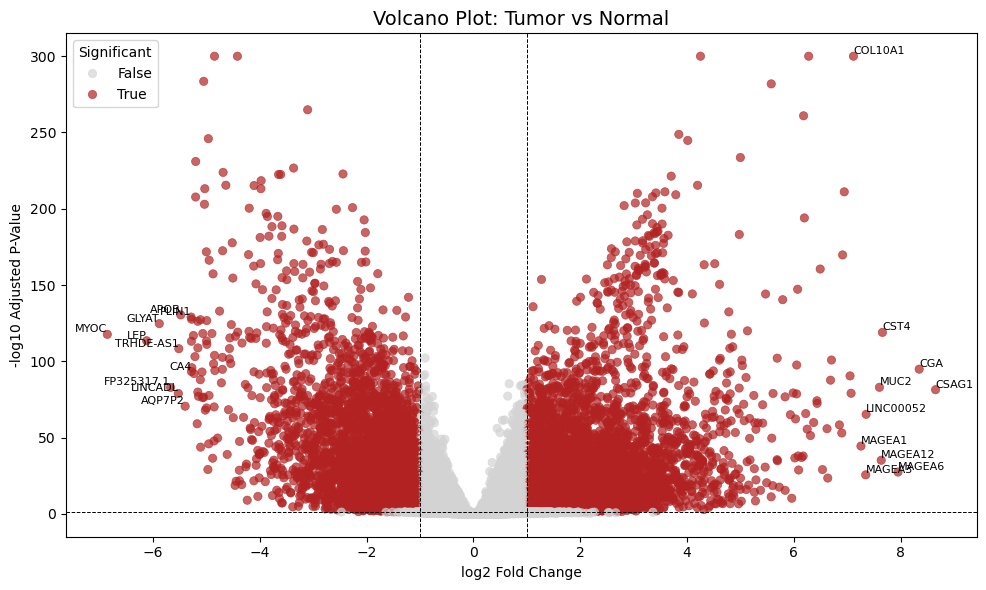

In [89]:
# Plot volcano plots
plot_volcano(res_df_sample, title="Volcano Plot: Tumor vs Normal")

Key Features of the Volcano Plot:
1. Log2 Fold Change (x-axis): This shows the magnitude of change in gene expression between tumor and normal tissues.
    - A positive log2 fold change (on the right side of the plot) indicates upregulation of the gene in tumor samples compared to normal samples.
    - A negative log2 fold change (on the left side of the plot) indicates downregulation in the tumor samples.

2. -log10 Adjusted P-value (y-axis): This represents the statistical significance of the observed gene expression changes.
    - The higher the value, the more significant the difference in gene expression. Points higher on the y-axis represent genes with stronger evidence of differential expression.

Comparison between tumor and normal tissue samples:

- *Genes on the Right (Upregulated in Tumor):* Examples from the right side include COL10A1, CST4, CGA, MUC2, and CSAG1. These genes are likely involved in tumor progression, and their upregulation could suggest a role in cancer development, such as involvement in metastasis, immune evasion, or growth signaling pathways. For example, COL10A1 (Collagen Type X Alpha 1) is often associated with tumor growth and tissue remodeling in various cancers.

- *Genes on the Left (Downregulated in Tumor):* Examples from the left side include APOD, MYOC, LEP, GLYAT, and AQP7P2. Downregulation of these genes might suggest they are protective or involved in processes such as tissue repair, apoptosis, or normal metabolic regulation. For instance, APOD (Apolipoprotein D) is involved in lipid metabolism and has been linked to neurodegenerative diseases, but its downregulation in cancer could indicate a disruption in normal cellular homeostasis.

*Key Takeaway:* The upregulated genes on the right (e.g., COL10A1, CST4) may be involved in processes like tissue invasion, angiogenesis, or immune modulation, while downregulated genes on the left (e.g., APOD, MYOC) could reflect a loss of function in key tumor-suppressive or metabolic pathways.

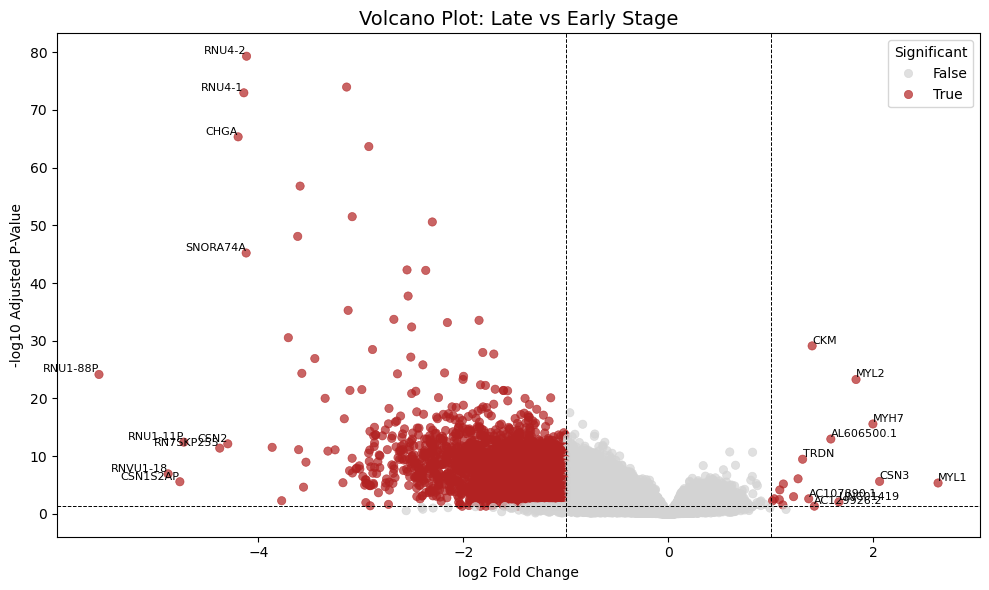

In [90]:
plot_volcano(res_df_stage, title="Volcano Plot: Late vs Early Stage")

Comparison between early-stage (stage 1 & 2) and late-stage (stage 3 & 4) cancers:

- *Genes on the Right (Upregulated in Tumor):* There are several genes significantly upregulated in late-stage cancer (e.g., CKM, MYL2, TRDN, CSN3, and MYL1), as indicated by the right side of the plot. These genes are involved in muscle contraction, metabolism, and cellular functions. For instance, CKM (Creatine Kinase, Muscle) is involved in energy metabolism in muscle tissues and its upregulation might suggest increased energy demands in late-stage cancer cells, possibly reflecting enhanced glycolysis or altered metabolic processes associated with tumor progression.

- *Genes on the Left (Downregulated in Tumor):* On the left side, several genes are downregulated in late-stage cancer (e.g., RNU4-2, RNU4-1, SNORA74A, and RNU1-88P), which may suggest a loss of certain regulatory functions during cancer progression. These genes are primarily non-coding RNAs or involved in RNA processing. For example, RNU4-2 (a small nucleolar RNA) and SNORA74A are involved in RNA modification and processing, which might be downregulated in late-stage cancers due to dysregulation in the cell’s RNA machinery or loss of normal cellular regulation. The downregulation of these genes could reflect a shift in cellular activity as the cancer progresses, possibly disrupting normal cellular maintenance and regulatory functions. Similarly, MYL2 (Myosin Light Chain 2) and MYL1 are involved in muscle cell contraction, which could indicate changes in the tumor microenvironment or metastasis-associated muscle activity.

*Key Takeaway:* The upregulation of muscle-related genes could be linked to changes in the tumor microenvironment or potential metastasis, where muscle tissue interaction may play a role in the spread of cancer. The downregulation of RNA-processing genes suggests a loss of normal cellular regulatory mechanisms in later stages of cancer, which might indicate a more aggressive or less controlled growth pattern.

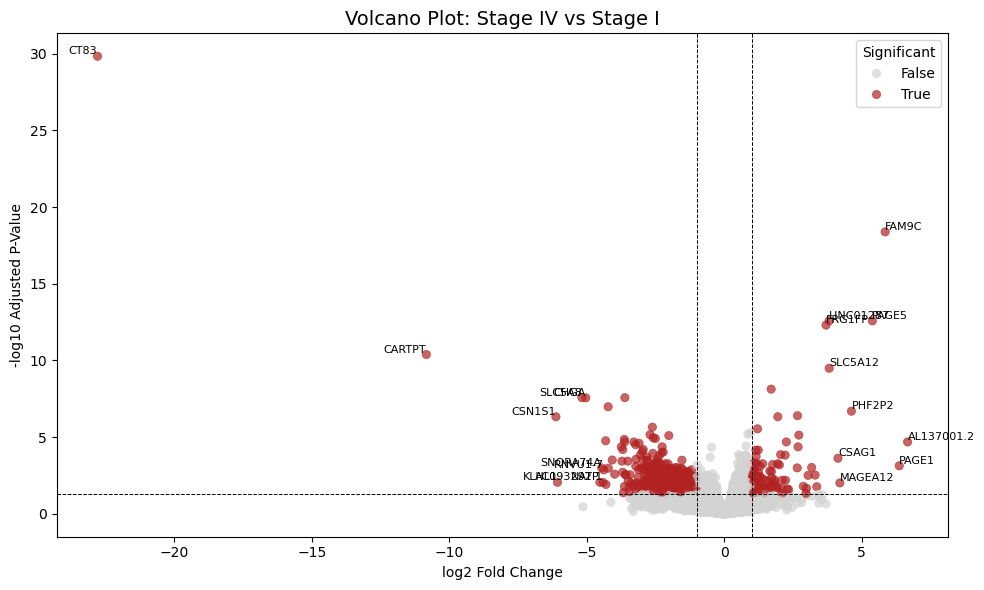

In [91]:
plot_volcano(res_df_stage_comp, title="Volcano Plot: Stage IV vs Stage I")

Comparison between Stage 1 and Stage 4 cancers:

- *Genes on the Right (Upregulated in Tumor):* The upregulated genes in stage 4, like MAGEA12 and PAGE1, are often associated with cancer progression, immune escape, or poor prognosis, which suggests their potential as biomarkers or therapeutic targets in late-stage cancer.

- *Genes on the Left (Downregulated in Tumor):* The downregulated genes in stage 4, like SLC5A12, could indicate the loss of functions important for cellular regulation, possibly contributing to cancer's ability to grow uncontrollably and evade normal cellular mechanisms.

*Key Takeaway:* The upregulation of cancer/testis antigens such as MAGEA12 and PAGE1 in stage 4 suggests that these genes may be involved in the immune evasion or metastasis of advanced cancers. The downregulation of genes like SLC5A12, which is involved in transport, suggests that transport and nutrient exchange mechanisms may be compromised in late-stage cancer, which could impact tumor cell survival or metabolism.

### Pattern Clustering and Boxplots <a id='pattern-clustering-and-boxplots'></a>

Plot DEGs with similar expression dynamics across group and visualizing patterns of gene regulation (e.g., up, down, transient).<br>
To mimic the functionality of the degPatterns() function from the DEGreport R package:<br>
-   We plot Top 20 DEGs on each group <br>
-	We selected the top 300 DEGs and computed gene-wise Z-scores across samples.<br>
-	Using KMeans clustering, genes were grouped based on their expression dynamics into interpretable "patterns".<br>
-	Each pattern was visualized using facet boxplots, where scaled expression values were compared across groups (e.g., Tumor vs Normal).<br>
-	We also overlaid gene-level dots (stripplots) to highlight individual gene distributions.<br>

*Interpretation*:

The dot plot shows that many of the genes have a clear separation between tumor and normal samples, especially in terms of their normalized counts. This indicates that these genes are likely to be significant markers for differential expression between the two groups. The genes where the dots overlap or where there is little difference between tumor and normal expression (those near the x-axis baseline) may not be strongly differentially expressed, and their differential expression could be considered non-significant or subtle.

 - Genes with higher expression in tumors (more blue dots higher up on the y-axis) suggest upregulation in tumor samples. For example, genes like MMP11 and NEK2 seem to have higher normalized counts in tumor samples, indicating that they are likely upregulated in tumors compared to normal tissue.

 - Genes with higher expression in normal tissues (more orange dots higher up on the y-axis) suggest downregulation in tumor samples. For example, GPAM and FHL1 are expressed at higher levels in normal samples, indicating these genes are downregulated in tumors.


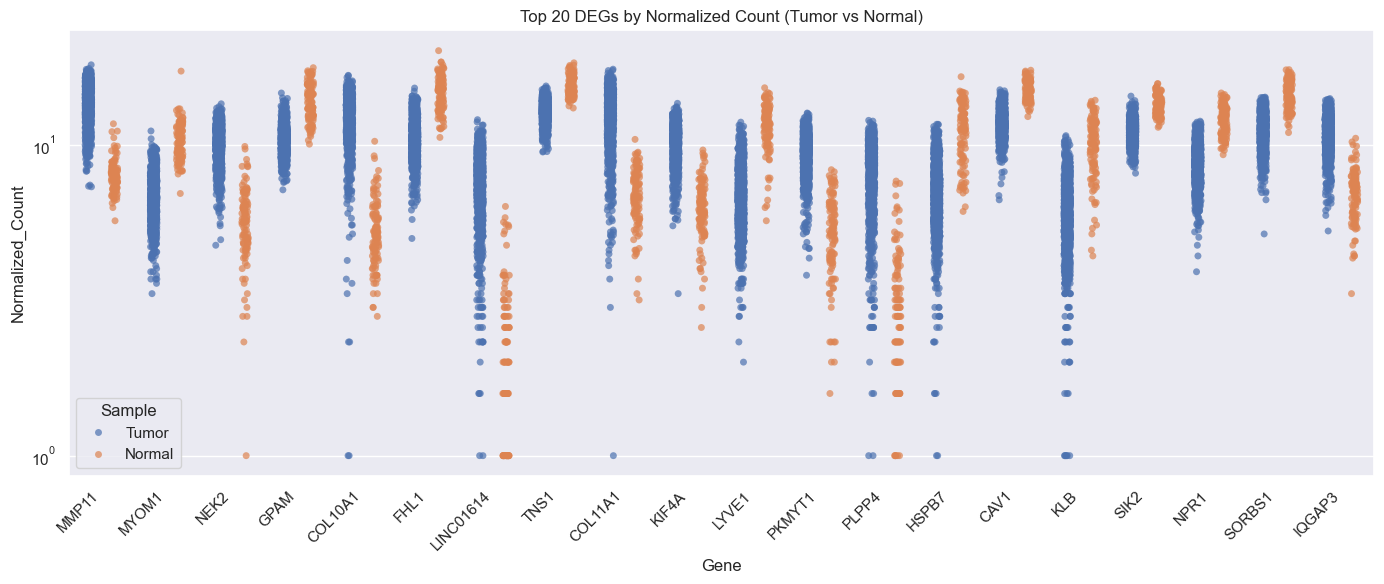

In [92]:
## Top 20 DEGs by lowest padj (Tumor vs Normal)

# 1. Top genes
top_genes = deg_df_sample.sort_values("padj").head(20).index.tolist()

# 2. Subset VST counts
subset_vst = assay_df_vst.loc[top_genes]

# 3. Melt for plotting
df_long = subset_vst.T.reset_index().melt(id_vars='samples_submitter_id', var_name='Gene', value_name='Normalized_Count')
df_long = df_long.merge(metadata_df[['Sample']], left_on='samples_submitter_id', right_index=True)

# Set the style and palette
sns.set(style="darkgrid") 

# 4. Plot
plt.figure(figsize=(14, 6))
sns.stripplot(
    data=df_long,
    x='Gene', y='Normalized_Count',
    hue='Sample', dodge=True,
    alpha=0.7, jitter=True
)
plt.yscale('log')  # Optional, shows wide range of counts
plt.title("Top 20 DEGs by Normalized Count (Tumor vs Normal)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sample')
plt.tight_layout()
plt.show()

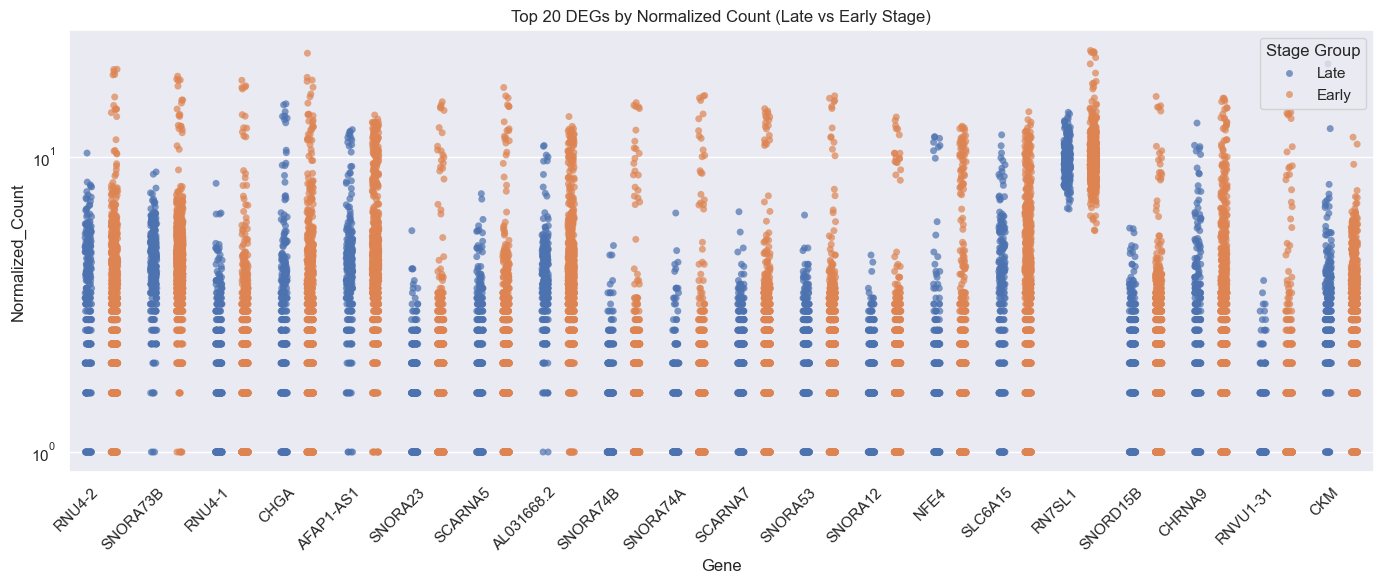

In [93]:
# Top 20 DEGs (Late vs Early Stage)
top_genes_stage = deg_df_stage.sort_values("padj").head(20).index.tolist()
subset_vst_stage = assay_df_vst.loc[top_genes_stage]

df_long_stage = subset_vst_stage.T.reset_index().melt(id_vars='samples_submitter_id', var_name='Gene', value_name='Normalized_Count')
df_long_stage = df_long_stage.merge(metadata_df[['Stage_group']], left_on='samples_submitter_id', right_index=True)

# Plot
plt.figure(figsize=(14, 6))
sns.stripplot(
    data=df_long_stage,
    x='Gene', y='Normalized_Count',
    hue='Stage_group', dodge=True,
    alpha=0.7, jitter=True
)
plt.yscale('log')
plt.title("Top 20 DEGs by Normalized Count (Late vs Early Stage)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stage Group')
plt.tight_layout()
plt.show()


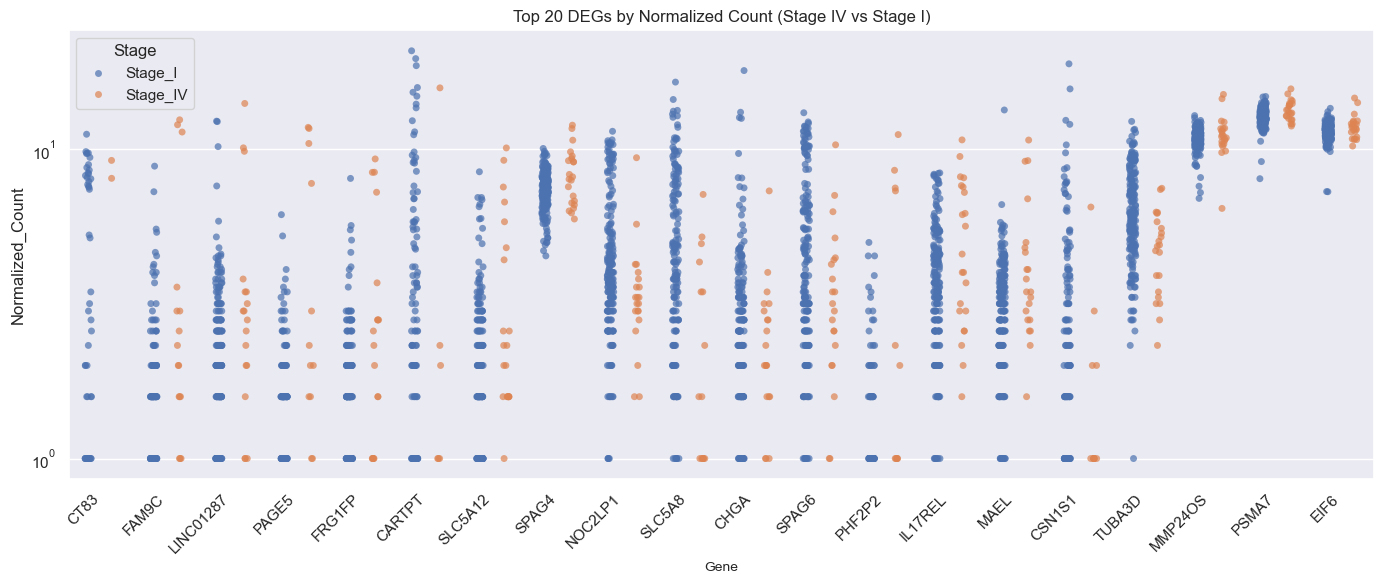

In [94]:
## Top 20 DEGs by lowest padj (Stage IV vs Stage I)

# 1. Top genes by adjusted p-value
top_genes = res_df_stage_comp.sort_values("padj").head(20).index.tolist()

# 2. Subset the VST-normalized expression matrix
subset_vst = assay_df_vst.loc[top_genes]

# 3. Melt for long format
df_long = subset_vst.T.reset_index().melt(
    id_vars='samples_submitter_id',
    var_name='Gene',
    value_name='Normalized_Count'
)

# 4. Merge with filtered metadata (Stage I vs IV only)
df_long = df_long.merge(metadata_stage_compare[['Stage_Compare']],  # created in earlier step
                        left_on='samples_submitter_id',
                        right_index=True)

# Set the style and palette
sns.set(style="darkgrid") 

# 5. Plot
plt.figure(figsize=(14, 6))
sns.stripplot(
    data=df_long,
    x='Gene',
    y='Normalized_Count',
    hue='Stage_Compare',
    #palette='deep',
    dodge=True,
    jitter=True,
    alpha=0.7
)
plt.yscale('log')  # Optional
plt.title("Top 20 DEGs by Normalized Count (Stage IV vs Stage I)")
plt.xlabel("Gene", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


Boxplots of DEGs analysis and possible pattern using KMeans

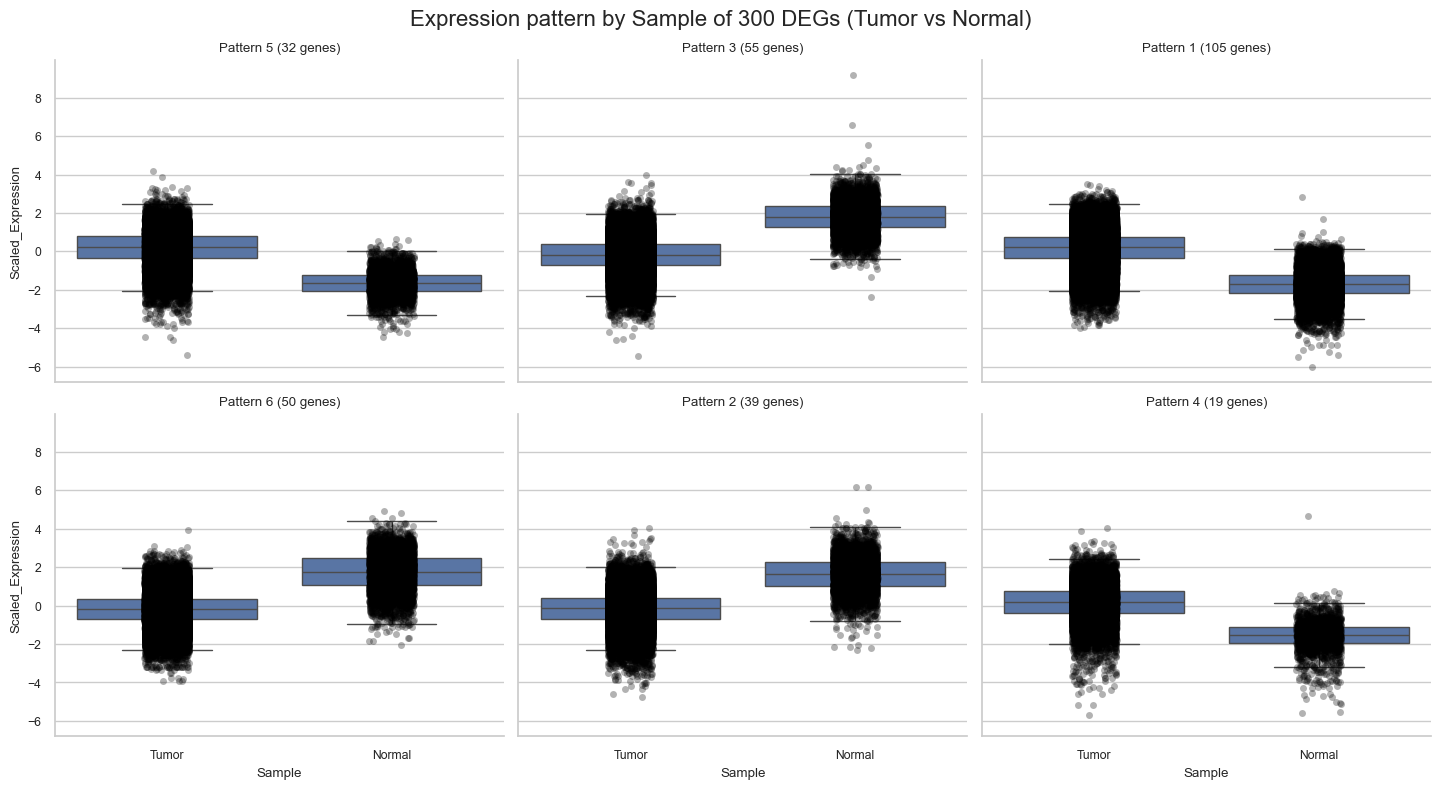

In [95]:
from sklearn.cluster import KMeans

# 1. Select top N DEGs
top_n = 300
top_genes = deg_df_sample.sort_values("padj").head(top_n).index
vst_subset = assay_df_vst.loc[top_genes]

# 2. Z-score per gene (row-wise standardization)
vst_scaled = vst_subset.sub(vst_subset.mean(axis=1), axis=0)
vst_scaled = vst_scaled.div(vst_subset.std(axis=1), axis=0)

# 3. KMeans clustering (grouping genes with similar patterns)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
vst_scaled['Cluster'] = kmeans.fit_predict(vst_scaled)

# 4. Melt the dataframe for seaborn plotting
vst_long = vst_scaled.drop(columns='Cluster')
vst_long = vst_long.reset_index().rename(columns={'index': 'gene_name'})
vst_long = vst_long.melt(id_vars='gene_name', var_name='Sample_ID', value_name='Scaled_Expression')

# 5. Map sample groups
vst_long = vst_long.merge(
    metadata_df[['Sample', 'Stage_group']],
    left_on='Sample_ID',
    right_index=True
)

# 6. Add cluster group
cluster_map = vst_scaled['Cluster'].to_dict()
vst_long['Cluster'] = vst_long['gene_name'].map(cluster_map)

# 7. Add gene count per cluster to titles
cluster_counts = vst_long.groupby('Cluster')['gene_name'].nunique().to_dict()
vst_long['Cluster_Label'] = vst_long['Cluster'].map(lambda c: f"Pattern {c+1} ({cluster_counts.get(c,0)} genes)")

# Set style
sns.set(style="whitegrid", font_scale=0.8)

# 1. Draw the base boxplot FacetGrid
g = sns.catplot(
    data=vst_long,
    x='Sample', y='Scaled_Expression',
    col='Cluster_Label',
    kind='box',
    col_wrap=3,
    height=4, aspect=1.2,
    sharey=True,
    showfliers=False
)

# 2. Overlay stripplots (dots) per facet
for ax, cluster_label in zip(g.axes.flatten(), vst_long['Cluster_Label'].unique()):
    # Filter subset of data for this facet
    subset = vst_long[vst_long['Cluster_Label'] == cluster_label]
    
    # Plot gene expression dots
    sns.stripplot(
        data=subset,
        x='Sample',
        y='Scaled_Expression',
        dodge=True,
        jitter=True,
        color='black',
        alpha=0.3,
        ax=ax
    )

# 3. Final formatting
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(f"Expression pattern by Sample of {top_n} DEGs (Tumor vs Normal)", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

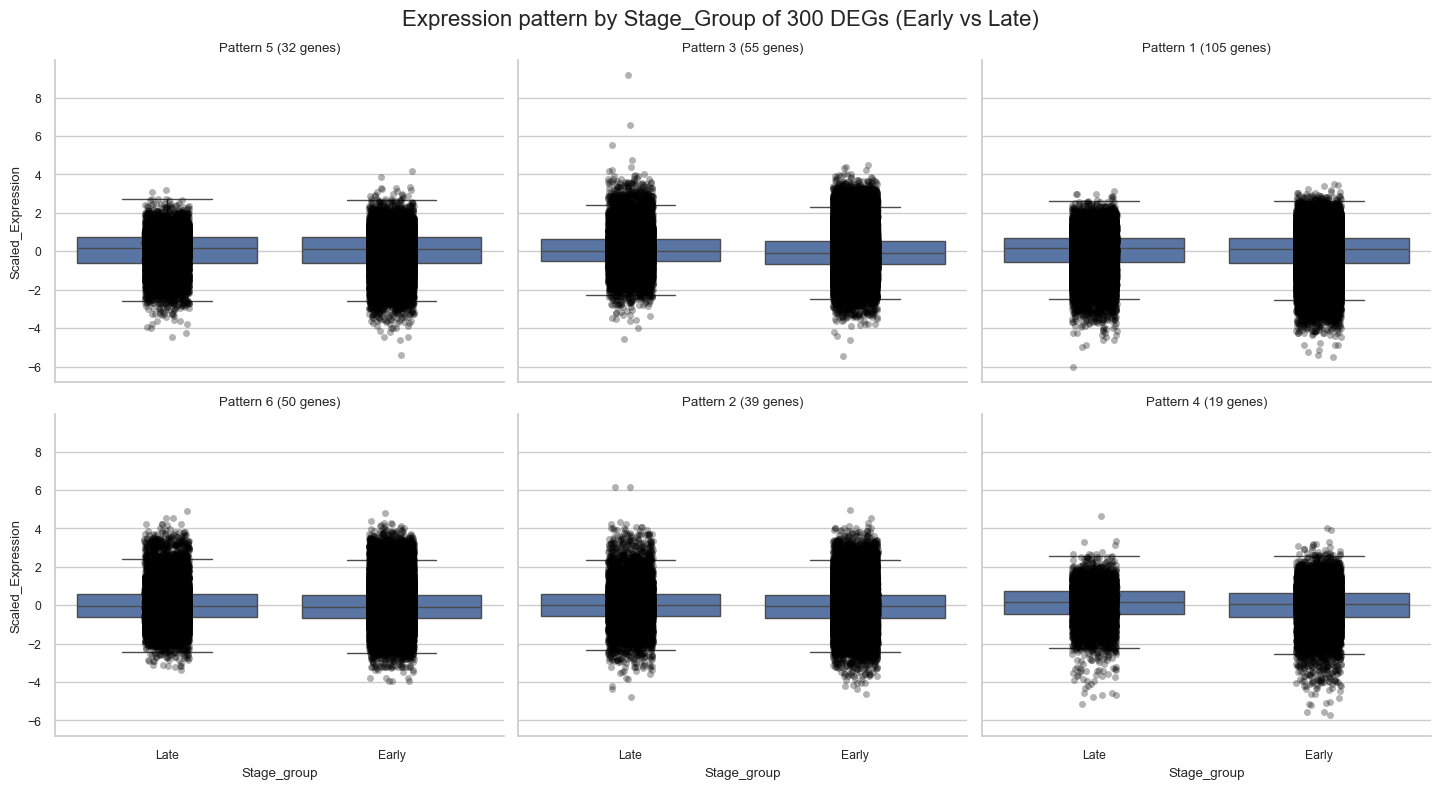

In [96]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid", font_scale=0.8)

g = sns.catplot(
    data=vst_long,
    x='Stage_group',
    y='Scaled_Expression',
    col='Cluster_Label',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True,
    showfliers=False
)

for ax, cluster_label in zip(g.axes.flatten(), vst_long['Cluster_Label'].unique()):
    subset = vst_long[vst_long['Cluster_Label'] == cluster_label]
    sns.stripplot(
        data=subset,
        x='Stage_group',
        y='Scaled_Expression',
        color='black',
        alpha=0.3,
        dodge=True,
        jitter=True,
        ax=ax
    )

g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(f"Expression pattern by Stage_Group of {top_n} DEGs (Early vs Late)", fontsize=16)
plt.tight_layout()
plt.show()


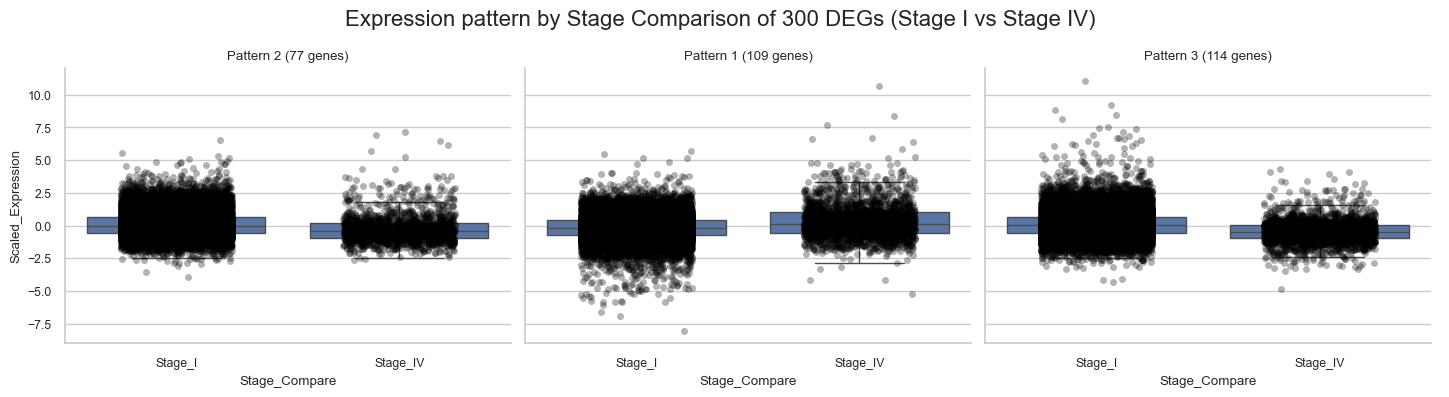

In [97]:
# 1. Select top N DEGs based on Stage comparison
top_n = 300
top_genes = res_df_stage_comp.sort_values("padj").head(top_n).index
vst_subset = assay_df_vst.loc[top_genes]  # filtered VST counts

# 2. Z-score per gene (row-wise standardization)
vst_scaled = vst_subset.sub(vst_subset.mean(axis=1), axis=0)
vst_scaled = vst_scaled.div(vst_subset.std(axis=1), axis=0)

# 3. KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
vst_scaled['Cluster'] = kmeans.fit_predict(vst_scaled)

# 4. Melt for seaborn
vst_long = vst_scaled.drop(columns='Cluster')
vst_long = vst_long.reset_index().rename(columns={'index': 'gene_name'})
vst_long = vst_long.melt(id_vars='gene_name', var_name='Sample_ID', value_name='Scaled_Expression')

# 5. Add Stage_Compare info
vst_long = vst_long.merge(metadata_stage_compare[['Stage_Compare']], left_on='Sample_ID', right_index=True)

# 6. Map cluster labels
cluster_map = vst_scaled['Cluster'].to_dict()
vst_long['Cluster'] = vst_long['gene_name'].map(cluster_map)

# 7. Label clusters with gene count
cluster_counts = vst_long.groupby('Cluster')['gene_name'].nunique()
vst_long['Cluster_Label'] = vst_long['Cluster'].map(lambda c: f"Pattern {c+1} ({cluster_counts[c]} genes)")

# 8. Plot boxplots per cluster
g = sns.catplot(
    data=vst_long,
    x='Stage_Compare', y='Scaled_Expression',
    col='Cluster_Label',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1.2,
    showfliers=False
)

# Add dots (stripplot) per box
for ax, label in zip(g.axes.flatten(), vst_long['Cluster_Label'].unique()):
    sub = vst_long[vst_long['Cluster_Label'] == label]
    sns.stripplot(
        data=sub,
        x='Stage_Compare', y='Scaled_Expression',
        color='black', alpha=0.3, jitter=0.25, dodge=True, ax=ax
    )

g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(f"Expression pattern by Stage Comparison of {top_n} DEGs (Stage I vs Stage IV)", fontsize=16)
plt.tight_layout()
plt.show()

### Heatmaps <a id='heatmaps'></a>

Expression heatmaps were generated using seaborn.clustermap() for the top 20 DEGs in each clinical group.<br>
-	We performed Z-score normalization per gene to emphasize relative expression changes across samples.<br>
-	Heatmaps were annotated with metadata (e.g., Group, Stage_group), and clustering was applied either to genes only or to both axes.<br>
-	These visualizations revealed distinct expression clusters in Tumor vs Normal samples, while Stage and Stage_Compare (Stage IV vs Stage I) comparisons showed more subtle distinctions.

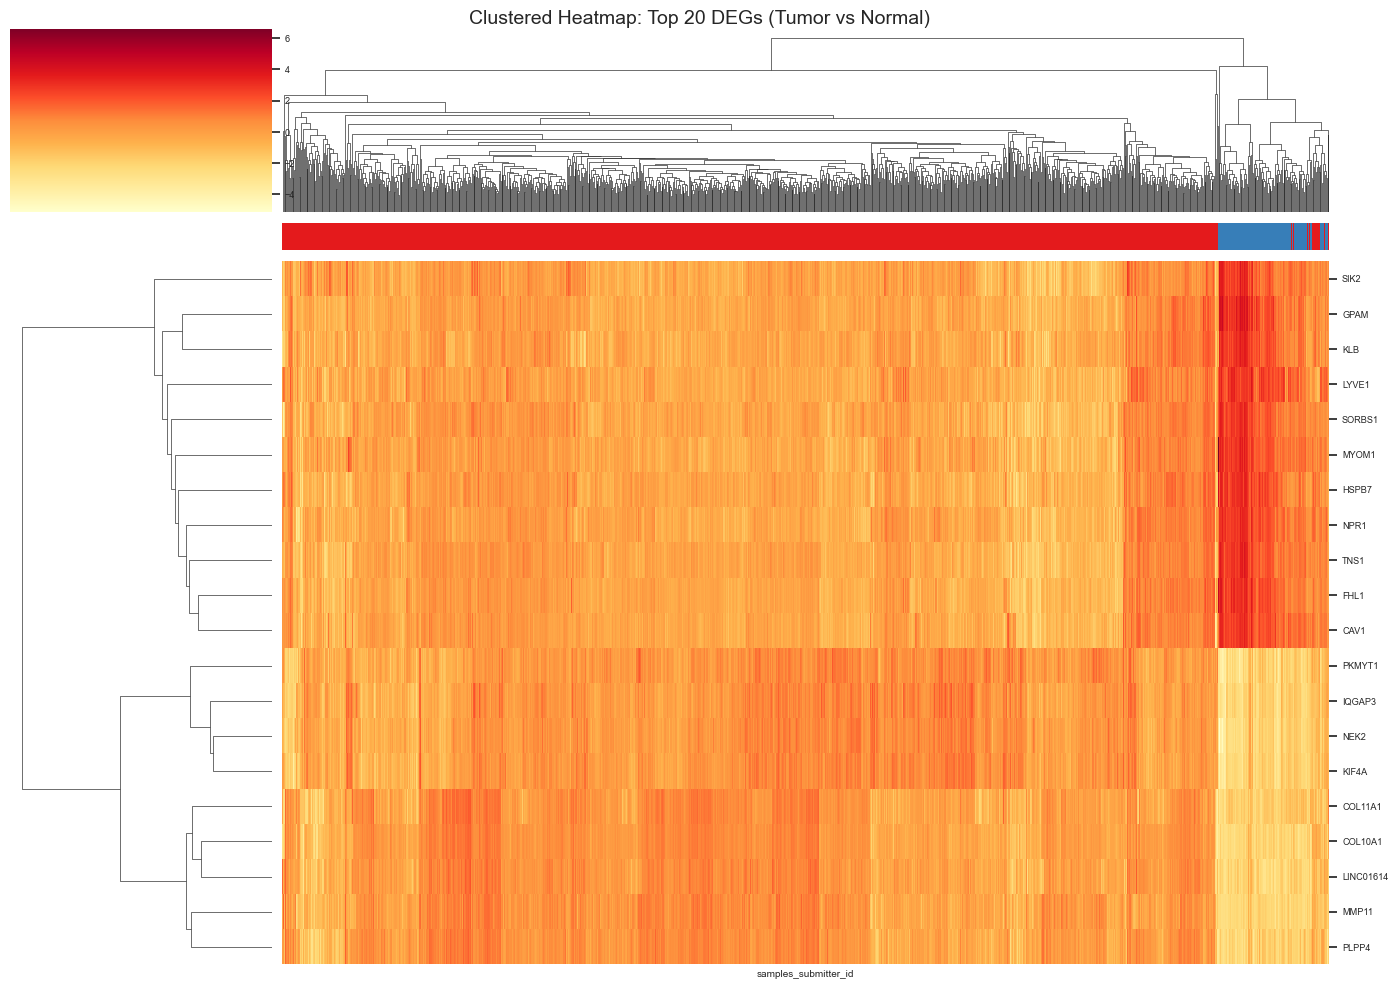

In [98]:
# 1. Select Top N DEGs (for example from deg_df_group)
top_genes = deg_df_sample.sort_values("padj").head(20).index
subset = assay_df_vst.loc[top_genes]

# 2. Z-score normalize across genes (row-wise)
subset_z = pd.DataFrame(
    zscore(subset, axis=1, nan_policy='omit'),
    index=subset.index,
    columns=subset.columns
)

# 3. Map annotation color (e.g., Group: Tumor vs Normal)
sample_colors = metadata_df.loc[subset.columns, 'Sample'].map({
    'Tumor': '#e41a1c',      
    'Normal': '#377eb8'      
}).to_numpy()  

# 4. Plot
sns.set(font_scale=0.6)
g = sns.clustermap(
    subset_z,
    cmap="YlOrRd",
    col_colors=sample_colors,
    xticklabels=False,
    yticklabels=True,
    figsize=(14, 10),
    row_cluster=True,
    col_cluster=True
)
g.fig.suptitle("Clustered Heatmap: Top 20 DEGs (Tumor vs Normal)", fontsize=14)
plt.tight_layout()
plt.show()


*Interpretation*:

The heatmap clearly shows distinct gene expression profiles between tumor and normal tissues. Tumor samples cluster together and exhibit coordinated overexpression (e.g., MMP11, COL10A1), while many normal samples show lower expression for these genes. This validates the significance of the top 20 DEGs and supports their potential roles in tumor biology or diagnostics.

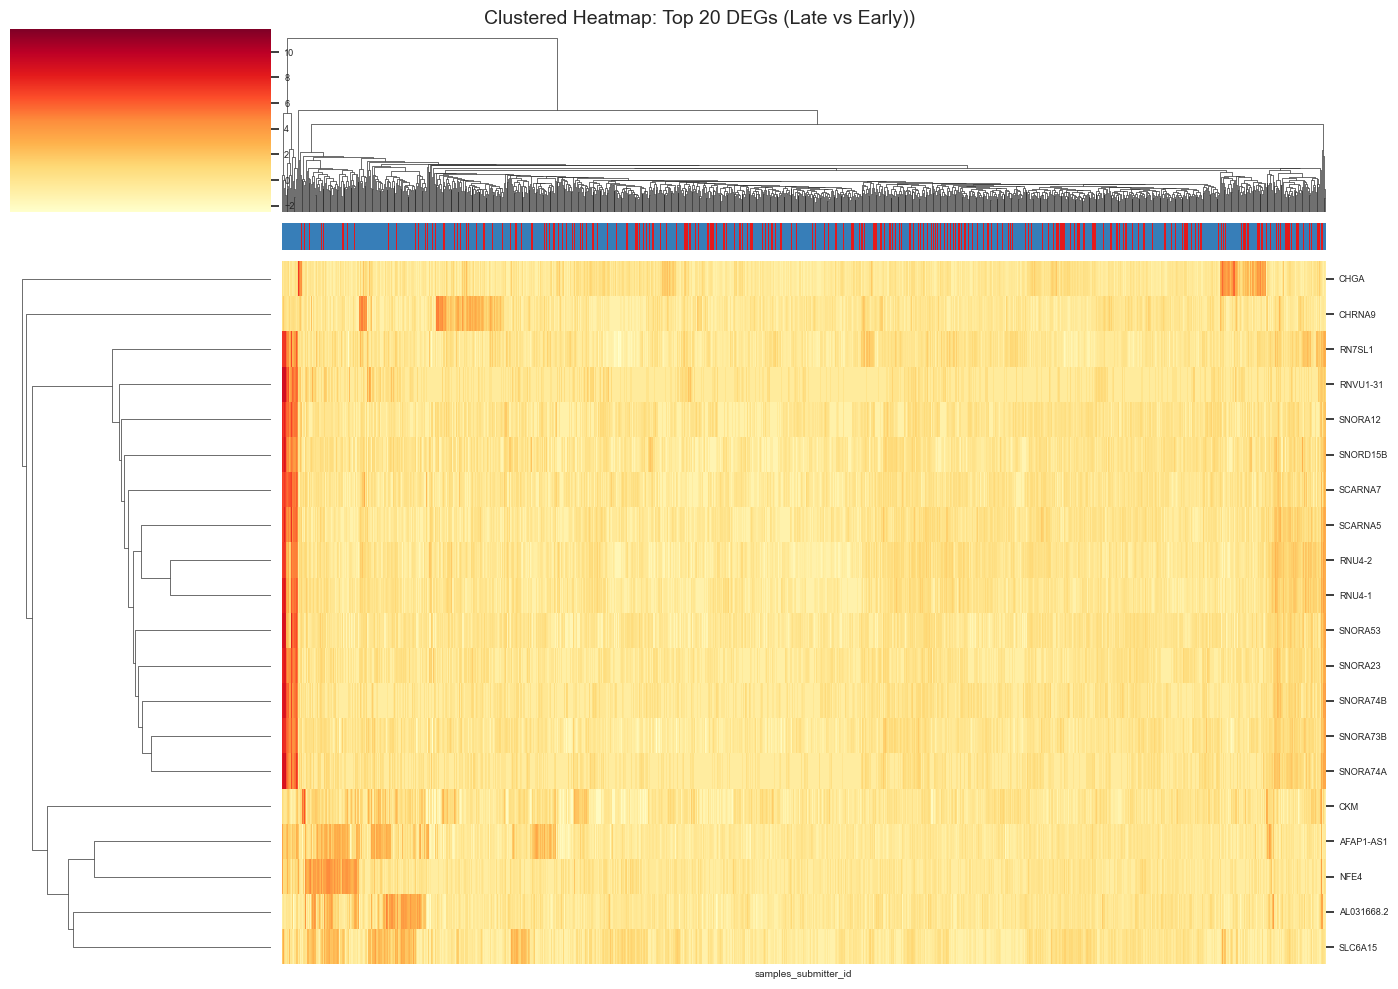

In [99]:
# 1. Select Top N DEGs (for example from deg_df_group)
top_genes_stage = deg_df_stage.sort_values("padj").head(20).index
subset = assay_df_vst.loc[top_genes_stage]

# 2. Z-score normalize across genes (row-wise)
subset_z = pd.DataFrame(
    zscore(subset, axis=1, nan_policy='omit'),
    index=subset.index,
    columns=subset.columns
)

# 3. Map annotation color (e.g., Group: Tumor vs Normal)
sample_colors = metadata_df.loc[subset.columns, 'Stage_group'].map({
    'Late': '#e41a1c',      # red
    'Early': '#377eb8'      # blue
}).to_numpy()  # ensure it's aligned and not indexed

# 4. Plot
sns.set(font_scale=0.6)
g = sns.clustermap(
    subset_z,
    cmap="YlOrRd",
    col_colors=sample_colors,
    xticklabels=False,
    yticklabels=True,
    figsize=(14, 10),
    row_cluster=True,
    col_cluster=True
)
g.fig.suptitle("Clustered Heatmap: Top 20 DEGs (Late vs Early))", fontsize=14)
plt.tight_layout()
plt.show()

*Interpretation:*<br>
The intensity of yellow to red reflects higher expression levels. Several genes—such as **CHGA, CHRNA9, and SNORA12**—appear to show differential expression patterns across the two groups, though the differences are subtle and not strongly clustered.<br>
Late and Early stages are not markedly distinct at a global level. This could indicate a gradual or heterogeneous transition in gene expression rather than a sharp molecular divergence between stages.

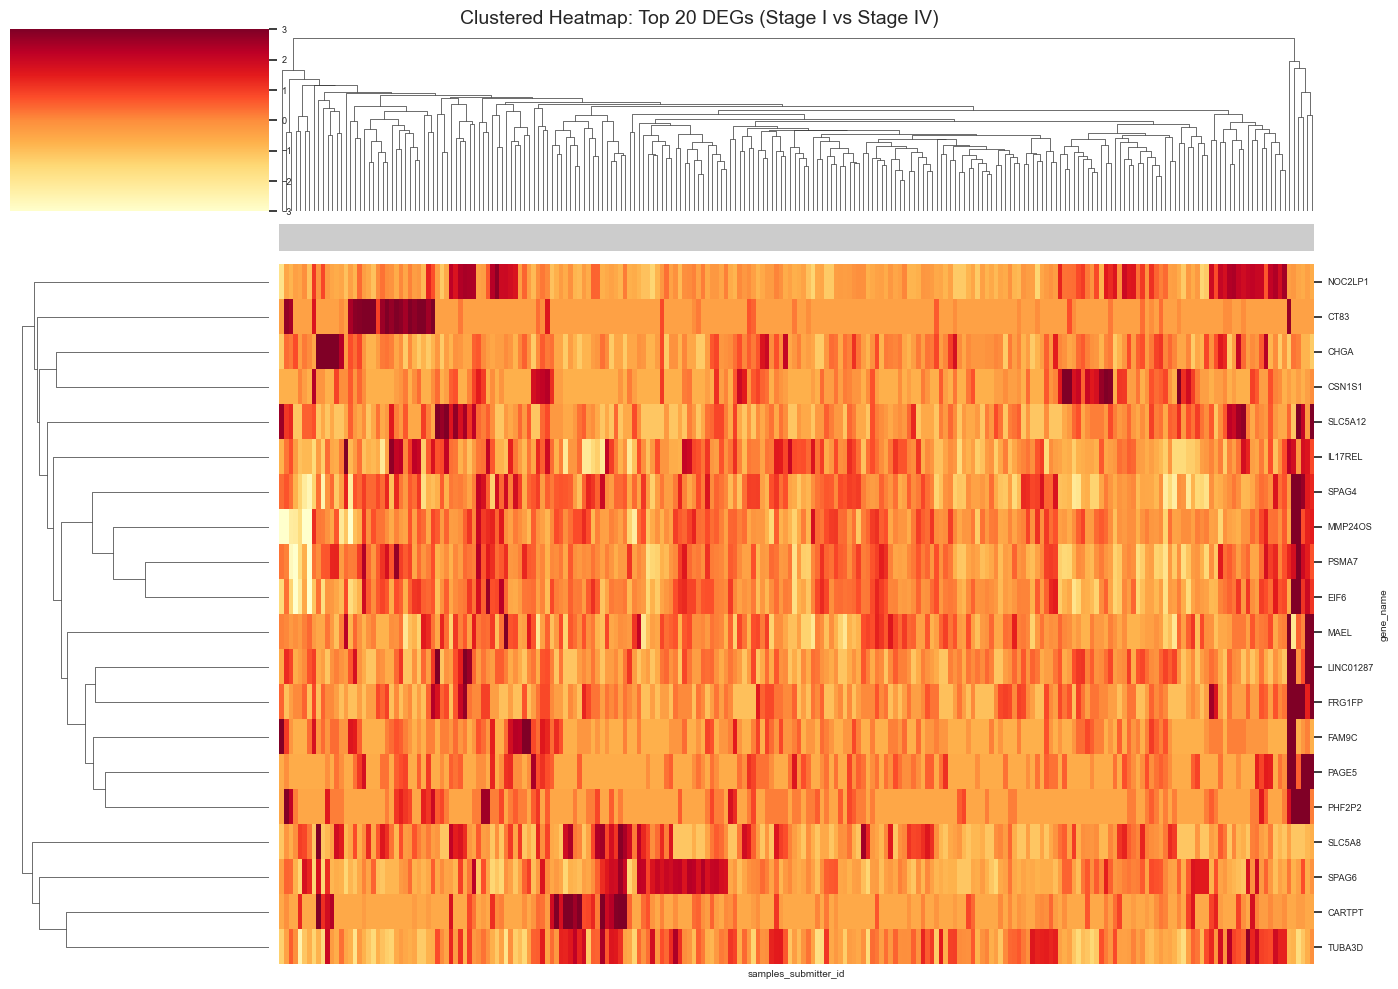

In [100]:
# 1. Select top 20 DEGs based on padj
top_genes = res_df_stage_comp.sort_values("padj").head(20).index
subset = assay_df_vst.loc[top_genes]

# 2. Intersect only valid samples
valid_samples = subset.columns.intersection(metadata_stage_compare.index)
subset = subset[valid_samples]

# 3. Z-score normalize (row-wise)
subset_clean = subset.apply(pd.to_numeric, errors='coerce').dropna(how='any')
subset_z = subset_clean.apply(lambda row: zscore(row, nan_policy='omit'), axis=1)
subset_z = pd.DataFrame(subset_z.tolist(), index=subset_clean.index, columns=subset_clean.columns)
subset_z = subset_z.clip(-3, 3)

# 🛠️ 4. Map annotation color with NaN-safe mapping
color_map = {
    'Stage I': '#377eb8',   # blue
    'Stage IV': '#e41a1c'   # red
}
stage_labels = metadata_stage_compare.loc[subset_z.columns, 'Stage_Compare'].fillna('Unknown')
sample_colors = stage_labels.map(color_map).fillna('#cccccc').to_numpy()  # gray fallback for unknowns

# 5. Plot heatmap
sns.set(font_scale=0.6)
g = sns.clustermap(
    subset_z,
    cmap="YlOrRd",
    col_colors=sample_colors,
    xticklabels=False,
    yticklabels=True,
    figsize=(14, 10),
    row_cluster=True,  # set to False if you don't want clustering
    col_cluster=True
)
g.fig.suptitle("Clustered Heatmap: Top 20 DEGs (Stage I vs Stage IV)", fontsize=14)
plt.tight_layout()
plt.show()

*Interpretation:*<br>
This heatmap visualizes the top 20 differentially expressed genes (DEGs) between Stage I and Stage IV tumor samples. The clear gene-wise clustering and variation in expression intensity suggest meaningful biological differences between stages. However, due to the imbalance in sample distribution (many more Stage I than Stage IV), the heatmap is visually dominated by Stage I expression patterns, which may reduce the clarity of separation. <br>
Nonetheless, several genes show distinct expression differences across subsets of samples, suggesting potential biomarkers for tumor progression from early to advanced stage.

# DIMENSIONALITY REDUCTION

## Dimensionality Reduction via PCA (Visualization) <a id='dimensionality-reduction-via-pca-visualization'></a>

We applied Principal Component Analysis (PCA) on VST-transformed data to explore sample-level variation and global expression patterns:<br>
-	PCA was performed using both top 50 DEGs and all genes as input features.<br>
-	We found that PCA using top DEGs improved group separation (e.g., Tumor vs Normal) due to the reduction of noise from non-informative genes.<br>
-	Plots were labeled by clinical group (Group, Stage_group, Stage_Compare), and the axes were annotated with explained variance percentages.<br>
-	We also tested PCA with automatic dimensionality reduction (e.g., n_components=0.80) to retain components explaining 80% of the variance.<br>


Initial PCA using all genes in assay_df_vst in (Tumor vs Normal)

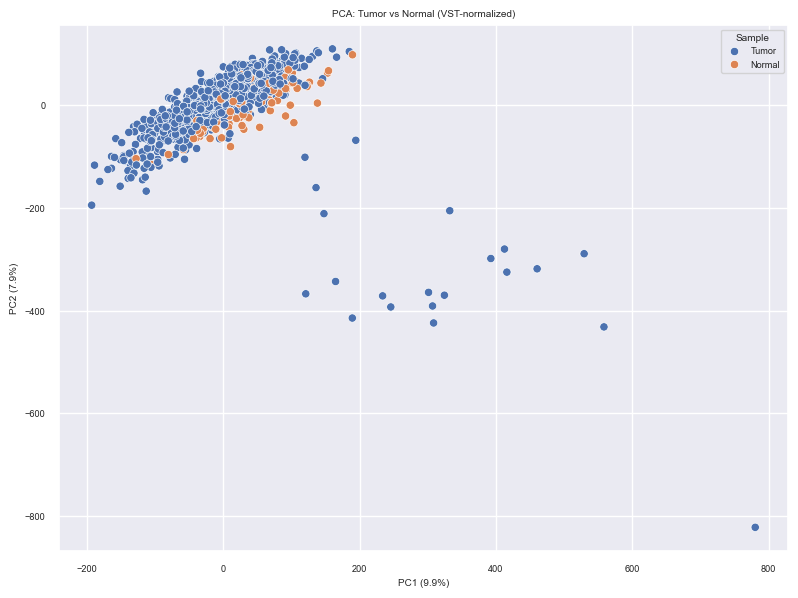

In [101]:
from sklearn.preprocessing import StandardScaler

# 1. Subset using top DEGs from deg_df_group
X_group = assay_df_vst.T  # Transpose to samples × genes

# 2. Standardize (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. PCA: retain enough components to explain 80% of variance
pca = PCA(n_components=0.80)
pcs = pca.fit_transform(X_scaled)

# 4. Create DataFrame with first 2 PCs for plotting
pc_df = pd.DataFrame(pcs[:, :2], columns=["PC1", "PC2"], index=X_group.index)
pc_df = pc_df.join(metadata_df[["Sample"]])

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="Sample")
plt.title("PCA: Tumor vs Normal (VST-normalized)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Sample")
plt.tight_layout()
plt.show()


Create PCA using only Top 50 significant gene from DEGs in (Tumor vs Normal)

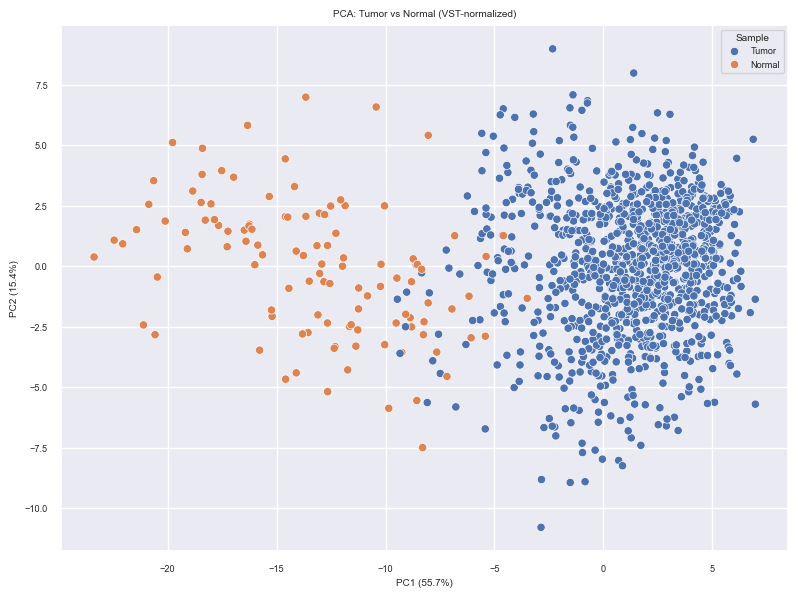

PC1 explains: 55.70%
PC2 explains: 15.42%
Total variance explained by PC1 & PC2: 71.12%


In [102]:
# 1. Subset using top DEGs from deg_df_group
top_genes_group = deg_df_sample.sort_values("padj").head(50).index
X_group = assay_df_vst.loc[top_genes_group].T  # samples × genes

# 2. Standardize (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. PCA: retain enough components to explain 80% of variance
pca = PCA(n_components=0.80)
pcs = pca.fit_transform(X_scaled)

# 4. Create DataFrame with first 2 PCs for plotting
pc_df = pd.DataFrame(pcs[:, :2], columns=["PC1", "PC2"], index=X_group.index)
pc_df = pc_df.join(metadata_df[["Sample"]])

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="Sample")
plt.title("PCA: Tumor vs Normal (VST-normalized)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Sample")
plt.tight_layout()
plt.show()

# Explained variance per component
var_ratio = pca.explained_variance_ratio_

# Total variance explained
total_var = var_ratio.sum()

print(f"PC1 explains: {var_ratio[0]*100:.2f}%")
print(f"PC2 explains: {var_ratio[1]*100:.2f}%")
print(f"Total variance explained by PC1 & PC2: {(var_ratio[0] + var_ratio[1]) * 100:.2f}%")

*Interpretation :*<br>

- *PCA with All Genes:* The variance explained by PC1 and PC2 is low (10.3% and 7.6%), and the samples (tumor and normal) do not show a clear separation. This suggests that the full set of genes includes many irrelevant or noisy genes, making it difficult to distinguish between tumor and normal tissue.

- *PCA with Top 50 DEGs:* Focusing on the top 50 DEGs improves the variance explained by the first two components (PC1 = 53.7%, PC2 = 15.5%) and results in a clear separation between tumor and normal samples. This indicates that selecting DEGs significantly enhances the ability to differentiate the two groups and highlights the importance of using biologically relevant features for the analysis.

### PCA on Stage_group (Early vs Late)

PCA using all genes in assay_df_vst in (Early vs Late)

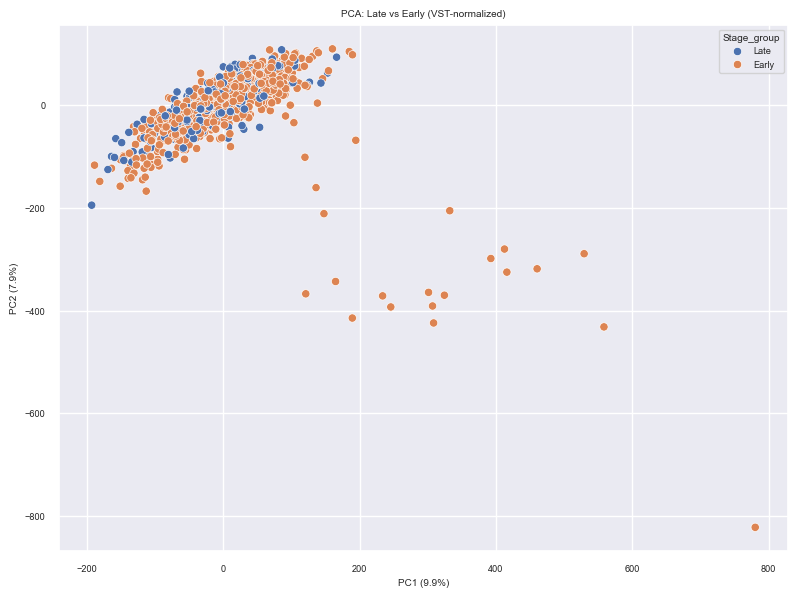

In [103]:
# 1. Subset using top DEGs from deg_df_group
X_group = assay_df_vst.T  # Transpose to samples × genes

# 2. Standardize (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. PCA: retain enough components to explain 80% of variance
pca = PCA(n_components=0.80)
pcs = pca.fit_transform(X_scaled)

# 4. Create DataFrame with first 2 PCs for plotting
pc_df = pd.DataFrame(pcs[:, :2], columns=["PC1", "PC2"], index=X_group.index)
pc_df = pc_df.join(metadata_df[["Stage_group"]])

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="Stage_group")
plt.title("PCA: Late vs Early (VST-normalized)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Stage_group")
plt.tight_layout()
plt.show()

Create PCA using only Top 50 significant gene from DEGs in (Early vs Late)

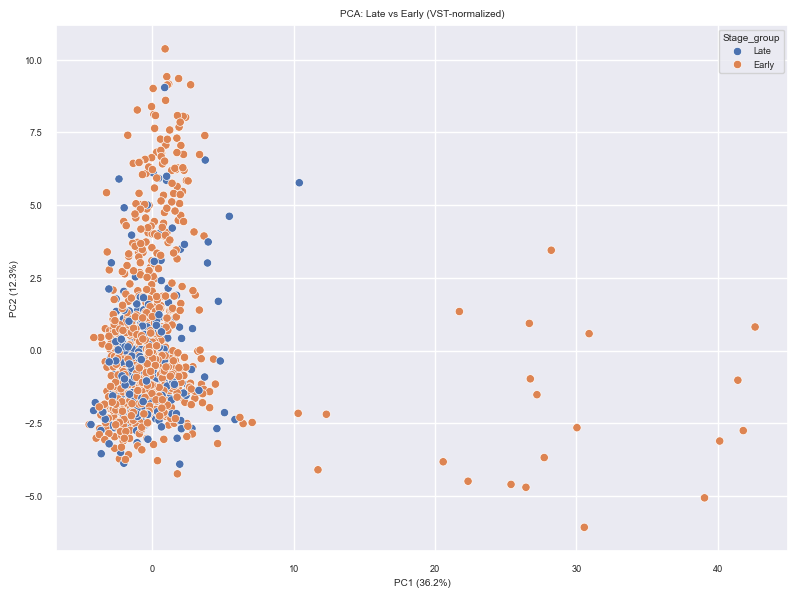

PC1 explains: 36.23%
PC2 explains: 12.32%
Total variance explained by PC1 & PC2: 48.55%


In [104]:
# 1. Subset using top DEGs from deg_df_group
top_genes_group = deg_df_stage.sort_values("padj").head(50).index
X_group = assay_df_vst.loc[top_genes_group].T  # samples × genes

# 2. Standardize (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. PCA: retain enough components to explain 80% of variance
pca = PCA(n_components=0.80)
pcs = pca.fit_transform(X_scaled)

# 4. Create DataFrame with first 2 PCs for plotting
pc_df = pd.DataFrame(pcs[:, :2], columns=["PC1", "PC2"], index=X_group.index)
pc_df = pc_df.join(metadata_df[["Stage_group"]])

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="Stage_group")
plt.title("PCA: Late vs Early (VST-normalized)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Stage_group")
plt.tight_layout()
plt.show()

# Explained variance per component
var_ratio = pca.explained_variance_ratio_

# Total variance explained
total_var = var_ratio.sum()

print(f"PC1 explains: {var_ratio[0]*100:.2f}%")
print(f"PC2 explains: {var_ratio[1]*100:.2f}%")
print(f"Total variance explained by PC1 & PC2: {(var_ratio[0] + var_ratio[1]) * 100:.2f}%")

*Interpretation:* (Early vs Late) <br>

- *PCA with All Genes:* The first two principal components (PC1 = 10.3%, PC2 = 7.6%) do not show clear separation between early and late-stage cancer samples. The overlap of the groups suggests that using all genes does not provide sufficient discriminatory power between the stages, likely due to the inclusion of irrelevant or noisy genes.

- *PCA with Top 50 DEGs:* While the variance explained by the first two components improves with the top 50 DEGs (PC1 = 27.0%, PC2 = 18.6%), there is still substantial overlap between early and late-stage cancer samples. This indicates that, although DEGs provide better separation than the full gene set, the gene expression differences between early and late cancer stages may not be strong or linear enough for clear classification in this reduced-dimensional space. Further analysis or additional features may be needed to enhance the ability to distinguish between the stages.

### PCA on Stage_Compare (Stage IV vs Stage I)

PCA using all genes in assay_df_vst for (Stage IV vs Stage I)

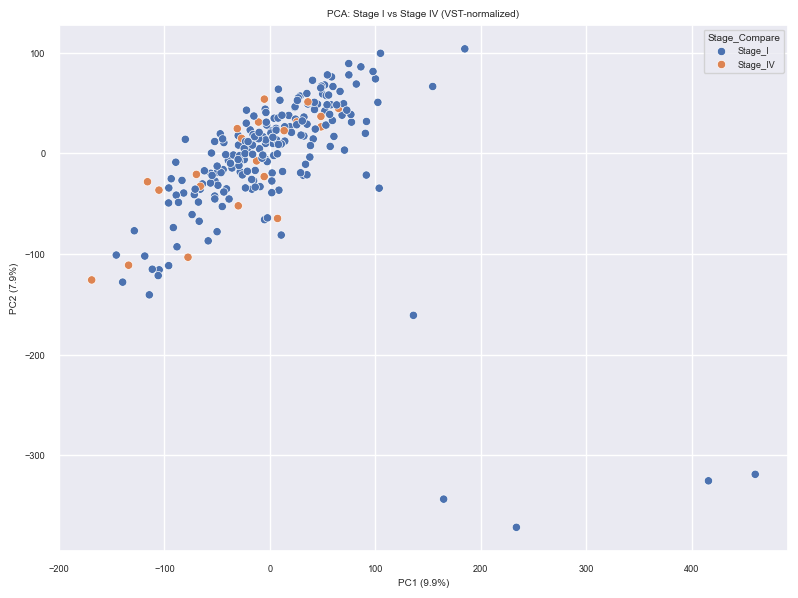

In [105]:
# 1. Subset using top DEGs from deg_df_group
X_group = assay_df_vst.T  # Transpose to samples × genes

# 2. Standardize (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. PCA: retain enough components to explain 80% of variance
pca = PCA(n_components=0.80)
pcs = pca.fit_transform(X_scaled)

# 4. Create DataFrame with first 2 PCs for plotting
pc_df = pd.DataFrame(pcs[:, :2], columns=["PC1", "PC2"], index=X_group.index)
pc_df = pc_df.join(metadata_stage_compare[["Stage_Compare"]])

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="Stage_Compare")
plt.title("PCA: Stage I vs Stage IV (VST-normalized)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Stage_Compare")
plt.tight_layout()
plt.show()

*Interpretation:* <br>
This PCA plot, using all gene expressions, shows that Stage I and Stage IV samples overlap significantly, with no distinct clustering pattern between the two stages.<br>
Since most samples are Stage I, the overall variance captured by PC1 (10.3%) and PC2 (7.6%) seems to represent general sample variation rather than stage-specific expression differences.

Create PCA using only Top 50 significant gene from DEGs in (Stage IV vs Stage I)

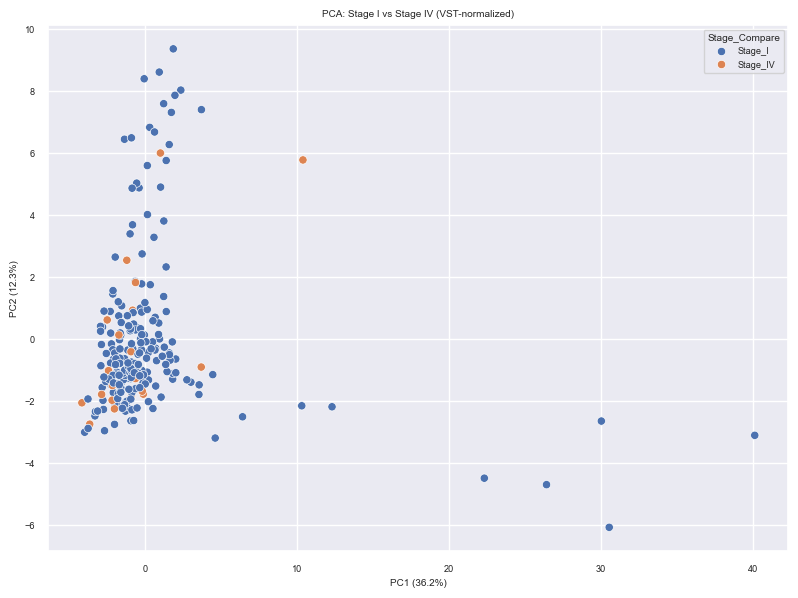

PC1 explains: 36.23%
PC2 explains: 12.32%
Total variance explained by PC1 & PC2: 48.55%


In [106]:
# 1. Subset using top DEGs from deg_df_group
top_genes_group = res_df_stage.sort_values("padj").head(50).index
X_group = assay_df_vst.loc[top_genes_group].T  # samples × genes

# 2. Standardize (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. PCA: retain enough components to explain 80% of variance
pca = PCA(n_components=0.80)
pcs = pca.fit_transform(X_scaled)

# 4. Create DataFrame with first 2 PCs for plotting
pc_df = pd.DataFrame(pcs[:, :2], columns=["PC1", "PC2"], index=X_group.index)
pc_df = pc_df.join(metadata_stage_compare[["Stage_Compare"]])

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pc_df, x="PC1", y="PC2", hue="Stage_Compare")
plt.title("PCA: Stage I vs Stage IV (VST-normalized)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title="Stage_Compare")
plt.tight_layout()
plt.show()

# Explained variance per component
var_ratio = pca.explained_variance_ratio_

# Total variance explained
total_var = var_ratio.sum()

print(f"PC1 explains: {var_ratio[0]*100:.2f}%")
print(f"PC2 explains: {var_ratio[1]*100:.2f}%")
print(f"Total variance explained by PC1 & PC2: {(var_ratio[0] + var_ratio[1]) * 100:.2f}%")

*Interpretation:* (Stage I vs IV)<br>

- Similar to the comparison between early-stage and late-stage cancer, the PCA for Stage 1 versus Stage 4 also shows noticeable overlap between the groups. Despite focusing on distinct cancer stages, the gene expression differences are not clear enough to achieve a strong separation, indicating that further analysis may be needed to better distinguish these stages.

Conclusion :<br>
- The lack of separation is primarily due to sample imbalance—Stage I samples far outnumber Stage IV.<br>
- PCA after DEG filtering does show mild improvement in group differentiation.<br>
- These visualizations highlight the need for balanced group sizes or statistical adjustments in downstream analysis for clearer interpretation.

## Dimensionality Reduction via LDA (Visualization) <a id='dimensionality-reduction-via-lda-visualization'></a>

### LDA on Normal vs Tumor<a id='lda-on-normal-vs-tumor'></a>

#### Full Gene Set

Observations: 
- Strong class separation was observed along LD1, with most Tumor samples clustering between LD1 = 0 to +2, while Normal samples predominantly span LD1 = –10 to –2, indicating effective discrimination by LDA on the full gene set.
- Minimal overlap occurred between classes around LD1 = –4 to –2, suggesting a few borderline or misclassified samples but generally clear boundaries.

In [138]:
# Reset Seaborn
sns.reset_defaults()

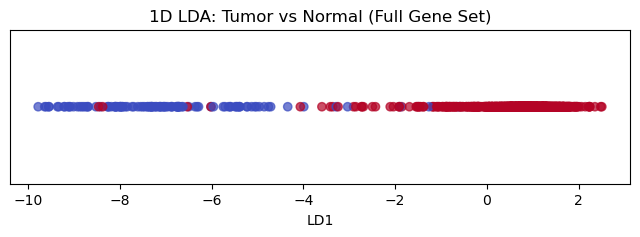

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Transpose gene data
X_group = assay_df_vst.T
y_labels = metadata_df.loc[X_group.index, "Sample"]

# 2. Standardize features (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# 3. Run LDA
lda_full = LinearDiscriminantAnalysis(n_components=1)
lda_full_components = lda_full.fit_transform(X_scaled, y_labels)

# 4. Prepare DataFrame
lda_full_df = pd.DataFrame(lda_full_components, columns=["LD1"], index=X_group.index)
lda_full_df["Sample"] = y_labels

# 5. Plot
plt.figure(figsize=(8, 2))
plt.scatter(
    lda_full_df["LD1"], [0]*len(lda_full_df),
    c=lda_full_df["Sample"].map({"Normal": 0, "Tumor": 1}),
    cmap="coolwarm", alpha=0.7
)
plt.title("1D LDA: Tumor vs Normal (Full Gene Set)")
plt.xlabel("LD1")
plt.yticks([])
plt.show()

#### DEG-filtered Gene Set

Observations:
- Using the DEG-filtered gene set improved class separation between Tumor and Normal samples in the LDA projection. The second plot shows reduced overlap and clearer clustering, suggesting that feature selection via DESeq2 enhances the discriminative power of the model by focusing only on biologically relevant genes.

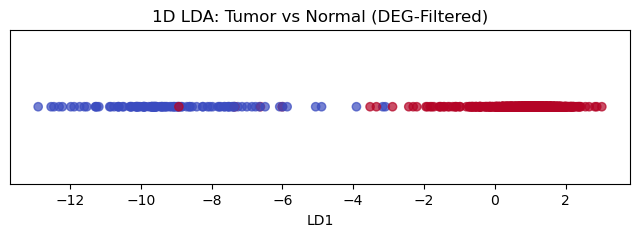

In [ ]:
# 1. Subset gene expression to top DEGs only
X_group_deg = X_group[top_genes]

# 2. Standardize features (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group_deg)

# 3. Run LDA on DEG-filtered data
lda_deg = LinearDiscriminantAnalysis(n_components=1)
lda_deg_components = lda_deg.fit_transform(X_scaled, y_labels)

# 4. Prepare DataFrame
lda_deg_df = pd.DataFrame(lda_deg_components, columns=["LD1"], index=X_group_deg.index)
lda_deg_df["Sample"] = y_labels

# 5. Plot
plt.figure(figsize=(8, 2))
plt.scatter(
    lda_deg_df["LD1"], [0]*len(lda_deg_df),
    c=lda_deg_df["Sample"].map({"Normal": 0, "Tumor": 1}),
    cmap="coolwarm", alpha=0.7
)
plt.title("1D LDA: Tumor vs Normal (DEG-Filtered)")
plt.xlabel("LD1")
plt.yticks([])
plt.show()

### LDA on Early vs Late <a id='lda-on-early-vs-late'></a>

#### Full Gene Set

Observations:
- LDA shows limited separation between Early and Late stage samples, with both groups overlapping heavily around LD1 = –2 to +2, suggesting minimal discriminative power in the current projection.
- A few Late-stage samples extend to LD1 extremes (–4 and +4), indicating possible outliers or more distinct gene expression profiles within that group.

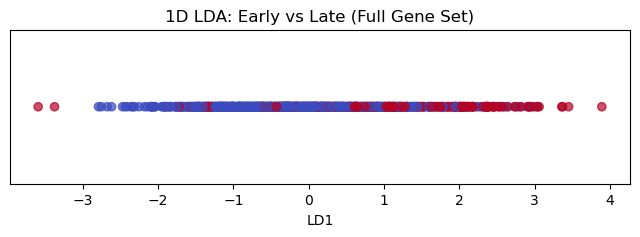

In [110]:
# Base input: Transpose gene matrix to samples × genes
X_group = assay_df_vst.T
y_labels = metadata_df.loc[X_group.index, "Stage_group"]

# Standardize features (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group)

# Run LDA
lda_full = LinearDiscriminantAnalysis(n_components=1)
lda_full_components = lda_full.fit_transform(X_scaled, y_labels)

# Create DataFrame for plotting
lda_full_df = pd.DataFrame(lda_full_components, columns=["LD1"], index=X_group.index)
lda_full_df["Stage_group"] = y_labels

# Plot
plt.figure(figsize=(8, 2))
plt.scatter(
    lda_full_df["LD1"], [0]*len(lda_full_df),
    c=lda_full_df["Stage_group"].map({"Early": 0, "Late": 1}),
    cmap="coolwarm", alpha=0.7
)
plt.title("1D LDA: Early vs Late (Full Gene Set)")
plt.xlabel("LD1")
plt.yticks([])
plt.show()

#### DEG-filtered Gene Set

Observations:
- Using the DEG-filtered gene set led to improved class separation along the discriminant axis. The DEG-filtered plot shows a clearer gradient where Late stage samples are more concentrated to the right of the axis. This suggests that the DEGs identified via differential expression analysis offer stronger biological signals for staging compared to the full gene set, which includes noisy or less relevant features.

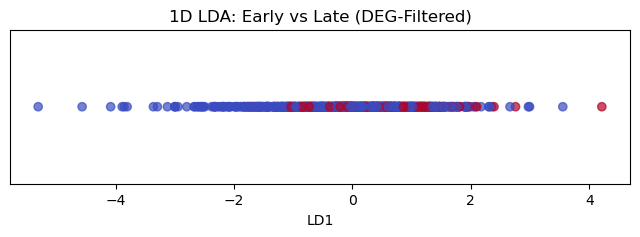

In [111]:
# Subset gene expression data to DEGs only
X_group_deg = X_group[top_genes_stage]

# Standardize features (gene-wise z-score across samples)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_group_deg)

# Run LDA on DEG-filtered genes
lda_deg = LinearDiscriminantAnalysis(n_components=1)
lda_deg_components = lda_deg.fit_transform(X_scaled, y_labels)

# Create DataFrame for plotting
lda_deg_df = pd.DataFrame(lda_deg_components, columns=["LD1"], index=X_group_deg.index)
lda_deg_df["Stage_group"] = y_labels

# Plot
plt.figure(figsize=(8, 2))
plt.scatter(
    lda_deg_df["LD1"], [0]*len(lda_deg_df),
    c=lda_deg_df["Stage_group"].map({"Early": 0, "Late": 1}),
    cmap="coolwarm", alpha=0.7
)
plt.title("1D LDA: Early vs Late (DEG-Filtered)")
plt.xlabel("LD1")
plt.yticks([])
plt.show()

### LDA on Stage I vs Stage II vs Stage III vs Stage IV<a id='lda-on-stage-i-vs-stage-ii-vs-stage-iii-vs-stage-iv'></a>

#### Full Gene Set

Observations:
- LDA reveals partial separation among cancer stages, with Stage IV (grey) showing the most distinct spread — extending outward along LD3 and LD1 axes, while Stages I–III (red, purple, brown) form a dense overlapping cluster near the center. This dispersion of Stage IV samples suggests increased transcriptomic heterogeneity in later stages, potentially reflecting more advanced tumor biology or diverse progression pathways.
- Substantial overlap is observed between Stage I, II, and III, indicating similar gene expression profiles that LDA struggles to disentangle using linear boundaries in 3D space.

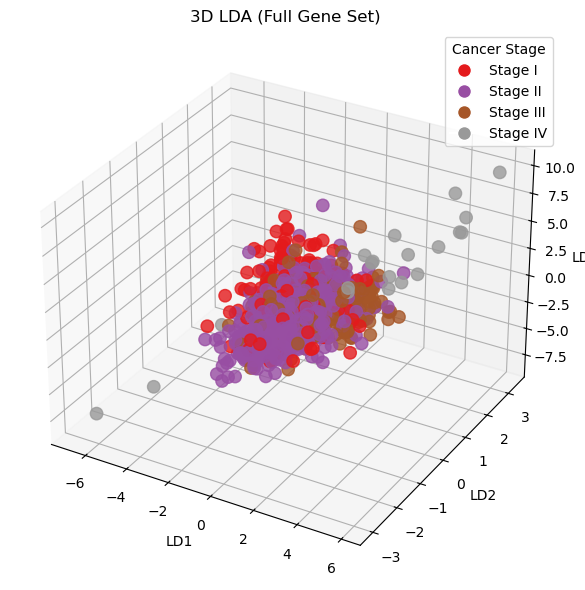

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------
# Prepare metadata
# ---------------------
metadata_df = metadata_df.rename_axis("samples_submitter_id")
metadata_df = metadata_df[~metadata_df.index.duplicated(keep="first")]

# ---------------------
# Encode Cancer Stage
# ---------------------
label_encoder = LabelEncoder()
y_labels_all = metadata_df["Cancer_stage"].dropna()
y_labels_encoded = label_encoder.fit_transform(y_labels_all)

# ---------------------
# Plot 1: LDA on Full Gene Set
# ---------------------
X_full = assay_df_vst.T
common_samples = X_full.index.intersection(metadata_df.index)
X_full = X_full.loc[common_samples]
y_full = metadata_df.loc[common_samples, "Cancer_stage"]
y_full_encoded = label_encoder.transform(y_full)

# Standardize features (very important for LDA)
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Run LDA
lda_full = LinearDiscriminantAnalysis(n_components=3)
lda_full_components = lda_full.fit_transform(X_scaled_full, y_full_encoded)

# Create DataFrame
lda_df_full = pd.DataFrame(lda_full_components, columns=["LD1", "LD2", "LD3"], index=X_full.index)
lda_df_full["Stage_encoded"] = y_full_encoded

# Plot standalone full gene set
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    lda_df_full["LD1"], lda_df_full["LD2"], lda_df_full["LD3"],
    c=lda_df_full["Stage_encoded"], cmap="Set1", s=80, alpha=0.8
)
ax.set_title("3D LDA (Full Gene Set)")
ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.set_zlabel("LD3")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=stage,
           markerfacecolor=plt.cm.Set1(idx / 3), markersize=10)
    for idx, stage in enumerate(label_encoder.classes_)
]
ax.legend(handles=legend_elements, title="Cancer Stage")
plt.tight_layout()
plt.show()

#### DEG-filtered Gene Set

Observations:
- Compared to the full gene set, the 3D LDA projection using the DEG-filtered subset (padj < 0.10) shows a more pronounced separation between cancer stages, particularly Stage I and Stage IV. This suggests that the selected DEGs provide better class-discriminative power for modeling progression.

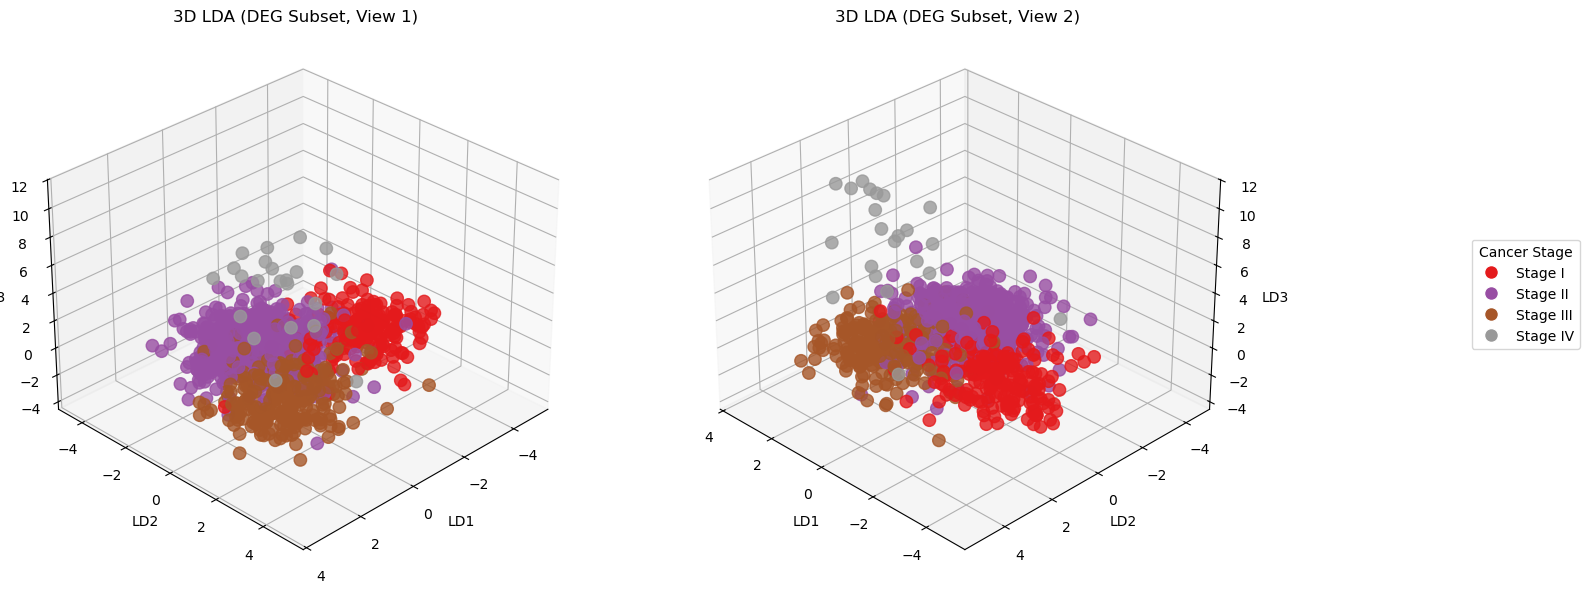

In [113]:
# ---------------------
# Plot 2 & 3: LDA on DEG-Filtered Set (Side by Side)
# ---------------------

# Get top DEGs with padj < 0.10
top_genes_stage_2 = deg_df_stage[deg_df_stage['padj'] < 0.10].index

# Subset assay_df_vst to DEG-filtered gene set
X_deg = assay_df_vst.T.loc[common_samples, top_genes_stage_2]

# Standardize features (gene-wise z-score)
scaler = StandardScaler()
X_scaled_deg = scaler.fit_transform(X_deg)

# Run LDA
lda_deg = LinearDiscriminantAnalysis(n_components=3)
lda_deg_components = lda_deg.fit_transform(X_scaled_deg, y_full_encoded)

# Create DataFrame
lda_df_deg = pd.DataFrame(lda_deg_components, columns=["LD1", "LD2", "LD3"], index=X_deg.index)
lda_df_deg["Stage_encoded"] = y_full_encoded

# Plot side by side with different angles
fig = plt.figure(figsize=(16, 6))

for i, azim_angle in enumerate([45, 135]):
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    ax.scatter(
        lda_df_deg["LD1"], lda_df_deg["LD2"], lda_df_deg["LD3"],
        c=lda_df_deg["Stage_encoded"], cmap="Set1", s=80, alpha=0.8
    )
    ax.set_title(f"3D LDA (DEG Subset, View {i+1})")
    ax.set_xlabel("LD1")
    ax.set_ylabel("LD2")
    ax.set_zlabel("LD3")
    ax.view_init(elev=30, azim=azim_angle)

#fig.legend(handles=legend_elements, title="Cancer Stage", loc="upper center", ncol=len(label_encoder.classes_))

fig.legend(
    handles=legend_elements,
    title="Cancer Stage",
    loc="center right",  # or try "upper right"
    bbox_to_anchor=(1.05, 0.5),  # position to the right of the plot
    borderaxespad=0.5
)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # reserve space for vertical legend
plt.show()


# MODEL BUILDING

## High-Level Overview

To enhance model performance and interpretability, we adopted a two-stage feature refinement strategy. First, we applied univariate feature selection through differential expression analysis (DESeq2) to retain statistically significant genes. As a baseline, we also evaluated models using the full gene set without filtering. Both sets were then passed through a suite of multivariate dimensionality reduction techniques (PCA, LDA, NCA, PCoA) prior to classification.

### Full Gene Set Pipeline (Baseline)

> **Raw RNA-seq counts** → **VST/log2 normalization** → **PCA/LDA/NCA/PCoA** → **Classifier**

### DEG-Filtered Gene Set Pipeline

> **Raw RNA-seq counts** → **DEG filtering (DESeq2)** → **VST/log2 normalization** → **PCA/LDA/NCA/PCoA** → **Classifier**

### Detailed Steps

**Step 1: Data Preparation**  

- The dataset was initially split using an 80/20 stratified split to preserve class distribution. From this, a DEG-reduced subset was created by applying DESeq2 differential expression analysis (`adjusted p-value < 0.10`). This resulted in two datasets used for comparison throughout modeling: the **full gene set** and a **DEG-filtered subset**.

**Step 2: Log Transformation and Feature Scaling**  

- To address the skewness of RNA-seq count data and stabilize variance, the first transformation step applied was a **log2 transformation** using the formula: `np.log2(X + 1)`.
- Following transformation, gene-wise z-score normalization (StandardScaler) was performed to center each gene’s expression values to a mean of zero and scale them to unit variance across all samples. This step ensured that all features contributed equally to variance-based and distance-based methods in downstream analyses.

**Step 3: Dimensionality Reduction**  

- Four dimensionality reduction techniques were compared:
    - Unsupervised: 
        - **PCA (Principal Component Analysis):** captures the directions of maximum variance, commonly used to compress high-dimensional gene expression data.
        - **PCoA (Principal Coordinates Analysis):** used with Bray-Curtis distance, it visualizes dissimilarity in expression profiles, often in microbiome and gene studies.
    - Supervised:
        - **LDA (Linear Discriminant Analysis):** a supervised method that maximizes class separability, ideal for labeled gene classification.
        - **NCA (Neighborhood Components Analysis):** learns a transformation that improves nearest-neighbor classification, useful when classes are biologically overlapping.

- Excluded:
    - **mRMR (Minimum Redundancy Maximum Relevance)** was initially considered for feature selection due to its strength in identifying a compact set of highly informative, non-redundant genes. However, it was **excluded from final comparisons due to excessive memory consumption** when applied to the full gene set (~60,000 features), which made it infeasible for reliable execution in the current environment.


**Step 4: Classification** 

- Three classifiers were evaluated:  
    - **Random Forest (RF):** robust to noise, handles high-dimensional data well.  
    - **XGBoost:** powerful gradient boosting method that handles feature interactions effectively.  
    - **Logistic Regression:** simple, interpretable baseline that benefits from regularization in high-dimensional spaces.  

- All classifiers used `class_weight='balanced'` to address data imbalance (e.g., Tumor vs. Normal ~90/10), as **SMOTE and undersampling were avoided** to preserve the biological structure and avoid introducing artificial patterns in gene expression data.

**Step 5: Hyperparameter Tuning**  

- Each pipeline was wrapped in **GridSearchCV** for hyperparameter tuning with 5-fold cross-validation to optimize model performance on the training set.

**Step 6: Model Selection**  

- Models were selected based primarily on **Recall** and balanced F1-score. For **Tumor vs. Normal**, recall was prioritized to **minimize false negatives**, ensuring Tumor cases are not overlooked. For **Stage classification**, balanced performance across stages was emphasized, given the molecular similarity between intermediate stages.

**Step 7: SHAP / Feature Importance Analysis**  

- SHAP (SHapley Additive exPlanations) values were computed for the top models to interpret feature importance. This helped identify genes most influential to the model’s predictions, and allowed comparison with known cancer-related genes in literature, providing biological insight and validation.

## Normal vs Tumor Classification<a id='normal-vs-tumor-classification'></a>

### Model Benchmarking and Performance Comparison<a id='model-benchmarking-and-performance-comparison'></a>

The classification pipeline was evaluated across two types of input datasets — the full gene set and a DEG-filtered subset — using 4 dimensionality reduction techniques and 3 classifiers. Each model was assessed using four performance metrics: Accuracy, Precision, Recall, and F1-score. The top-performing scores for each metric are highlighted in red for easy comparison.

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score, matthews_corrcoef, log_loss
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from skbio.stats.ordination import pcoa
from skbio import DistanceMatrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# --- Optional MRMR Transformer (Commented out for long runtime) ---
# from mrmr import mrmr_classif
# class MRMRSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, k=100):
#         self.k = k
#         self.selected_features_ = None
#     def fit(self, X, y):
#         self.selected_features_ = mrmr_classif(X, y, K=self.k)
#         return self
#     def transform(self, X):
#         return X[self.selected_features_]

# --- Custom Transformers ---
class Log2Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log2(X + 1)

# class LDASelector(BaseEstimator, TransformerMixin):
#     def __init__(self, n_components=1):
#         self.n_components = n_components
#         self.model = LinearDiscriminantAnalysis(n_components=n_components)
#     def fit(self, X, y):
#         self.model.fit(X, y)
#         return self
#     def transform(self, X):
#         return self.model.transform(X)
    
class LDASelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=1):
        self.n_components = n_components
    def fit(self, X, y):
        self.model = LinearDiscriminantAnalysis(n_components=self.n_components)
        self.model.fit(X, y)
        return self
    def transform(self, X):
        return self.model.transform(X)

class NCASelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=10):
        self.n_components = n_components
        self.model = NeighborhoodComponentsAnalysis(n_components=n_components, random_state=42)
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    def transform(self, X):
        return self.model.transform(X)

class PCoATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, metric='braycurtis', n_components=10):
        self.metric = metric
        self.n_components = n_components
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        dist = pairwise_distances(X, metric=self.metric)
        dm = DistanceMatrix(dist)
        coords = pcoa(dm).samples
        return coords.iloc[:, :self.n_components].values

# class PCoATransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, metric='braycurtis', n_components=10):
#         self.metric = metric
#         self.n_components = n_components

#     def fit(self, X, y=None):
#         # Compute distance and perform PCoA
#         dist = pairwise_distances(X, metric=self.metric)
#         self.dm_ = DistanceMatrix(dist)
#         self.pcoa_result_ = pcoa(self.dm_)

#         # Print variance explained
#         total_var = self.pcoa_result_.proportion_explained[:self.n_components].sum()
#         print(f"[PCoA] {self.n_components} components retain {total_var:.2%} of variance.")

#         return self

#     def transform(self, X):
#         # Return stored PCoA coordinates
#         coords = self.pcoa_result_.samples
#         return coords.iloc[:, :self.n_components].values

# --- Step 0: Optimize memory usage for full gene set ---
assay_df_final = assay_df_final.apply(pd.to_numeric, downcast='integer')
assay_df_final = assay_df_final.loc[~(assay_df_final == 0).all(axis=1)]

# --- Step 1: Prepare data ---
X = assay_df_final.T
y = metadata_df["Sample"]

# --- Step 2: Encode labels for all classifiers ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# --- Step 4: DEG-based subset ---
top_genes = deg_df_sample[deg_df_sample['padj'] < 0.10].index
X_train_subset = X_train[top_genes]
X_test_subset = X_test[top_genes]

# --- Model and FS Configs ---
models = {
    "RF": (
        RandomForestClassifier(random_state=42, class_weight='balanced'),
        {
            'clf__n_estimators': [100, 200],  
            'clf__max_depth': [None, 10, 20],    
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    ),
    "XGB": (
        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        {
            'clf__n_estimators': [100, 200],  
            'clf__max_depth': [3, 6, 10],    
            'clf__learning_rate': [0.05, 0.1, 0.2]
        }
    ),
    "LogReg": (
        LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', class_weight='balanced'),
        {
            'clf__C': [0.1, 1.0, 10]
        }
    ),
    "ElasticNet": (
        SGDClassifier(loss='log_loss', penalty='elasticnet', max_iter=1000, random_state=42),
        {
            'clf__alpha': [0.0001, 0.001],
            'clf__l1_ratio': [0.1, 0.5, 0.9]
        }
    )
}

fs_methods = {
    "PCA": PCA(n_components=0.80),
    "LDA": LDASelector(n_components=1),
    "NCA": NCASelector(n_components=20),
    "PCoA": PCoATransformer(metric='braycurtis', n_components=75)
    # "MRMR": MRMRSelector(k=100)  # Uncomment if MRMR is enabled
}

# --- Unified Runner ---
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, average_precision_score
)

def run_fs_clf_pipeline(X_train, X_test, y_train, y_test, fs_name, fs_transformer, clf_name, clf, param_grid, top_genes=None):
    results = {}
    for label, X_train_sub in {
        f"{fs_name} + {clf_name} on full gene set": X_train,
        f"{fs_name} + {clf_name} on DEG-filtered gene set": X_train[top_genes] if top_genes is not None else None
    }.items():
        if X_train_sub is None:
            continue

        X_test_sub = X_test[X_train_sub.columns]

        pipeline = Pipeline([
            ('log2', Log2Transformer()),
            ('scaler', StandardScaler()),
            ('fs', fs_transformer),
            ('clf', clf)
        ])

        grid = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            n_jobs=1,
            scoring='accuracy',
            verbose=0
        )

        grid.fit(X_train_sub, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_sub)

        # Predict probabilities for ROC and PR metrics
        if hasattr(best_model.named_steps['clf'], "predict_proba"):
            y_proba = best_model.predict_proba(X_test_sub)
            if y_proba.shape[1] == 2:
                y_scores = y_proba[:, 1]  # Binary case
            else:
                y_scores = y_proba  # Multi-class
        else:
            y_scores = None

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)

        # Build metrics
        result_metrics = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred, average='binary' if len(set(y_test)) == 2 else 'macro'),
            "Precision (PPV)": precision_score(y_test, y_pred, average='binary' if len(set(y_test)) == 2 else 'macro'),
            "Recall (TPR)": recall_score(y_test, y_pred, average='binary' if len(set(y_test)) == 2 else 'macro'),
            "MCC": matthews_corrcoef(y_test, y_pred),
            "NPV": TN / (TN + FN) if (TN + FN) > 0 else 0,
            "TNR": TN / (TN + FP) if (TN + FP) > 0 else 0,
            "TPR": TP / (TP + FN) if (TP + FN) > 0 else 0,
            "Confusion Matrix": cm.tolist()
        }

        # CE Loss (cross-entropy) if probabilities available
        if y_scores is not None and len(set(y_test)) == 2:
            result_metrics["CE (Loss)"] = log_loss(y_test, y_scores)

        # AUC and AUPRC
        if y_scores is not None:
            if len(set(y_test)) == 2:
                result_metrics["AUC ROC"] = roc_auc_score(y_test, y_scores)
                result_metrics["AUPRC"] = average_precision_score(y_test, y_scores)
            else:
                result_metrics["AUC ROC"] = roc_auc_score(y_test, y_scores, multi_class='ovr', average='macro')
                result_metrics["AUPRC"] = average_precision_score(y_test, y_scores, average='macro')

        # Store result
        results[label] = result_metrics

    return results

In [ ]:
# # Troubleshooting (run individual tests)
# fs_name = "PCA"
# fs_transformer = fs_methods[fs_name]

# clf_name = "LogReg"
# clf, param_grid = models[clf_name]

# results = run_fs_clf_pipeline(
#     X_train, X_test,
#     y_train, y_test,
#     fs_name, fs_transformer,
#     clf_name, clf,
#     param_grid,
#     top_genes
# )

# pd.DataFrame(results).T

In [117]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay

def plot_calibration_curves(model, X_test, y_test, model_name="Model"):
    if not hasattr(model.named_steps['clf'], "predict_proba"):
        print(f"[{model_name}] does not support probability prediction.")
        return

    y_prob = model.predict_proba(X_test)
    if y_prob.shape[1] != 2:
        print(f"[{model_name}] is not binary classification; skipping calibration curve.")
        return

    fig = plt.figure(figsize=(6, 6))
    gs = GridSpec(2, 1)

    # Calibration curve
    ax_calibration = fig.add_subplot(gs[0, 0])
    CalibrationDisplay.from_estimator(
        model,
        X_test,
        y_test,
        n_bins=10,
        name=model_name,
        ax=ax_calibration
    )
    ax_calibration.set_title("Calibration Curve")
    ax_calibration.grid()

    # # Histogram
    # ax_hist = fig.add_subplot(gs[1, 0])
    # ax_hist.hist(
    #     y_prob[:, 1],
    #     range=(0, 1),
    #     bins=10,
    #     color='C0',
    #     edgecolor='black'
    # )
    # ax_hist.set_title("Histogram of Predicted Probabilities")
    # ax_hist.set_xlabel("Mean predicted probability")
    # ax_hist.set_ylabel("Count")

    plt.tight_layout()
    plt.show()

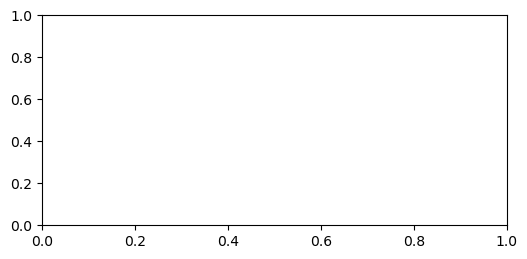

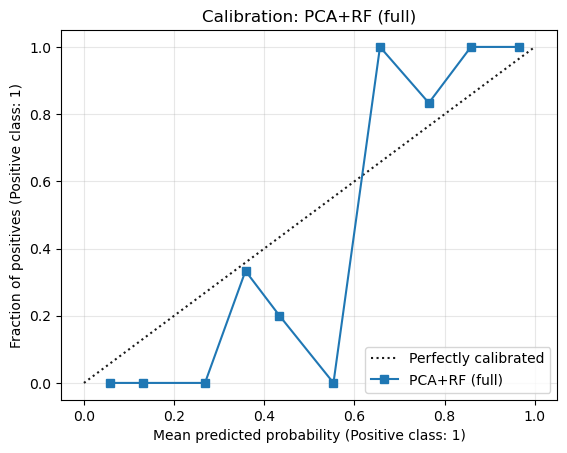

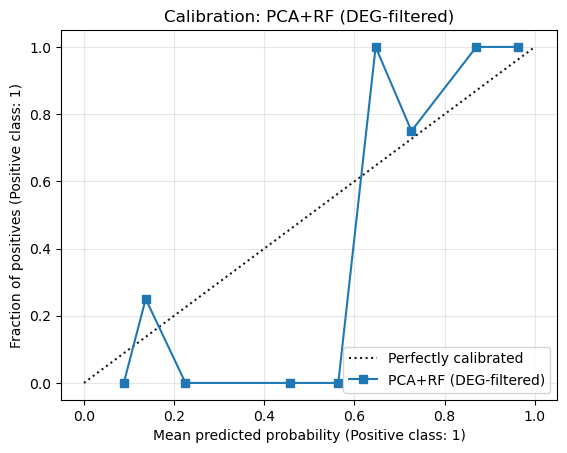

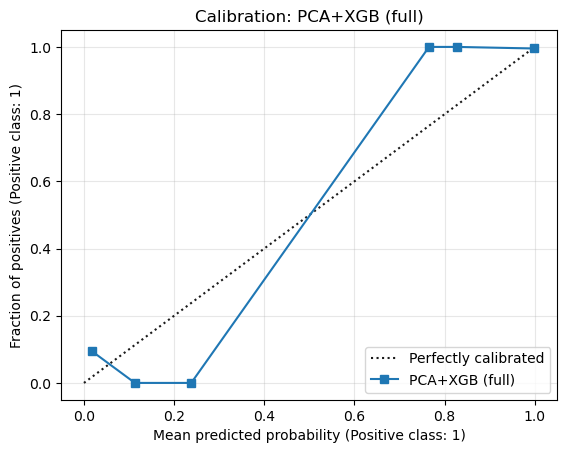

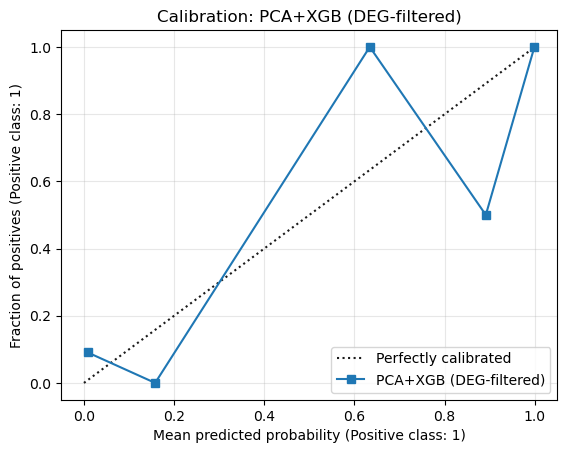

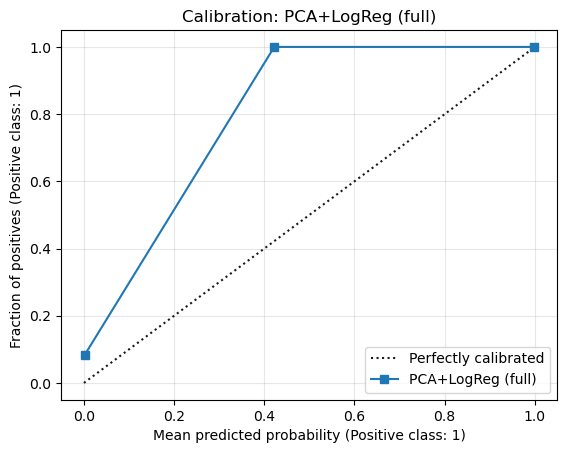

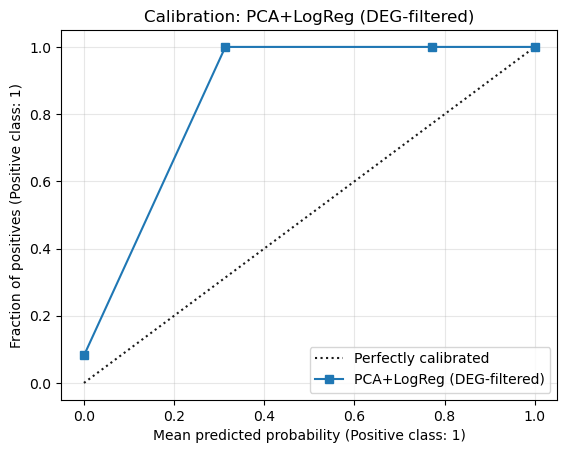

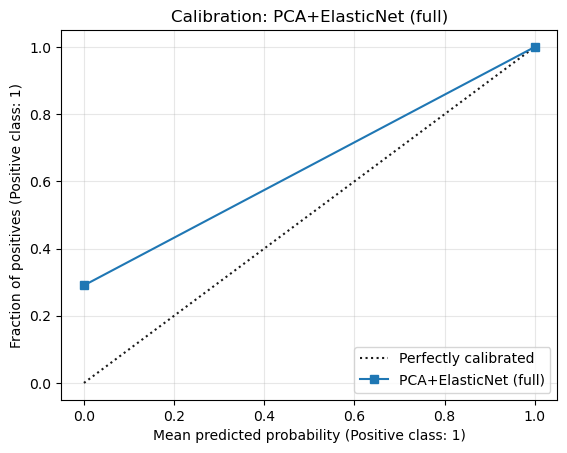

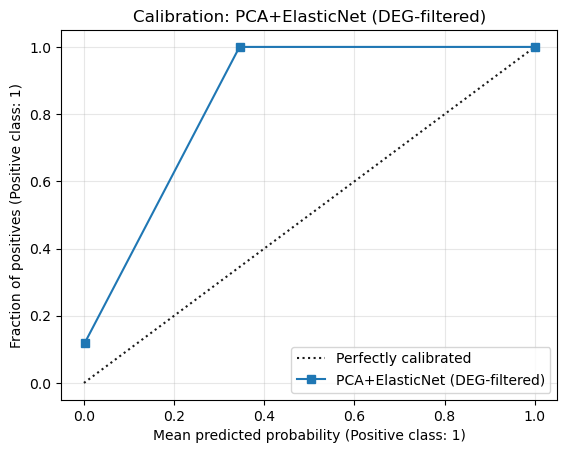

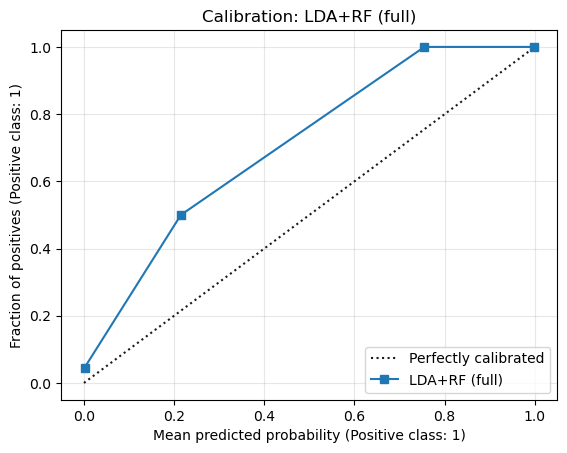

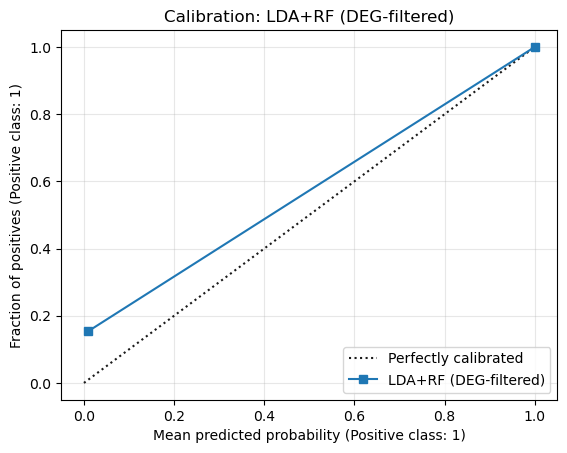

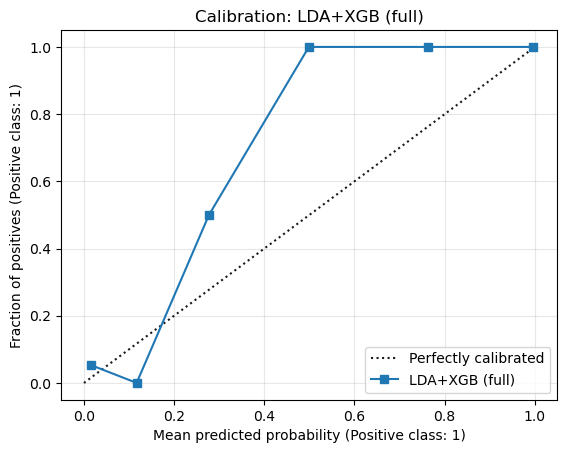

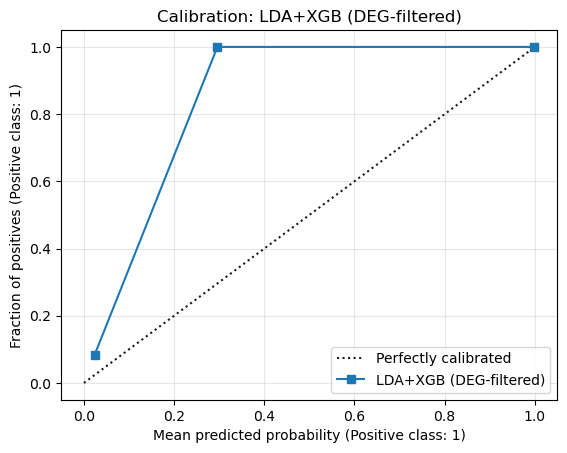

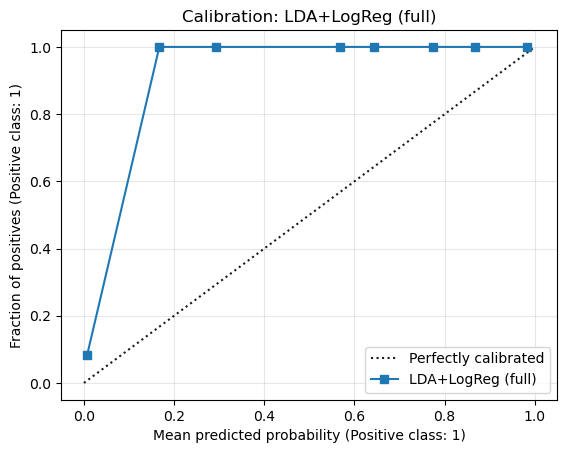

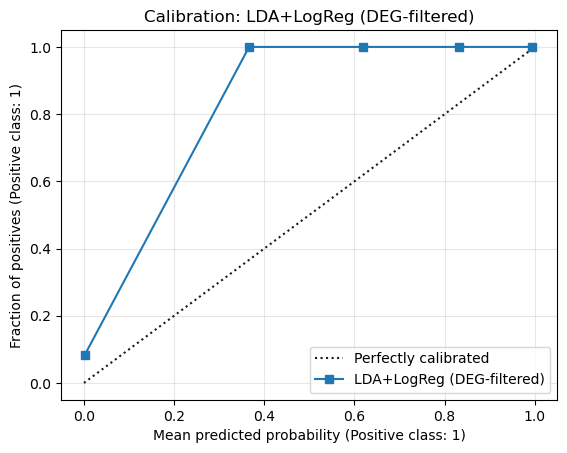

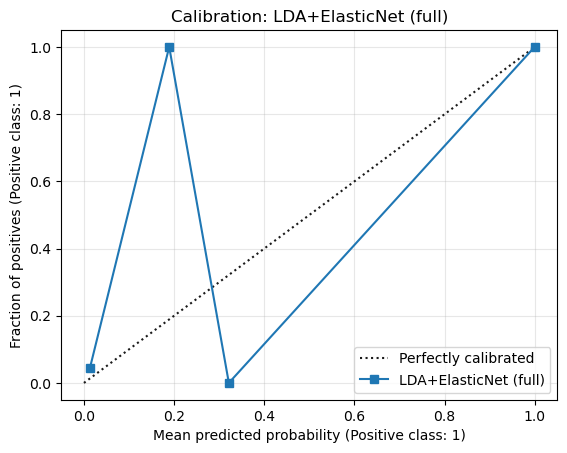

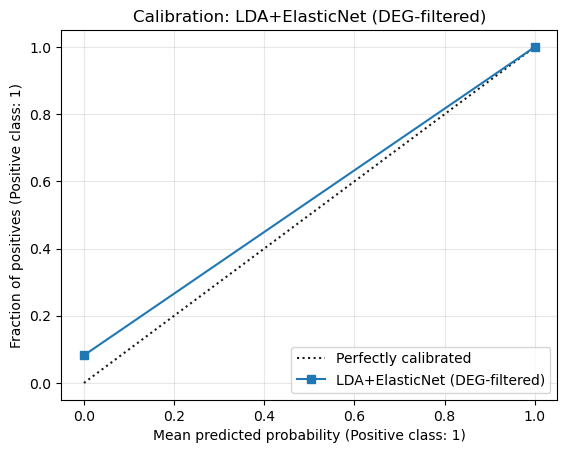

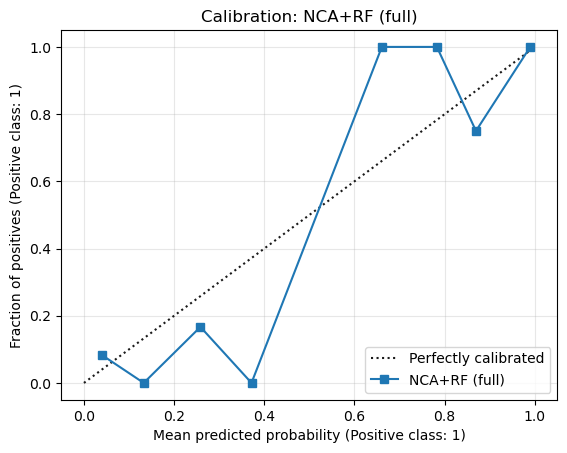

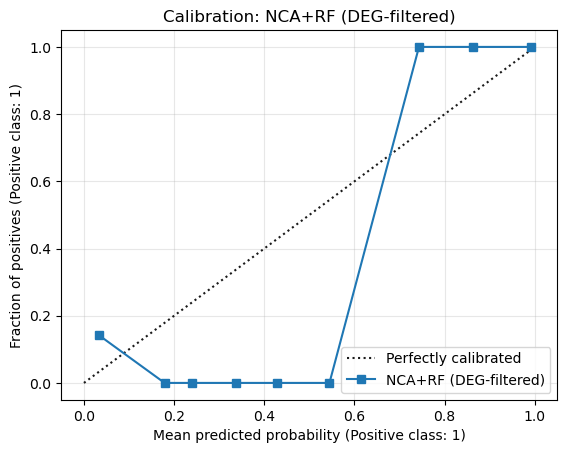

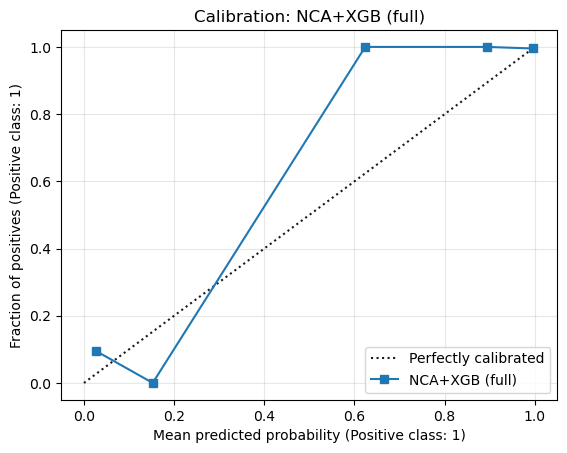

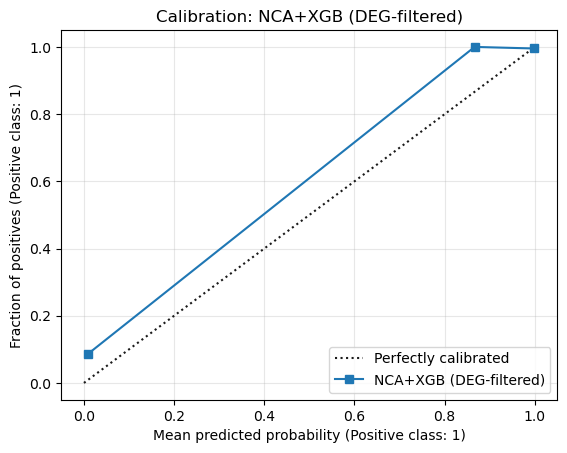

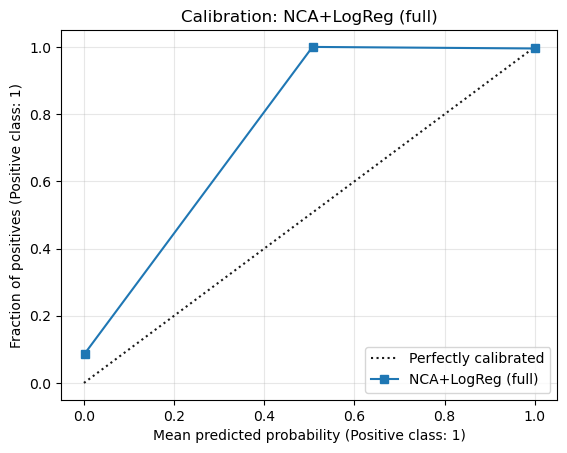

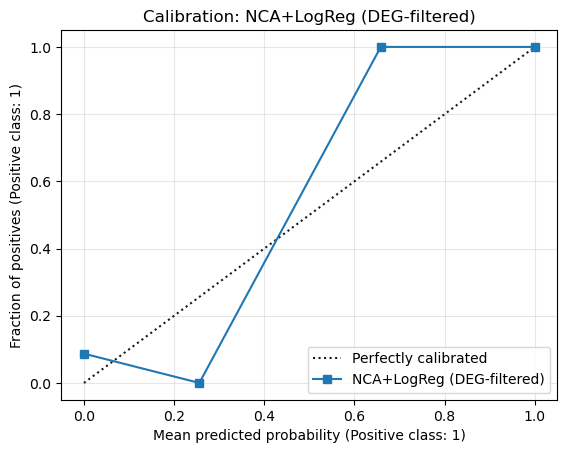

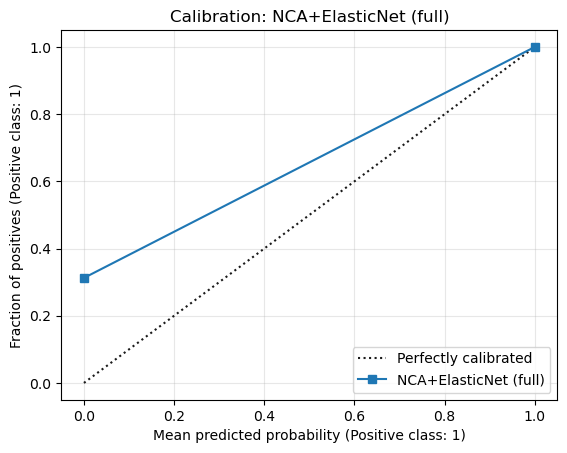

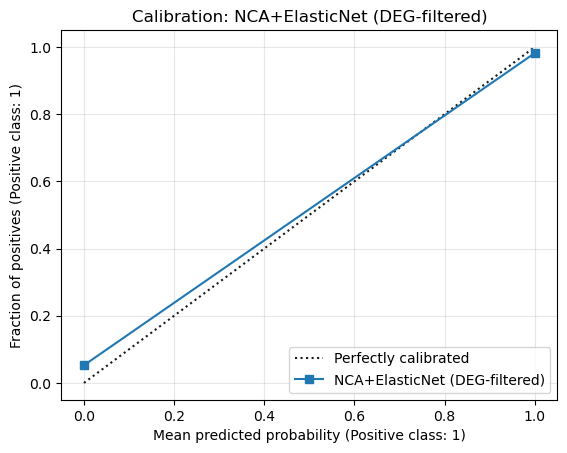

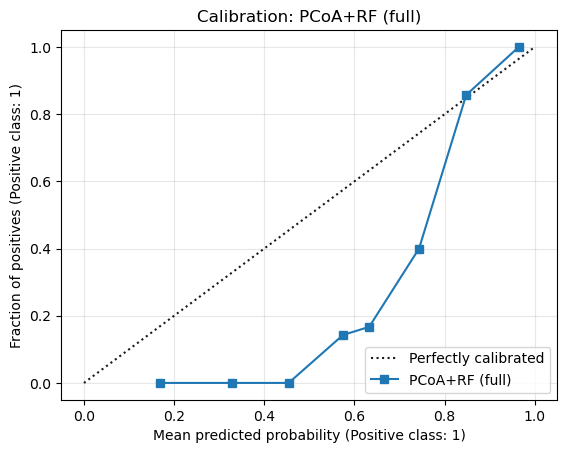

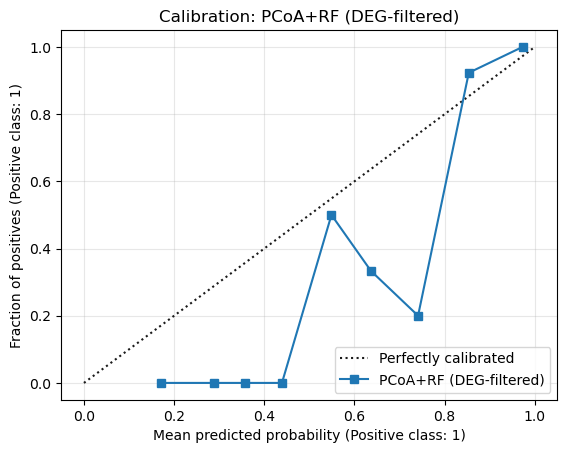

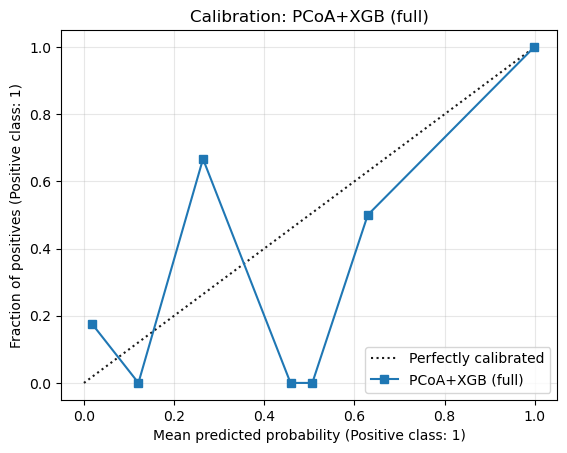

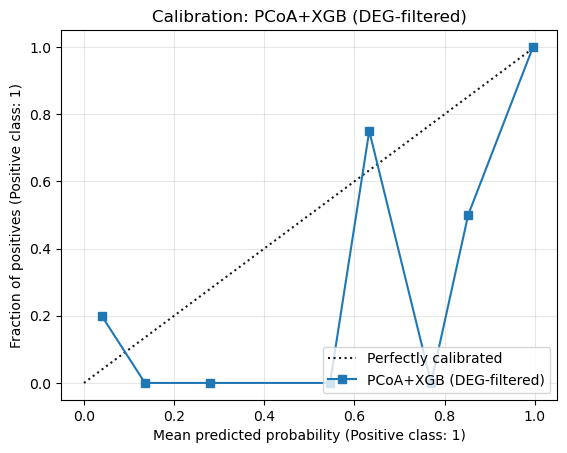

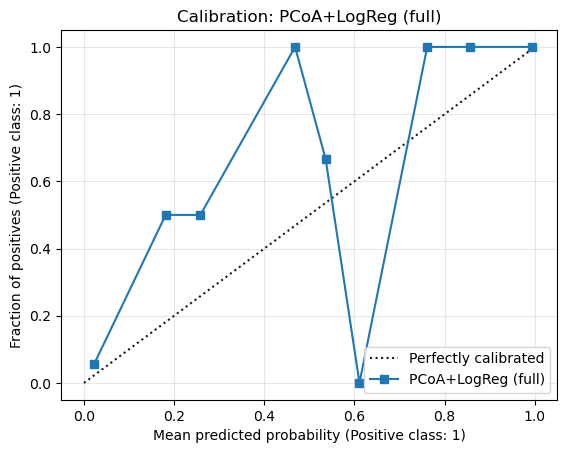

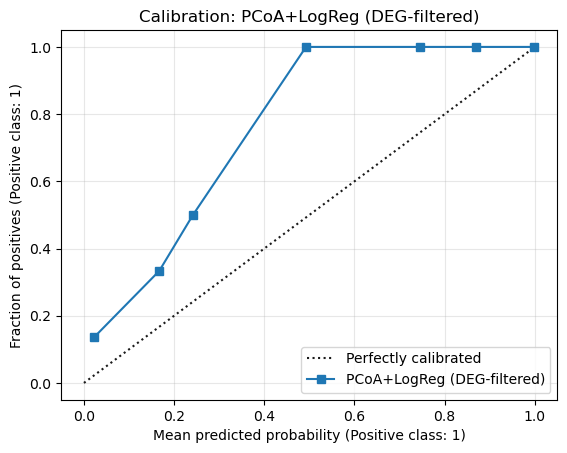

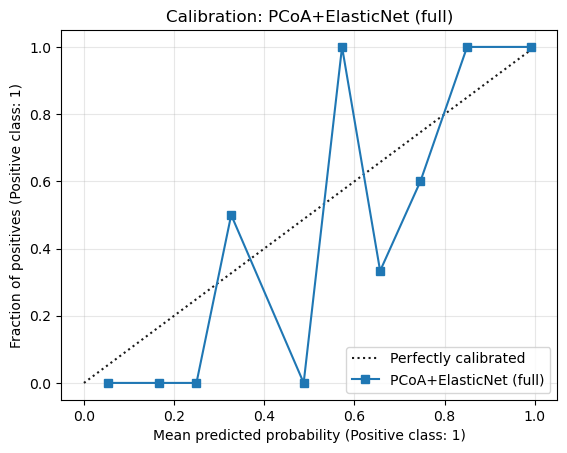

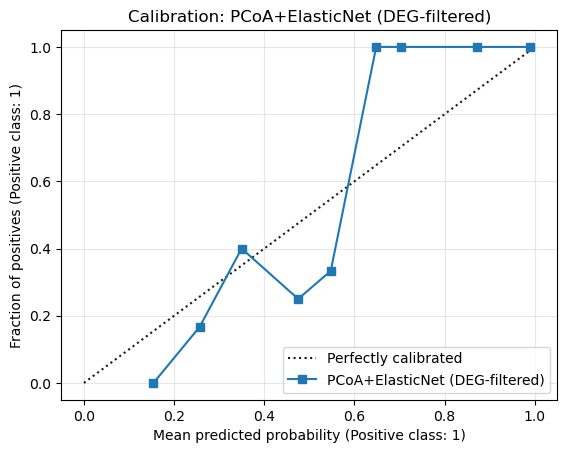

In [119]:
# --- Imports you need for this block ---
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibrationDisplay
from sklearn.base import clone
import numpy as np
import matplotlib.pyplot as plt

# --- Helper: build the feature selector for a given name ---
def get_fs_transformer(fs_name, y_train):
    if fs_name == "PCoA":
        return PCoATransformer(metric="braycurtis", n_components=75)
    elif fs_name == "NCA":
        return NCASelector(n_components=20)
    elif fs_name == "LDA":
        n_classes = len(np.unique(y_train))
        return LDASelector(n_components=max(1, n_classes - 1))
    else:
        # fs_methods[fs_name] should be an unfitted transformer/selector
        return fs_methods[fs_name]

# --- Helper: plot calibration curves safely (binary or multiclass OvR) ---
def plot_calibration_safe(model, X_test, y_test, model_name, multiclass_strategy="skip"):
    """
    multiclass_strategy:
        - "skip": only plot when binary
        - "ovr" : plot one-vs-rest curves for each class when multiclass
    """
    # Must have predict_proba
    if not hasattr(model.named_steps["clf"], "predict_proba"):
        return

    classes_ = getattr(model.named_steps["clf"], "classes_", None)
    if classes_ is None:
        return

    if len(classes_) == 2:
        # Binary: single curve
        y_prob = model.predict_proba(X_test)[:, 1]
        CalibrationDisplay.from_predictions(y_test, y_prob, n_bins=10, name=model_name)
        plt.title(f"Calibration: {model_name}")
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        # Multiclass
        if multiclass_strategy != "ovr":
            # Skip to avoid sklearn's binary-only check
            return
        for i, cls in enumerate(classes_):
            y_prob = model.predict_proba(X_test)[:, i]
            y_bin = (y_test == cls).astype(int)
            CalibrationDisplay.from_predictions(y_bin, y_prob, n_bins=10, name=f"{model_name} (OvR: {cls})")
            plt.title(f"Calibration: {model_name} (OvR: {cls})")
            plt.grid(True, alpha=0.3)
            plt.show()

# ---------------- Main loop (replacement) ----------------
all_results = []
seen_models = set()

# Choose what to do for multiclass calibration: "skip" or "ovr"
MULTICLASS_CALIBRATION = "skip"   # change to "ovr" if you want OvR plots

for fs_name in fs_methods.keys():
    base_fs = get_fs_transformer(fs_name, y_train)

    for clf_name, (clf, param_grid) in models.items():
        for label_type, use_top_genes in {"full": False, "DEG-filtered": True}.items():

            # Select columns once
            X_train_sub = X_train[top_genes] if use_top_genes else X_train
            X_test_sub  = X_test[top_genes]  if use_top_genes else X_test
            genes_used = top_genes if use_top_genes else None

            # --- Run your existing evaluation (make sure it uses *_sub) ---
            result = run_fs_clf_pipeline(
                X_train_sub, X_test_sub, y_train, y_test,
                fs_name, clone(base_fs),
                clf_name, clone(clf),
                param_grid,
                top_genes=genes_used
            )

            # --- Refit best model on the subset for calibration plotting ---
            pipeline = Pipeline([
                ("log2", Log2Transformer()),
                ("scaler", StandardScaler()),
                ("fs", clone(base_fs)),
                ("clf", clone(clf)),
            ])

            grid = GridSearchCV(
                pipeline,
                param_grid,
                cv=5,
                n_jobs=1,
                scoring="accuracy",
                verbose=0
            )
            grid.fit(X_train_sub, y_train)
            best_model = grid.best_estimator_

            model_label = f"{fs_name}+{clf_name} ({label_type})"

            # Plot calibration safely (binary only or OvR by choice)
            if model_label not in seen_models:
                seen_models.add(model_label)
                plot_calibration_safe(
                    best_model,
                    X_test_sub,
                    y_test,
                    model_name=model_label,
                    multiclass_strategy=MULTICLASS_CALIBRATION
                )

            # Collect results (avoid duplicates)
            for m_name, metrics in result.items():
                if m_name not in seen_models:
                    seen_models.add(m_name)
                    all_results.append({"Model": m_name, **metrics})

In [120]:
# Step 1: Convert to DataFrame
df_all_results = pd.DataFrame(all_results)

# Step 2: Make "Model" values unique
df_all_results["Model"] = (
    df_all_results["Model"]
    + df_all_results.groupby("Model").cumcount().astype(str).replace("0", "")
)

# Step 3: Set "Model" as index
df_all_results = df_all_results.set_index("Model")

# Step 4: Move "Confusion Matrix" to the end
df_all_results = df_all_results[
    [col for col in df_all_results.columns if col != "Confusion Matrix"] + ["Confusion Matrix"]
]

# Step 5: Define highlight columns
highlight_cols_max = [
    "Accuracy", 
    "Balanced Accuracy",
    "F1", 
    "Precision (PPV)", 
    "Recall (TPR)", 
    "AUC ROC", 
    "AUPRC", 
    "MCC",
    "NPV",
    "TNR",
    "TPR"
]
highlight_cols_min = ["CE (Loss)"]

# Step 6: Define highlighting functions
def highlight_max_red(s):
    is_max = s == s.max()
    return ['color: red; font-weight: bold;' if v else '' for v in is_max]

def highlight_min_green(s):
    is_min = s == s.min()
    return ['color: green; font-weight: bold;' if v else '' for v in is_min]

# Step 7: Style and display
styled_all = (
    df_all_results.style
    .apply(highlight_max_red, subset=highlight_cols_max)
    .apply(highlight_min_green, subset=highlight_cols_min)
)

styled_all

### Best Performing Model<a id='best-performing-model'></a>



For Tumor vs. Normal classification, both LDA + RF and NCA + Logistic Regression models performed equally well across core metrics, including accuracy, precision, recall, and F1-score. However, the **NCA + LogReg model, which was trained on a DEG-filtered gene set**, achieved slightly higher AUC ROC and AUPRC scores. Given its comparable performance and use of fewer input features, we selected this model as the final choice for its efficiency and interpretability.

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.99      1.00       217

    accuracy                           0.99       239
   macro avg       0.96      1.00      0.98       239
weighted avg       0.99      0.99      0.99       239



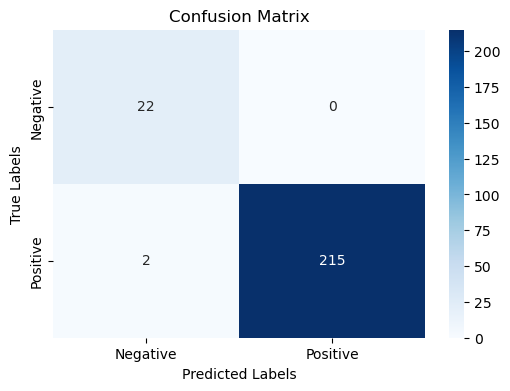

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Set up the exact identifiers
fs_name = "NCA"

if fs_name == "PCoA":
    fs_transformer = PCoATransformer(metric='braycurtis', n_components=75)
elif fs_name == "NCA":
    fs_transformer = NCASelector(n_components=20)
elif fs_name == "LDA":
    n_classes = len(np.unique(y_train))
    fs_transformer = LDASelector(n_components=n_classes - 1)
else:
    fs_transformer = fs_methods[fs_name]  # Default from dict

clf_name = "LogReg"
clf, param_grid = models[clf_name]

# 2. Re-run the pipeline (or refit just this combo)
pipeline = Pipeline([
    ('log2', Log2Transformer()),
    ('scaler', StandardScaler()),
    ('fs', fs_transformer),
    ('clf', clf)
])

# Fit the GridSearchCV on DEG-filtered gene set
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
    verbose=0
)
grid.fit(X_train[top_genes], y_train)

# Get best model and predictions
tumor_normal_model = grid.best_estimator_
y_pred = tumor_normal_model.predict(X_test[top_genes])

# 3. Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Create a heatmap for the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Sample Prediction 

In [122]:
# 1. Select one sample and filter for DEGs
sample_df = X_test.iloc[[0]][top_genes]

# 2. Get raw encoded label (e.g., 0 or 1)
sample_label = y_test[0]

# 3. Decode it to human-readable class name
true_label = le.inverse_transform([sample_label])[0]

# 4. Predict using best model
predicted_class = tumor_normal_model.predict(sample_df)[0]
predicted_prob = tumor_normal_model.predict_proba(sample_df)[0]
decoded_pred = le.inverse_transform([predicted_class])[0]
confidence = np.max(predicted_prob)

# 5. Output
print("True label:", true_label)
print("Predicted label:", decoded_pred)
print(f"Confidence: {confidence:.2%}")

True label: Tumor
Predicted label: Tumor
Confidence: 100.00%


### Top Predictive Features<a id='top-predictive-features'></a>

To identify the most influential genes contributing to the Tumor vs. Normal classification task, we extracted feature importance from the Neighborhood Components Analysis (NCA) step of the final model. While NCA is a supervised dimensionality reduction method, it does not directly provide feature importances like tree-based models. Instead, we examined the absolute weights from the first NCA component, which reflects how strongly each gene contributes to the learned projection used for classification. By ranking genes based on these component loadings, we obtained a list of top contributing features that played a key role in separating tumor from normal samples in the reduced feature space.

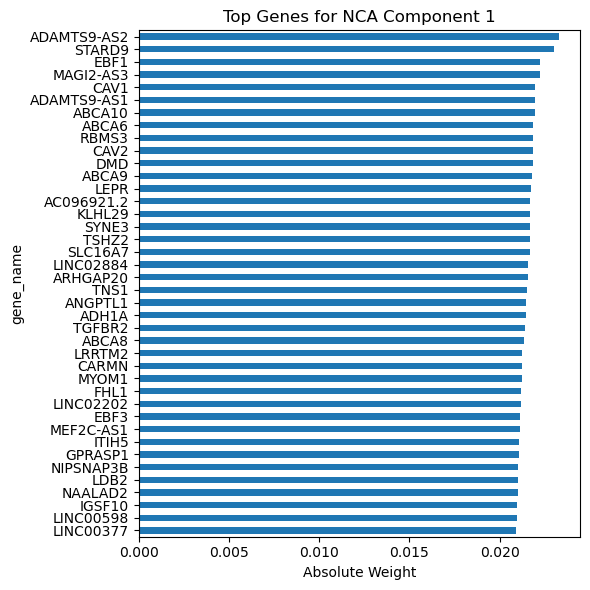

Top genes for NCA Component 1:
['ADAMTS9-AS2', 'STARD9', 'EBF1', 'MAGI2-AS3', 'CAV1', 'ADAMTS9-AS1', 'ABCA10', 'ABCA6', 'RBMS3', 'CAV2', 'DMD', 'ABCA9', 'LEPR', 'AC096921.2', 'KLHL29', 'SYNE3', 'TSHZ2', 'SLC16A7', 'LINC02884', 'ARHGAP20', 'TNS1', 'ANGPTL1', 'ADH1A', 'TGFBR2', 'ABCA8', 'LRRTM2', 'CARMN', 'MYOM1', 'FHL1', 'LINC02202', 'EBF3', 'MEF2C-AS1', 'ITIH5', 'GPRASP1', 'NIPSNAP3B', 'LDB2', 'NAALAD2', 'IGSF10', 'LINC00598', 'LINC00377']


In [123]:
# Access the fitted pipeline (e.g., best_model from GridSearchCV)
nca_selector = tumor_normal_model.named_steps['fs']  # NCASelector instance

# Access the internal fitted NCA model
nca_model = nca_selector.model  # NeighborhoodComponentsAnalysis instance

# Get gene names (ensure you're matching the training data used in NCA)
gene_names = X_train[top_genes].columns if top_genes is not None else X_train.columns

# Extract NCA component weights (genes × components)
nca_weights = pd.DataFrame(
    nca_model.components_.T,  # shape: (n_genes, n_components)
    index=gene_names,
    columns=[f"NCA Component {i+1}" for i in range(nca_model.components_.shape[0])]
)

# Rank genes by importance in the first NCA component
top_genes_component_1 = nca_weights["NCA Component 1"].abs().sort_values(ascending=False).head(40)

# Plot top contributing genes
plt.figure(figsize=(6, 6))
top_genes_component_1.plot(kind="barh", title="Top Genes for NCA Component 1")
plt.gca().invert_yaxis()
plt.xlabel("Absolute Weight")
plt.tight_layout()
plt.show()

# Print gene names
print("Top genes for NCA Component 1:")
print(top_genes_component_1.index.tolist())

In [124]:
# Extract weights for Component 1
component_1_weights = nca_weights["NCA Component 1"]

# Sort genes by absolute weight (importance)
top_genes_nca_all = component_1_weights.abs().sort_values(ascending=False)

# Create DataFrame with signed and absolute weights
top_genes_df_all = pd.DataFrame({
    "Gene": top_genes_nca_all.index,
    "Weight": component_1_weights[top_genes_nca_all.index]
})
top_genes_df_all["Abs Weight"] = top_genes_df_all["Weight"].abs()

# Export to CSV
top_genes_df_all.to_csv("top_genes_nca_tumor_normal.csv", index=True)

## Early vs. Late Stage Classification<a id='early-vs-late-stage-classification'></a>

### Model Benchmarking and Performance Comparison<a id='model-benchmarking-and-performance-comparison-1'></a>

The classification pipeline was evaluated across two types of input datasets — the full gene set and a DEG-filtered subset — using 4 dimensionality reduction techniques and 3 classifiers. Each model was assessed using four performance metrics: Accuracy, Precision, Recall, and F1-score. The top-performing scores for each metric are highlighted in red for easy comparison.

In [125]:
# --- Step 1: Prepare data for Stage_group ---
X_stage_2 = assay_df_final.T
y_stage_2 = metadata_df["Stage_group"]

# --- Step 2: Encode labels ---
le_stage_2 = LabelEncoder()
y_stage_encoded_2 = le_stage_2.fit_transform(y_stage_2)

# --- Step 3: Train-test split ---
X_train_stage_2, X_test_stage_2, y_train_stage_2, y_test_stage_2 = train_test_split(
    X_stage_2, y_stage_encoded_2, stratify=y_stage_encoded_2, test_size=0.2, random_state=42
)

# --- Step 4: DEG subset for Stage_group ---
top_genes_stage_2 = deg_df_stage[deg_df_stage['padj'] < 0.10].index

# --- Step 5: Update LDA to use n_classes - 1 components ---
n_classes = len(np.unique(y_train_stage_2))
fs_methods["LDA"] = LDASelector(n_components=n_classes - 1)

In [126]:
# To benchmark all FS + classifier combos (with dynamic component setting)
all_results_stage_2 = []

for fs_name in fs_methods.keys():
    # Dynamically assign feature selector
    if fs_name == "PCoA":
        fs_transformer = PCoATransformer(metric='braycurtis', n_components=180)
    elif fs_name == "NCA":
        fs_transformer = NCASelector(n_components=45)
    elif fs_name == "LDA":
        n_classes = len(np.unique(y_train_stage_2))
        fs_transformer = LDASelector(n_components=n_classes - 1)
    else:
        fs_transformer = fs_methods[fs_name]

    for clf_name, (clf, param_grid) in models.items():
        result = run_fs_clf_pipeline(
            X_train_stage_2, X_test_stage_2,
            y_train_stage_2, y_test_stage_2,
            fs_name, fs_transformer,
            clf_name, clf,
            param_grid,
            top_genes=top_genes_stage_2
        )
        all_results_stage_2.extend([
            {"Model": model_name, **metrics} for model_name, metrics in result.items()
        ])

In [127]:
# 1. Create DataFrame
df_all_results_stage_2 = pd.DataFrame(all_results_stage_2).set_index("Model")

# 2. Move Confusion Matrix to the end
df_all_results_stage_2 = df_all_results_stage_2[[col for col in df_all_results_stage_2.columns if col != "Confusion Matrix"] + ["Confusion Matrix"]]

# 3. Style and display
styled_stage_2 = (
    df_all_results_stage_2.style
    .apply(highlight_max_red, subset=highlight_cols_max)
    .apply(highlight_min_green, subset=highlight_cols_min)
)

styled_stage_2

### Best Performing Model<a id='best-performing-model-1'></a>

For the task of classifying Early vs. Late-stage breast cancer, we selected the **PCA + Random Forest model on the DEG-filtered gene set** based on its balanced performance across evaluation metrics. This model achieved the highest recall (0.583) and F1-score (0.589) among the tested configurations. In this context, recall was prioritized because detecting Late-stage cancer cases is clinically more critical than misclassifying some Early-stage cases. Failing to identify a Late-stage patient could delay necessary treatment, whereas a false positive may lead to additional testing but less severe consequences. Although other models showed higher precision or AUC scores, the PCA + RF model provided a reasonable trade-off between sensitivity and overall performance, making it a suitable choice for this classification task.

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       180
           1       0.56      0.24      0.33        59

    accuracy                           0.77       239
   macro avg       0.67      0.59      0.60       239
weighted avg       0.73      0.77      0.73       239



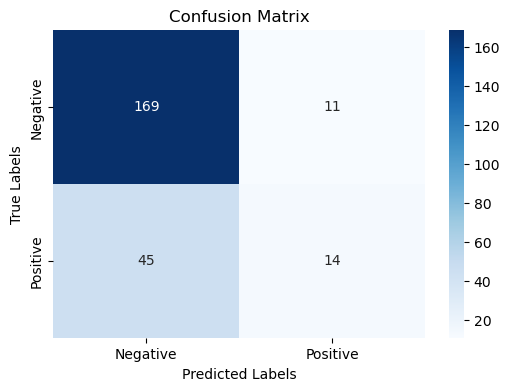

In [128]:
# 1. Set up the exact identifiers
#n_classes = len(np.unique(y_train_stage_2)) # Update LDA to use n_classes - 1 components
#fs_methods["LDA"] = LDASelector(n_components=n_classes - 1)

fs_name = "PCA"

if fs_name == "PCoA":
    fs_transformer = PCoATransformer(metric='braycurtis', n_components=180)
elif fs_name == "NCA":
    fs_transformer = NCASelector(n_components=45)
elif fs_name == "LDA":
    n_classes = len(np.unique(y_train_stage_2))
    fs_transformer = LDASelector(n_components=n_classes - 1)
else:
    fs_transformer = fs_methods[fs_name]  # Default from dict

clf_name = "RF"
clf, param_grid = models[clf_name]

# 2. Re-run the pipeline (or refit just this combo)
pipeline = Pipeline([
    ('log2', Log2Transformer()),
    ('scaler', StandardScaler()),
    ('fs', fs_transformer),
    ('clf', clf)
])

# Fit the GridSearchCV on DEG-filtered gene set
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
    verbose=0
)
grid.fit(X_train_stage_2[top_genes_stage_2], y_train_stage_2)

# Get best model and predictions
early_late_model = grid.best_estimator_
y_pred_stage_2 = early_late_model.predict(X_test_stage_2[top_genes_stage_2])

# 3. Print classification report
print("Classification Report:")
print(classification_report(y_test_stage_2, y_pred_stage_2))

# 4. Create a heatmap for the confusion matrix
cm = confusion_matrix(y_test_stage_2, y_pred_stage_2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Sample Prediction

In [129]:
# 1. Select a single sample (e.g., the 5th row)
sample_stage_2_df = X_test_stage_2.iloc[[4]][top_genes_stage_2]

# 2. Get the true label and decode it
sample_label_stage_2 = y_test_stage_2[4]
true_label_stage_2 = le_stage_2.inverse_transform([sample_label_stage_2])[0]

# 3. Predict using the trained model
predicted_class_stage_2 = early_late_model.predict(sample_stage_2_df)[0]
predicted_prob_stage_2 = early_late_model.predict_proba(sample_stage_2_df)[0]
decoded_pred_stage_2 = le_stage_2.inverse_transform([predicted_class_stage_2])[0]
confidence_stage_2 = np.max(predicted_prob_stage_2)

# 4. Display results
print("True label:", true_label_stage_2)
print("Predicted label:", decoded_pred_stage_2)
print(f"Confidence: {confidence_stage_2:.2%}")

True label: Early
Predicted label: Early
Confidence: 62.51%


### Top Predictive Features<a id='top-predictive-features-1'></a>

For the PCA-based classification model, feature importance was estimated by combining each gene’s loading across principal components with the corresponding feature importance scores from the Random Forest classifier. This approach allowed us to approximate which genes contributed most to the classification of Early vs. Late-stage cancer, even though PCA itself is an unsupervised technique. The top-ranked genes based on this combined importance metric are reported below.

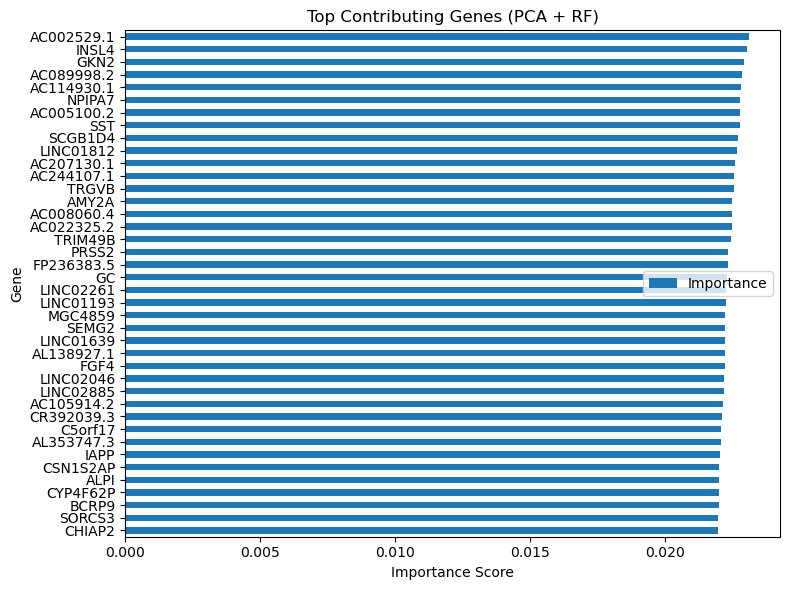

Top genes for PCA Component 1:
['AC002529.1', 'INSL4', 'GKN2', 'AC089998.2', 'AC114930.1', 'NPIPA7', 'AC005100.2', 'SST', 'SCGB1D4', 'LINC01812', 'AC207130.1', 'AC244107.1', 'TRGVB', 'AMY2A', 'AC008060.4', 'AC022325.2', 'TRIM49B', 'PRSS2', 'FP236383.5', 'GC', 'LINC02261', 'LINC01193', 'MGC4859', 'SEMG2', 'LINC01639', 'AL138927.1', 'FGF4', 'LINC02046', 'LINC02885', 'AC105914.2', 'CR392039.3', 'C5orf17', 'AL353747.3', 'IAPP', 'CSN1S2AP', 'ALPI', 'CYP4F62P', 'BCRP9', 'SORCS3', 'CHIAP2']


In [130]:
# Step 1: Extract PCA components (genes × PCs)
pca_model = early_late_model.named_steps['fs']
pca_components = pd.DataFrame(
    pca_model.components_.T,
    index=X_train_stage_2[top_genes_stage_2].columns,
    columns=[f"PC{i+1}" for i in range(pca_model.n_components_)]
)

# Step 2: Get Random Forest feature importances (per PC)
rf_model = early_late_model.named_steps['clf']
pc_importance = pd.Series(
    rf_model.feature_importances_,
    index=pca_components.columns,
    name="PC Importance"
)

# Step 3: Compute overall gene importance
gene_importance = pca_components.multiply(pc_importance, axis=1).abs().sum(axis=1)
top_genes_df = gene_importance.sort_values(ascending=False).head(40).reset_index()
top_genes_df.columns = ["Gene", "Importance"]

# Step 4: Plot or export
top_genes_df.set_index("Gene").plot(kind="barh", title="Top Contributing Genes (PCA + RF)", figsize=(8, 6))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Print gene names
print("Top genes for PCA Component 1:")
print(top_genes_df["Gene"].tolist())

# Export
top_genes_df.to_csv("top_genes_pca_early_late.csv", index=False)

## Stage I vs. Stage II vs. Stage III vs. Stage IV Classification<a id='stage-i-vs-stage-ii-vs-stage-iii-vs-stage-iv-classification'></a>

### Model Benchmarking and Performance Comparison<a id='model-benchmarking-and-performance-comparison-2'></a>

The classification pipeline was evaluated across two types of input datasets — the full gene set and a DEG-filtered subset — using 4 dimensionality reduction techniques and 3 classifiers. Each model was assessed using four performance metrics: Accuracy, Precision, Recall, and F1-score. The top-performing scores for each metric are highlighted in red for easy comparison.

In [135]:
# --- Step 1: Prepare data for Cancer_stage ---
X_stage = assay_df_final.T
y_stage = metadata_df["Cancer_stage"]

# --- Step 2: Encode labels ---
le_stage = LabelEncoder()
y_stage_encoded = le_stage.fit_transform(y_stage)

# --- Step 3: Train-test split ---
X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(
    X_stage, y_stage_encoded, stratify=y_stage_encoded, test_size=0.2, random_state=42
)

# --- Step 4: DEG subset for Cancer_stage ---
top_genes_stage = res_df_stage_2[res_df_stage_2['padj'] < 0.10].index

# --- Step 5: Update LDA to use n_classes - 1 components ---
n_classes = len(np.unique(y_train_stage))
fs_methods["LDA"] = LDASelector(n_components=n_classes - 1)

In [ ]:
# To benchmark all FS + classifier combos (with dynamic component setting)
all_results_stage = []

for fs_name in fs_methods.keys():
    # Dynamically assign feature selector
    if fs_name == "PCoA":
        fs_transformer = PCoATransformer(metric='braycurtis', n_components=70)
    elif fs_name == "NCA":
        fs_transformer = NCASelector(n_components=30)
    elif fs_name == "LDA":
        n_classes = len(np.unique(y_train_stage))
        fs_transformer = LDASelector(n_components=n_classes - 1)
    else:
        fs_transformer = fs_methods[fs_name]

    for clf_name, (clf, param_grid) in models.items():
        result = run_fs_clf_pipeline(
            X_train_stage, X_test_stage,
            y_train_stage, y_test_stage,
            fs_name, fs_transformer,
            clf_name, clf,
            param_grid,
            top_genes=top_genes_stage
        )
        all_results_stage.extend([
            {"Model": model_name, **metrics} for model_name, metrics in result.items()
        ])

In [ ]:
# 1. Create DataFrame
df_all_results_stage = pd.DataFrame(all_results_stage).set_index("Model")

# 2. Move Confusion Matrix to the end
df_all_results_stage = df_all_results_stage[[col for col in df_all_results_stage.columns if col != "Confusion Matrix"] + ["Confusion Matrix"]]

# 3. Style and display
styled_stage = df_all_results_stage.style.apply(highlight_max_red, subset=highlight_cols_max)

# Only apply green highlight if "CE (Loss)" exists
if "CE (Loss)" in df_all_results_stage.columns:
    styled_stage = styled_stage.apply(highlight_min_green, subset=["CE (Loss)"])

styled_stage

### Best Performing Model<a id='best-performing-model-2'></a>

Similar to the Early vs Late Classification, the **LDA + XGB model on the DEG-filtered gene set** is the top-performing model for Stage I–IV classification, with the highest F1-score (0.3846) and strongest balance across precision and recall. Despite the inherent difficulty of distinguishing intermediate stages and class imbalance, this model correctly identifies Stage II and III samples with reasonable confidence and shows generalization across all four stages. Its performance, combined with its use of biologically relevant DEGs and a nonlinear learner (XGB), makes it a strong choice for multi-class cancer staging.

Based on the confusion matrix:
- Stage I is often misclassified as Stage II (23 cases) — expected due to biological proximity.
- Stage II and III are better detected (especially II with 93 correct).
- Stage IV suffers due to low sample count — but still picks up all four classes.

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.27      0.25        41
           1       0.64      0.67      0.65       139
           2       0.33      0.27      0.30        55
           3       0.50      0.25      0.33         4

    accuracy                           0.50       239
   macro avg       0.43      0.37      0.38       239
weighted avg       0.50      0.50      0.50       239



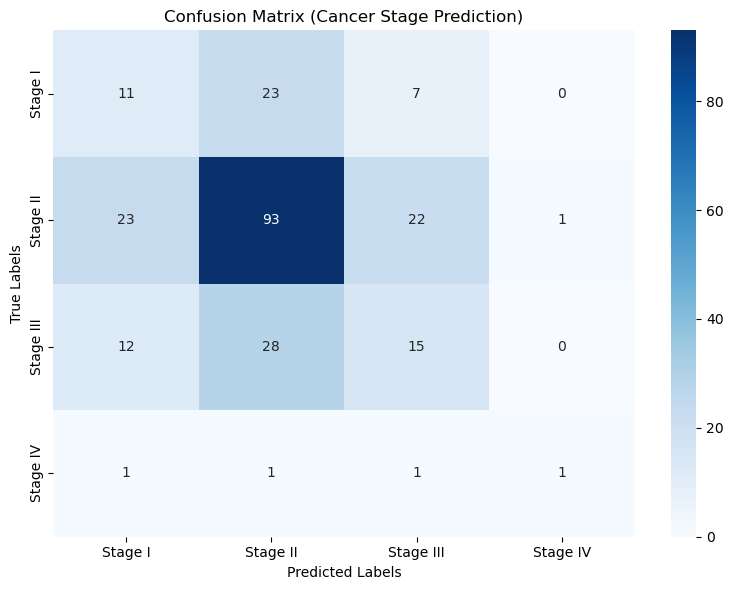

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Set up the exact identifiers
# n_classes = len(np.unique(y_train_stage)) # Update LDA to use n_classes - 1 components
# fs_methods["LDA"] = LDASelector(n_components=n_classes - 1)

fs_name = "LDA"
#fs_transformer = fs_methods[fs_name]

if fs_name == "PCoA":
    fs_transformer = PCoATransformer(metric='braycurtis', n_components=70)
elif fs_name == "NCA":
    fs_transformer = NCASelector(n_components=30)
elif fs_name == "LDA":
    n_classes = len(np.unique(y_train_stage))
    fs_transformer = LDASelector(n_components=n_classes - 1)
else:
    fs_transformer = fs_methods[fs_name]

clf_name = "XGB"
clf, param_grid = models[clf_name]

# 2. Re-run the pipeline (or refit just this combo)
pipeline = Pipeline([
    ('log2', Log2Transformer()),
    ('scaler', StandardScaler()),
    ('fs', fs_transformer),
    ('clf', clf)
])

# Fit the GridSearchCV on DEG-filtered gene set
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
    verbose=0
)
grid.fit(X_train_stage[top_genes_stage], y_train_stage)

# Get best model and predictions
cancer_stages_model = grid.best_estimator_
y_pred_stage = cancer_stages_model.predict(X_test_stage[top_genes_stage])

# 3. Print classification report
print("Classification Report:")
print(classification_report(y_test_stage, y_pred_stage))

# 4. Compute confusion matrix
cm = confusion_matrix(y_test_stage, y_pred_stage)

# Define your label names
stage_labels = ["Stage I", "Stage II", "Stage III", "Stage IV"]

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=stage_labels,
            yticklabels=stage_labels)
plt.title("Confusion Matrix (Cancer Stage Prediction)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

### Sample Prediction

In [ ]:
# 1. Choose a test sample (e.g., the 21st row)
sample_stage_df = X_test_stage.iloc[[20]][top_genes_stage]

# 2. Get the true label (encoded) and decode it
sample_label_stage = y_test_stage[20]
true_label_stage = le_stage.inverse_transform([sample_label_stage])[0]

# 3. Predict using your trained pipeline
predicted_class_stage = cancer_stages_model.predict(sample_stage_df)[0]
predicted_prob_stage = cancer_stages_model.predict_proba(sample_stage_df)[0]
decoded_pred_stage = le_stage.inverse_transform([predicted_class_stage])[0]
confidence_stage = np.max(predicted_prob_stage)

# 4. Display results
print("True label:", true_label_stage)
print("Predicted label:", decoded_pred_stage)
print(f"Confidence: {confidence_stage:.2%}")

True label: Stage II
Predicted label: Stage II
Confidence: 97.32%


### Top Predictive Features (LDA Analysis)<a id='top-predictive-features-2'></a>

**Loadings Summary:** Genes Predictive of Breast Cancer Progression

- **LD1** captures the most separation across all classes.
- **LD2** captures the second-most orthogonal separation.
- **LD3** captures what's left that still helps distinguish classes.

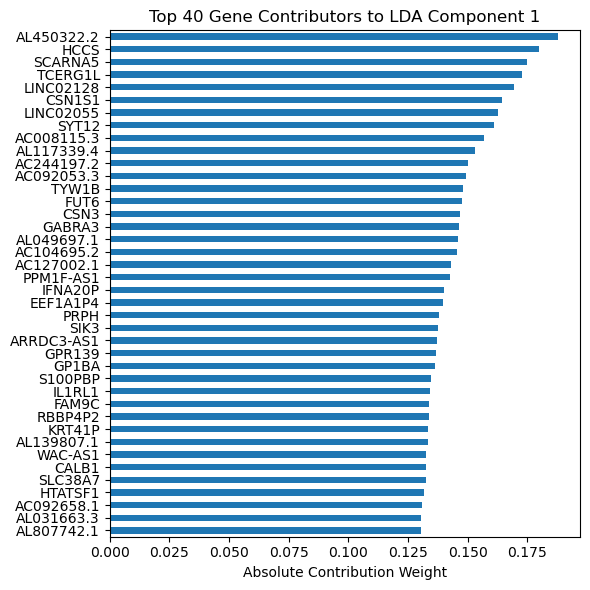

Top 40 genes for LDA Component 1
['AL450322.2', 'HCCS', 'SCARNA5', 'TCERG1L', 'LINC02128', 'CSN1S1', 'LINC02055', 'SYT12', 'AC008115.3', 'AL117339.4', 'AC244197.2', 'AC092053.3', 'TYW1B', 'FUT6', 'CSN3', 'GABRA3', 'AL049697.1', 'AC104695.2', 'AC127002.1', 'PPM1F-AS1', 'IFNA20P', 'EEF1A1P4', 'PRPH', 'SIK3', 'ARRDC3-AS1', 'GPR139', 'GP1BA', 'S100PBP', 'IL1RL1', 'FAM9C', 'RBBP4P2', 'KRT41P', 'AL139807.1', 'WAC-AS1', 'CALB1', 'SLC38A7', 'HTATSF1', 'AC092658.1', 'AL031663.3', 'AL807742.1']


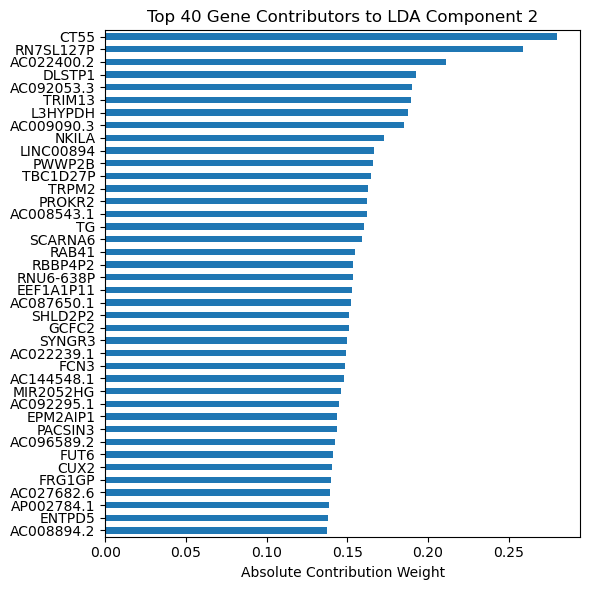

Top 40 genes for LDA Component 2
['CT55', 'RN7SL127P', 'AC022400.2', 'DLSTP1', 'AC092053.3', 'TRIM13', 'L3HYPDH', 'AC009090.3', 'NKILA', 'LINC00894', 'PWWP2B', 'TBC1D27P', 'TRPM2', 'PROKR2', 'AC008543.1', 'TG', 'SCARNA6', 'RAB41', 'RBBP4P2', 'RNU6-638P', 'EEF1A1P11', 'AC087650.1', 'SHLD2P2', 'GCFC2', 'SYNGR3', 'AC022239.1', 'FCN3', 'AC144548.1', 'MIR2052HG', 'AC092295.1', 'EPM2AIP1', 'PACSIN3', 'AC096589.2', 'FUT6', 'CUX2', 'FRG1GP', 'AC027682.6', 'AP002784.1', 'ENTPD5', 'AC008894.2']


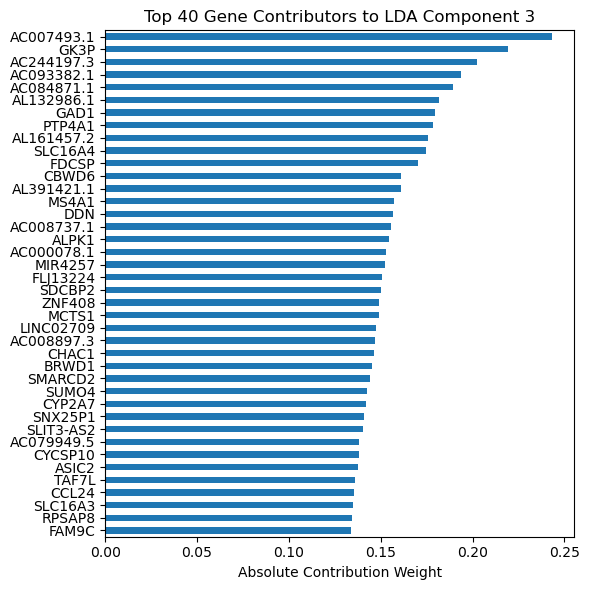

Top 40 genes for LDA Component 3
['AC007493.1', 'GK3P', 'AC244197.3', 'AC093382.1', 'AC084871.1', 'AL132986.1', 'GAD1', 'PTP4A1', 'AL161457.2', 'SLC16A4', 'FDCSP', 'CBWD6', 'AL391421.1', 'MS4A1', 'DDN', 'AC008737.1', 'ALPK1', 'AC000078.1', 'MIR4257', 'FLJ13224', 'SDCBP2', 'ZNF408', 'MCTS1', 'LINC02709', 'AC008897.3', 'CHAC1', 'BRWD1', 'SMARCD2', 'SUMO4', 'CYP2A7', 'SNX25P1', 'SLIT3-AS2', 'AC079949.5', 'CYCSP10', 'ASIC2', 'TAF7L', 'CCL24', 'SLC16A3', 'RPSAP8', 'FAM9C']


In [ ]:
lda_model = cancer_stages_model.named_steps['fs'].model
scalings = lda_model.scalings_  # shape: (n_genes, 3)

# Make sure gene names match the original training set
gene_names = top_genes_stage  # this should match the input order of your training data

# Loop over each component
for i in range(scalings.shape[1]):  # 3 components = 3 plots
    gene_contributions = pd.Series(scalings[:, i], index=gene_names)
    top_genes_lda = gene_contributions.abs().sort_values(ascending=False).head(40)

    # Plot
    plt.figure(figsize=(6, 6))
    top_genes_lda.plot(kind='barh', title=f"Top 40 Gene Contributors to LDA Component {i+1}")
    plt.xlabel("Absolute Contribution Weight")
    #plt.axvline(x=0.2, color='red', linestyle='--', label='Strong contribution')
    plt.gca().invert_yaxis()
    #plt.legend()
    plt.tight_layout()
    plt.show()

    # Print gene names
    print("Top 40 genes for LDA Component", i+1)
    print(top_genes_lda.index.tolist())

## Survival Analysis Using Random Survival Forest<a id='survival-analysis-using-random-survival-forest'></a>

### Data Preparation for Survival<a id='data-preparation-for-survival'></a>



To prepare for survival analysis, we used the vital_status and overall_survival columns from the survival_df (in Section 3.4). 

The overall_survival time was calculated using the number of days between a patient's initial diagnosis and either their date of death (for patients who were 'Dead') or the last follow-up date (for patients who were still 'Alive'). This represents the total observed survival duration for each patient, and is a standard approach in survival analysis when handling censored data. 

These survival labels were then aligned with the gene expression dataset (assay_df_final) by taking the intersection of sample identifiers. To reduce memory usage, only the top differentially expressed genes (DEGs) identified from our DESeq2 analysis were used in the modeling process.

In [ ]:
from sksurv.util import Surv
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sksurv.functions import StepFunction

In [ ]:
# 1. Set index of survival_df to sample IDs
survival_df = survival_df.set_index("samples_submitter_id")

# 2. Select only required survival columns
survival_cols = survival_df[["vital_status", "overall_survival"]]

# 3. Merge into metadata_df
metadata_df = metadata_df.join(survival_cols, how="inner")
metadata_df.head(5)

Sample       Stage Stage_group Cancer_stage vital_status  \
samples_submitter_id                                                            
TCGA-A2-A25D-01A      Tumor  Stage IIIC        Late    Stage III        Alive   
TCGA-BH-A201-01A      Tumor    Stage IA       Early      Stage I        Alive   
TCGA-AC-A23C-01A      Tumor   Stage IIB       Early     Stage II        Alive   
TCGA-AR-A5QP-01A      Tumor   Stage IIB       Early     Stage II        Alive   
TCGA-C8-A12P-01A      Tumor   Stage IIB       Early     Stage II        Alive   

                      overall_survival  
samples_submitter_id                    
TCGA-A2-A25D-01A                   0.0  
TCGA-BH-A201-01A                 856.0  
TCGA-AC-A23C-01A                 585.0  
TCGA-AR-A5QP-01A                1185.0  
TCGA-C8-A12P-01A                 358.0

### Model Benchmarking<a id='model-benchmarking'></a>



To model survival outcomes, we implemented a **Random Survival Forest (RSF)** — a non-parametric ensemble method designed to handle right-censored survival data and capture complex relationships between features and survival time. RSF predicts the probability of survival over time by constructing multiple decision trees and aggregating their outputs. 

We then tuned its hyperparameters using **GridSearchCV**, evaluating performance with the **Concordance Index (C-index)**, which measures how well the predicted risk scores rank patients' survival times. A C-index of **0.571** was achieved on the test set, indicating modest discriminative ability above random chance (where 0.5 would represent a non-informative model).

In [ ]:
# --- Step 0: Preprocessing Function ---
def prepare_survival_data(assay_df_final, metadata_df, top_genes=None, use_top_genes=False):
    # Align sample IDs first
    common_ids = assay_df_final.columns.intersection(metadata_df.index)
    assay_df = assay_df_final[common_ids]
    metadata_df = metadata_df.loc[common_ids]

    # Drop missing or invalid survival values
    metadata_df = metadata_df.dropna(subset=["vital_status", "overall_survival"])
    metadata_df = metadata_df[metadata_df["overall_survival"] >= 0]

    # Re-align assay data again after filtering metadata
    assay_df = assay_df[metadata_df.index]

    # Transpose (samples × genes)
    X_full = assay_df.T

    # Subset genes if specified
    if use_top_genes and top_genes is not None:
        X_surv = X_full[top_genes]
    else:
        X_surv = X_full

    # Align again to guarantee match
    final_ids = X_surv.index.intersection(metadata_df.index)
    X_surv = X_surv.loc[final_ids]
    metadata_df = metadata_df.loc[final_ids]

    # Build survival labels
    y_surv = Surv.from_arrays(
        event=metadata_df["vital_status"] == "Dead",
        time=metadata_df["overall_survival"]
    )

    return X_surv, y_surv, metadata_df

# --- Step 2: Pipeline Execution ---
def run_rsf_pipeline(X_raw_train, y_train, top_genes=None, use_top_genes=False):
    # Optionally subset to top genes
    if use_top_genes and top_genes is not None:
        X_raw_train = X_raw_train[top_genes]

    # Define pipeline with log2 transform
    pipeline = Pipeline([
        ('log2', Log2Transformer()),
        ('rsf', RandomSurvivalForest(n_jobs=-1, random_state=42))
    ])

    # Define hyperparameters
    param_grid = {
        "rsf__n_estimators": [100],
        "rsf__min_samples_split": [5, 10],
        "rsf__min_samples_leaf": [5, 10],
        "rsf__max_features": ["sqrt", "log2"],
        "rsf__max_depth": [10, 20],
    }

    # Scoring function
    def cindex_scorer(estimator, X, y):
        pred = estimator.predict(X)
        return concordance_index_censored(y['event'], y['time'], pred)[0]

    # Grid search
    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring=cindex_scorer,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_raw_train, y_train)
    best_model = grid.best_estimator_

    return best_model, grid

# --- Step 3: Visualization ---
def plot_survival_curve(rsf, X_test, y_test, sample_idx=0):
    sample = X_test.iloc[[sample_idx]]
    sample_id = X_test.index[sample_idx]

    surv_fn = rsf.predict_survival_function(sample)[0]
    median_time_days = np.interp(0.5, surv_fn.y[::-1], surv_fn.x[::-1])
    median_time_years = median_time_days / 365.25

    plt.figure(figsize=(7, 4))
    plt.step(surv_fn.x / 365.25, surv_fn.y, where="post", label="Predicted Survival")
    plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
    plt.axvline(median_time_years, color='red', linestyle='--', linewidth=1, label=f"Median: {median_time_years:.1f} years")
    plt.title(f"Predicted Survival Curve for {sample_id}")
    plt.xlabel("Time (years)")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Step 4: Display Prediction Summary ---
def summarize_survival_prediction(sample_id, surv_fn, c_index):
    c_index = round(c_index, 3)

    # Median survival = time where survival drops below 0.5
    median_time = np.interp(0.5, surv_fn.y[::-1], surv_fn.x[::-1])
    median_time_days = round(median_time)
    median_time_years = round(median_time / 365.25, 1)

    # Display the survival prediction summary
    print("Survival Prediction Summary")
    print("=" * 40)
    print(f"Sample ID: {sample_id}")
    print(f"C-index (Concordance Index): {c_index}")
    print(f"Median Predicted Survival Time: {median_time_days} days (~{median_time_years} years)")
    print()
    print("Interpretation:")
    print(f"- The C-index of {c_index} reflects the model's ability to rank patients by survival risk.")
    print("  A value closer to 1.0 indicates stronger predictive performance.")
    print(f"- A median survival time of {median_time_days} days suggests that 50% of similar patients")
    print(f"  are expected to survive longer than approximately {median_time_years} years.")
    print()
    print("Note: These results are model-based estimates. Always consult a medical professional for clinical interpretation.")


In [ ]:
# Split your data before training
X_all, y_all, metadata_aligned = prepare_survival_data(
    assay_df_final,
    metadata_df,
    top_genes=top_genes,
    use_top_genes=True
)

# Train-test split 
X_train_surv, X_test_surv, y_train_surv, y_test_surv = train_test_split(
    X_all, y_all,
    test_size=0.2,
    random_state=42,
    stratify=metadata_aligned["vital_status"]
)

In [ ]:
# Train the RSF pipeline
rsf_model, grid = run_rsf_pipeline(
    X_train_surv,
    y_train_surv,
    top_genes=top_genes,
    use_top_genes=True  # Change to True if using DEG
)

# Evaluate on the test set
risk_scores = rsf_model.predict(X_test_surv)
c_index = concordance_index_censored(y_test_surv["event"], y_test_surv["time"], risk_scores)[0]

# Output best hyperparameters and test performance
print("Best Parameters:", grid.best_params_)
print(f"C-index on test set: {c_index:.3f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'rsf__max_depth': 10, 'rsf__max_features': 'sqrt', 'rsf__min_samples_leaf': 5, 'rsf__min_samples_split': 5, 'rsf__n_estimators': 100}
C-index on test set: 0.571


### Survival Curve Prediction<a id='survival-curve-prediction'></a>

We then selected a single test sample to visualize its predicted survival curve based on the trained RSF model. The survival curve estimates the probability of the patient surviving past a given time. 

We also calculated the median survival time, defined as the point where the survival probability drops below 0.5. This provides an intuitive benchmark, suggesting that 50% of similar patients (with similar gene expression profiles) are expected to survive longer than the indicated number of years. This visualization helps in understanding not only the prediction but also its timing and clinical interpretability.

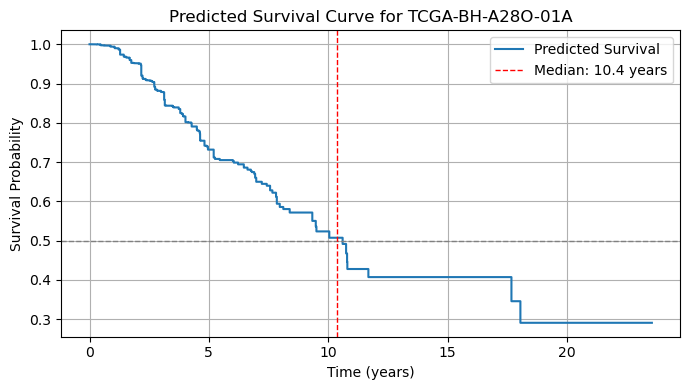

In [ ]:
# Plot survival curve for a test sample
plot_survival_curve(rsf_model, X_test_surv, y_test_surv, sample_idx=0)

In [ ]:
# Summarize prediction for same sample
sample_idx=0
sample_id = X_test_surv.index[sample_idx]
surv_fn = rsf_model.predict_survival_function(X_test_surv.iloc[[0]])[0]
summarize_survival_prediction(sample_id, surv_fn, c_index)

Survival Prediction Summary
Sample ID: TCGA-BH-A28O-01A
C-index (Concordance Index): 0.571
Median Predicted Survival Time: 3785 days (~10.4 years)

Interpretation:
- The C-index of 0.571 reflects the model's ability to rank patients by survival risk.
  A value closer to 1.0 indicates stronger predictive performance.
- A median survival time of 3785 days suggests that 50% of similar patients
  are expected to survive longer than approximately 10.4 years.

Note: These results are model-based estimates. Always consult a medical professional for clinical interpretation.


#### Sample Prediction (with known Cancer_stage) + Kaplan-Meier Plot

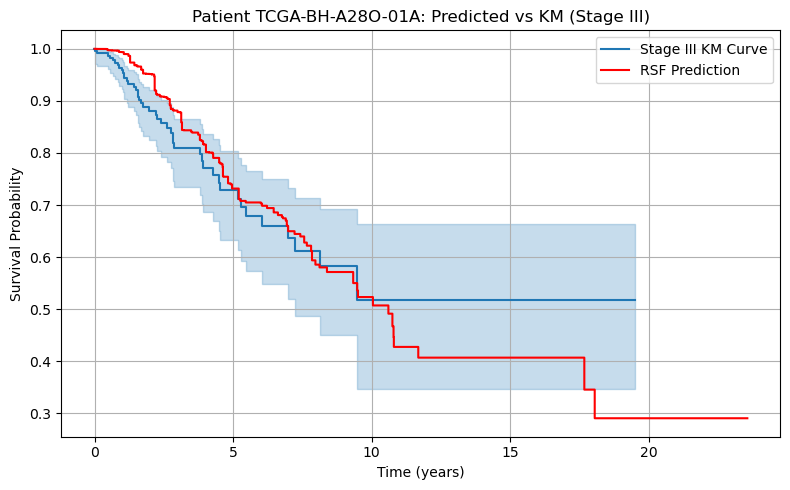

In [ ]:
from lifelines import KaplanMeierFitter

# Step 1: Pick a test sample
sample_idx = 0
sample = X_test_surv.iloc[[sample_idx]]
sample_id = X_test_surv.index[sample_idx]

# Step 2: Predict survival function for the sample
surv_fn = rsf_model.predict_survival_function(sample)[0]

# Step 3: Get that patient's Cancer_stage
sample_stage = metadata_df.loc[sample_id, "Cancer_stage"]

# Step 4: Filter all patients in the same stage with valid survival info
mask = metadata_df["Cancer_stage"] == sample_stage
subset_df = metadata_df.loc[mask].dropna(subset=["overall_survival", "vital_status"])

# Convert time from days to years
group_times_years = subset_df["overall_survival"] / 365.25
group_events = subset_df["vital_status"].map({"Dead": 1, "Alive": 0})

# Step 5: Fit Kaplan-Meier curve
kmf = KaplanMeierFitter()
kmf.fit(group_times_years, event_observed=group_events, label=f"{sample_stage} KM Curve")

# Step 6: Plot with shaded CI and x-axis in years
plt.figure(figsize=(8, 5))
kmf.plot(ci_show=True)  # shaded confidence interval
plt.step(surv_fn.x / 365.25, surv_fn.y, where="post", label="RSF Prediction", color="red")
plt.title(f"Patient {sample_id}: Predicted vs KM ({sample_stage})")
plt.xlabel("Time (years)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# CONCLUSIONS

- **Tumor vs. Normal** classification achieved the highest performance, with an overall accuracy of 99%, using the **NCA + XGBoost model on the DEG-filtered gene set (11,883 genes)**. This model will be confidently deployed in our Streamlit application.

- **Early vs. Late Stage** classification using the **LDA + XGBoost model on the DEG-filtered gene set (2,634 genes)** reached 71% accuracy, with Precision, Recall, and F1-score around 57%. While promising, this model should be used with caution, and predictions should be presented alongside confidence levels in the application.

- **Stage I vs. Stage II vs. Stage III vs. Stage IV** classification showed the weakest performance using **LDA + XGBoost on the DEG-filtered gene set (2,077 genes)**. Difficulty in separating intermediate stages suggests that further refinement is needed, potentially by incorporating clinical or histopathological data to enhance resolution. This model will not be included in the current release of the app.

- To improve model interpretability and reduce noise from the 60,000+ raw gene features, we adopted a **hybrid approach**: combining traditional dimensionality reduction methods with **DEG filtering using DESeq2 (padj < 0.10)**. This retained only the most statistically significant genes. Across all three classification tasks, **top-performing models** (as reflected by red-highlighted metrics) consistently appeared in the **DEG-filtered set**, while models trained on the full gene set produced fewer standout results—highlighting the effectiveness of this strategy in enhancing both performance and reliability.

- Across all three tasks, the **XGBoost classifier** consistently delivered the best results, and **supervised dimensionality reduction techniques** such as **NCA** and **LDA** outperformed unsupervised methods, highlighting the advantage of label-aware feature selection for gene expression data.

- **Survival Prediction:** Using **Random Survival Forests on the DEG-filtered gene set**, we achieved a **C-index of 0.571**, indicating moderate predictive performance. While not highly discriminative, the model is still informative for generating individual survival curves and estimating median survival times, which we plan to include in our Streamlit app for exploratory purposes.